In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../2410_iPAGE_SoilData_cleaned.csv')

In [4]:
df.columns

Index(['Area', 'Data Collection Year', 'soil group', 'Land class',
       'knit (surface)', 'pH', 'SOC (%)', 'Nitrogen N (%)',
       'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
       'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

In [5]:
df.head()

Area  Data Collection Year soil group   Land class knit (surface)  \
0  Mithpukur                  2005      belab  high ground     Clay loam    
1  Mithpukur                  2005      belab  high ground     Clay loam    
2  Mithpukur                  2005      belab  high ground     Clay loam    
3  Mithpukur                  2005      belab  high ground     Clay loam    
4  Mithpukur                  2005      belab  high ground     Clay loam    

    pH  SOC (%)  Nitrogen N (%)  Potassium K (meq/100)  Phosphorus P (ug/g)  \
0  5.0     1.27            0.08                   0.15                 19.6   
1  4.9     1.47            0.09                   0.25                  4.1   
2  4.6     1.07            0.05                   0.09                 13.3   
3  5.2     1.51            0.06                   0.30                 20.2   
4  5.3     1.08            0.11                   0.17                 20.5   

   Sulfur S (ug/g)  Boron B (ug/g)  Zinc Zn (ug/g)  
0             37.7            0.26            0.86  
1             32.0            0.25            0.75  
2             13.5            0.27            0.95  
3             30.0            0.28            1.00  
4             27.8            0.30            1.04

In [6]:
df.describe()

Data Collection Year          pH     SOC (%)  Nitrogen N (%)  \
count            618.000000  618.000000  618.000000      618.000000   
mean            2004.050162    5.236942    1.792214        0.111832   
std                7.103021    0.469949    1.034159        0.507259   
min             1990.000000    4.100000    0.100000        0.000000   
25%             1997.000000    4.900000    1.352500        0.070000   
50%             2005.000000    5.200000    1.700000        0.090000   
75%             2005.000000    5.400000    2.160000        0.110000   
max             2016.000000    7.800000   20.400000       12.600000   

       Potassium K (meq/100)  Phosphorus P (ug/g)  Sulfur S (ug/g)  \
count             618.000000           618.000000       618.000000   
mean                0.241246            31.144256        15.340676   
std                 0.581693            38.078580        11.062096   
min                 0.000000             0.000000         0.400000   
25%                 0.110000             8.785000         8.702500   
50%                 0.170000            16.000000        12.600000   
75%                 0.287500            37.700000        19.000000   
max                14.200000           254.700000        85.000000   

       Boron B (ug/g)  Zinc Zn (ug/g)  
count      618.000000      618.000000  
mean         0.348997        1.039191  
std          0.258153        0.976144  
min          0.000000        0.080000  
25%          0.230000        0.520000  
50%          0.300000        0.820000  
75%          0.400000        1.100000  
max          2.660000       10.580000

In [7]:
df.isnull().sum()

Area                       0
Data Collection Year       0
soil group                 0
Land class                 0
knit (surface)           157
pH                         0
SOC (%)                    0
Nitrogen N (%)             0
Potassium K (meq/100)      0
Phosphorus P (ug/g)        0
Sulfur S (ug/g)            0
Boron B (ug/g)             0
Zinc Zn (ug/g)             0
dtype: int64

In [12]:
df['knit (surface)'].fillna('Unknown', inplace=True)

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/2445733144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['knit (surface)'].fillna('Unknown', inplace=True)


In [13]:
df['knit (surface)'].value_counts()

knit (surface)
loam           358
Unknown        157
Clay loam       76
loam clay       15
brick            9
in the sand      3
Name: count, dtype: int64

In [8]:
df.shape

(618, 13)

The distribution shows that SOC(Soil Organic Carbon) is heavily concentrated below 5%, indicating that most soil samples have low organic carbon levels
The histogram indicates that almost all the values are very low (below 0.2%), suggesting low nitrogen content in the soil samples
This suggests that boron is generally present in trace amounts in the soil
Zinc concentrations are mostly below 2 ug/g, suggesting a scarcity of zinc in most of the samples

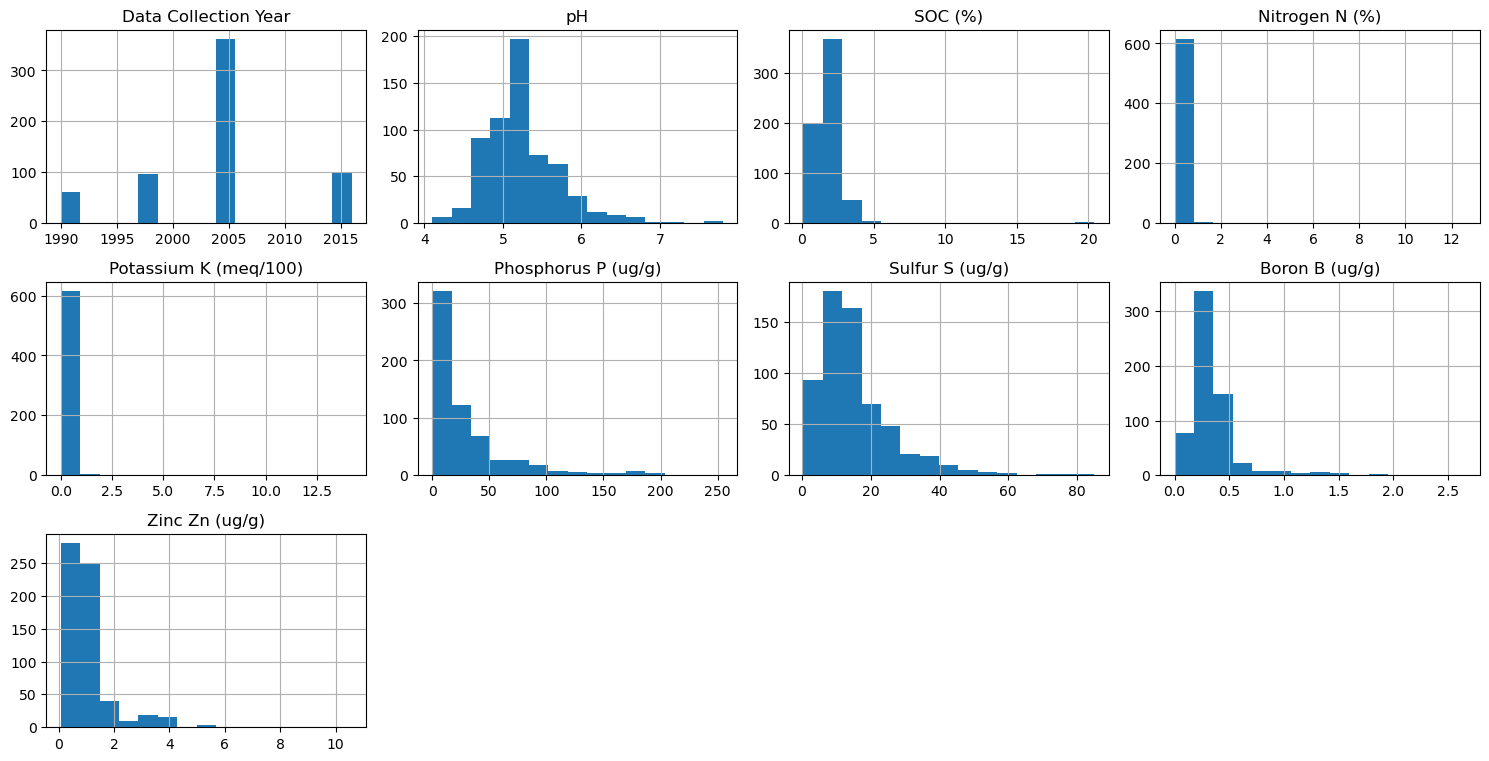

In [9]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

The median values for nutrients like Nitrogen, Potassium, and Boron are quite low, which implies that the overall soil quality, in terms of essential nutrients, is poor for the majority of the samples
The pH values suggest that the soils are slightly acidic (median around 5) and hence influences nutrient availability in the soil

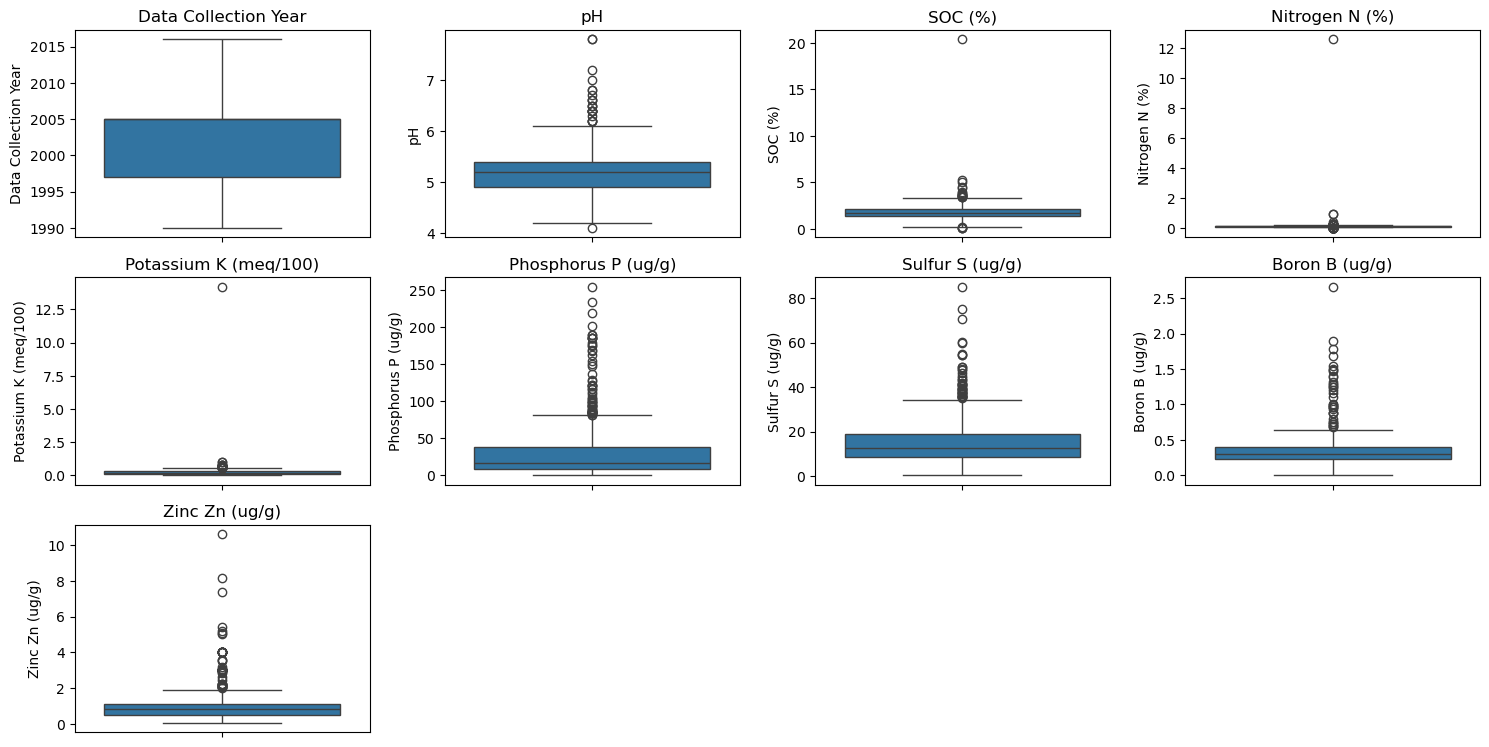

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1918163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feature], palette='viridis')


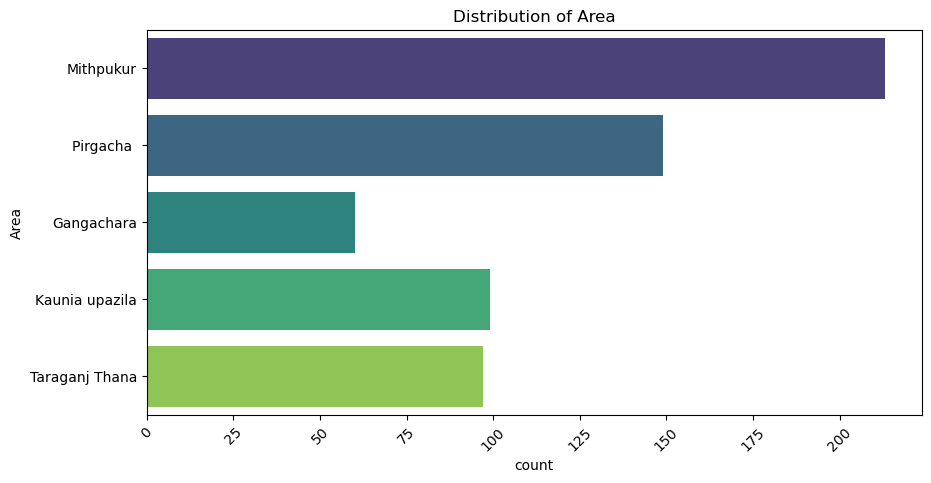

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1918163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feature], palette='viridis')


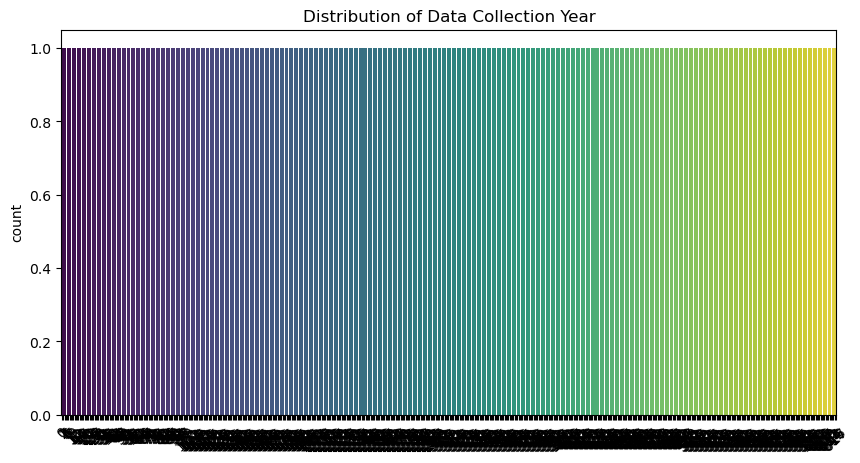

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1918163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feature], palette='viridis')


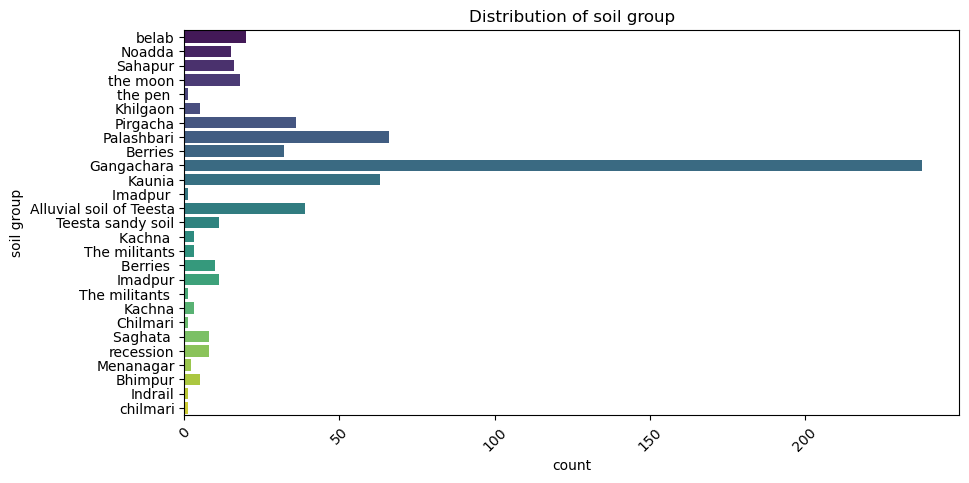

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1918163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feature], palette='viridis')


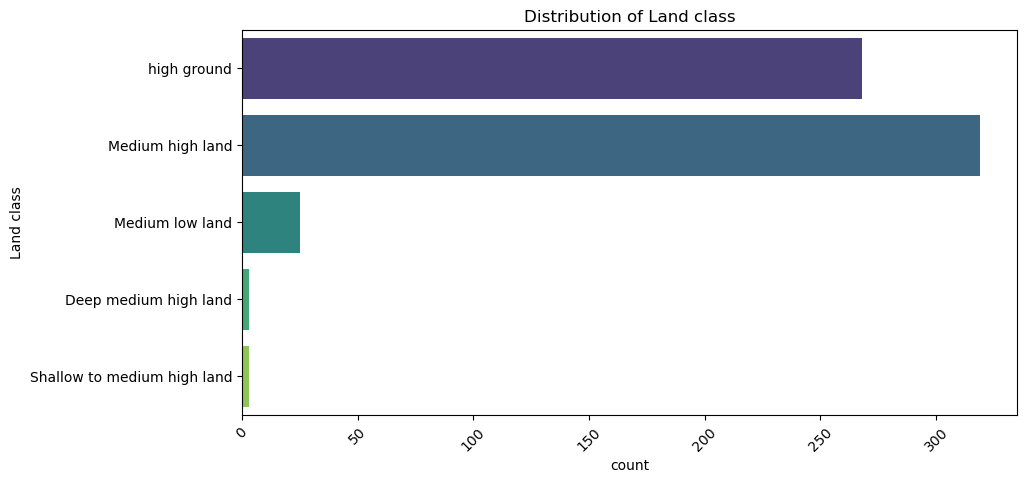

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1918163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feature], palette='viridis')


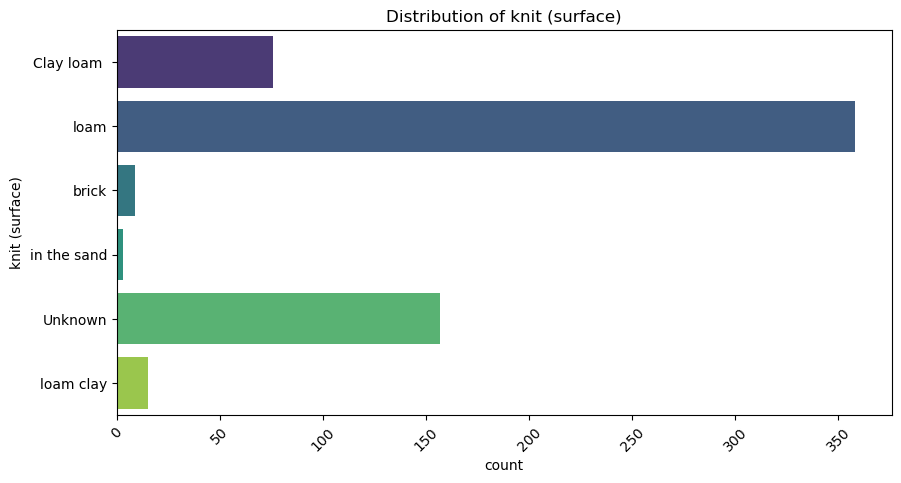

In [15]:
categorical_features = ['Area', 'Data Collection Year', 'soil group', 'Land class', 'knit (surface)']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(df[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
df[df['knit (surface)'] == 'Unknown']

Area  Data Collection Year               soil group  \
362      Gangachara                  1990                 Pirgacha   
363      Gangachara                  1990                 Pirgacha   
364      Gangachara                  1990               Palashbari   
365      Gangachara                  1990               Gangachara   
366      Gangachara                  1990                 Pirgacha   
..              ...                   ...                      ...   
613  Taraganj Thana                  1997        Teesta sandy soil   
614  Taraganj Thana                  1997        Teesta sandy soil   
615  Taraganj Thana                  1997  Alluvial soil of Teesta   
616  Taraganj Thana                  1997        Teesta sandy soil   
617  Taraganj Thana                  1997  Alluvial soil of Teesta   

           Land class knit (surface)   pH  SOC (%)  Nitrogen N (%)  \
362       high ground        Unknown  5.1     0.95          0.0016   
363       high ground        Unknown  5.1     0.70          0.0010   
364       high ground        Unknown  5.5     0.95          0.0032   
365       high ground        Unknown  5.6     1.40          0.0033   
366       high ground        Unknown  5.4     1.70          0.0032   
..                ...            ...  ...      ...             ...   
613  Medium high land        Unknown  5.6     0.48          0.0400   
614  Medium high land        Unknown  6.7     0.36          0.0500   
615  Medium high land        Unknown  5.9     0.73          0.0400   
616   Medium low land        Unknown  7.8     0.36          0.0100   
617   Medium low land        Unknown  7.8     0.24          0.0000   

     Potassium K (meq/100)  Phosphorus P (ug/g)  Sulfur S (ug/g)  \
362                   0.46                101.0             18.0   
363                   0.34                 77.0             12.0   
364                   0.51                 60.0             17.0   
365                   0.53                 15.0             20.0   
366                   0.53                 23.0             25.0   
..                     ...                  ...              ...   
613                   0.21                 31.0             12.0   
614                   0.04                  9.0              7.0   
615                   0.17                 24.0              9.0   
616                   0.09                  5.0              9.0   
617                   0.09                  6.0             11.0   

     Boron B (ug/g)  Zinc Zn (ug/g)  
362            0.50            1.00  
363            0.20            1.00  
364            0.00            4.00  
365            0.20            4.00  
366            0.20            3.00  
..              ...             ...  
613            0.20            1.04  
614            0.20            0.36  
615            0.37            0.44  
616            0.24            1.02  
617            0.36            1.16  

[157 rows x 13 columns]

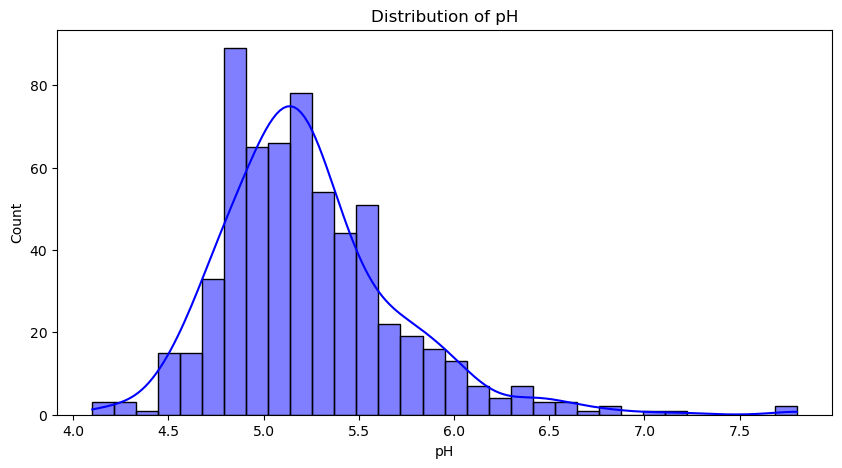

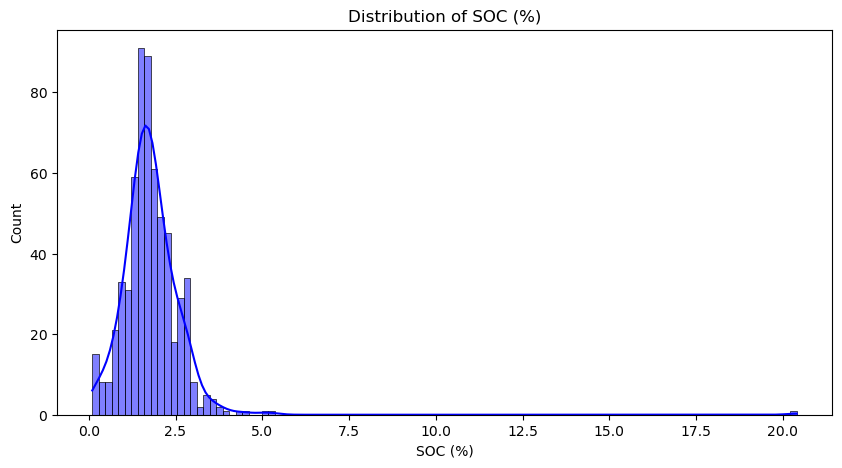

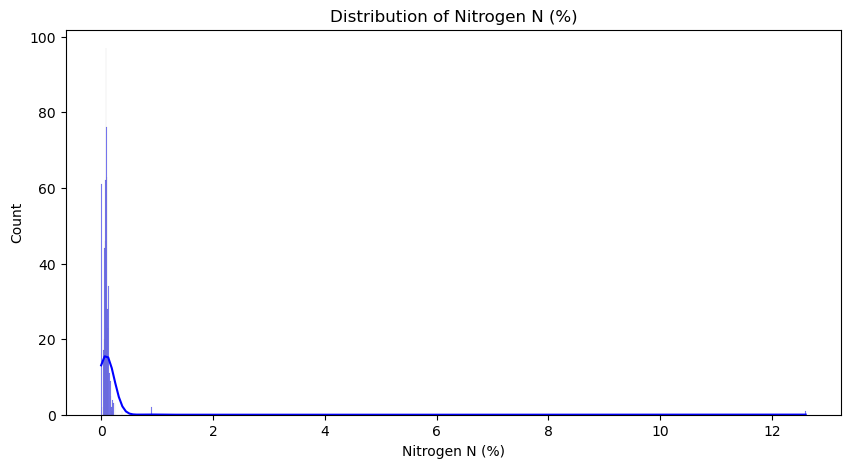

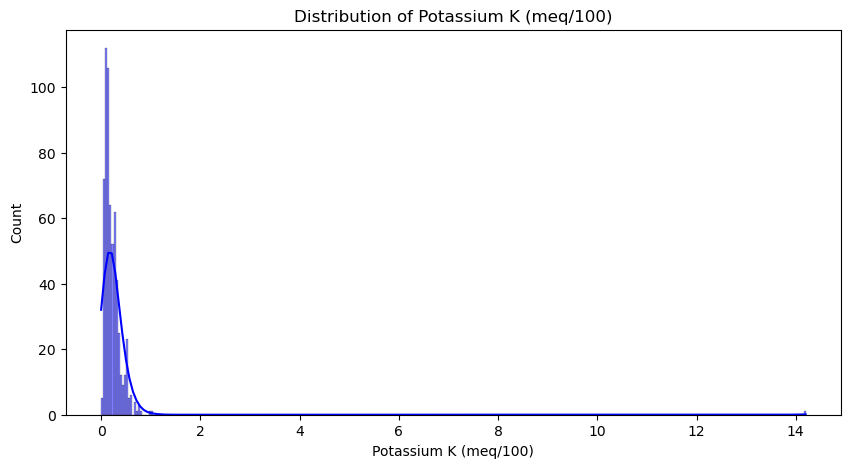

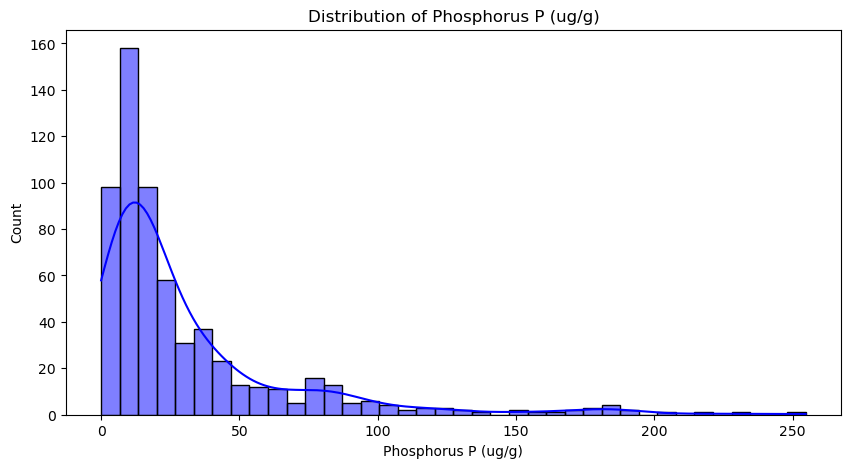

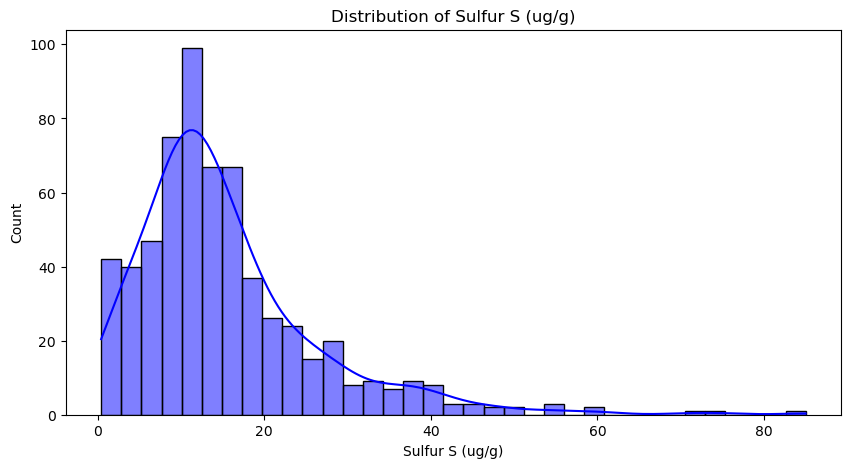

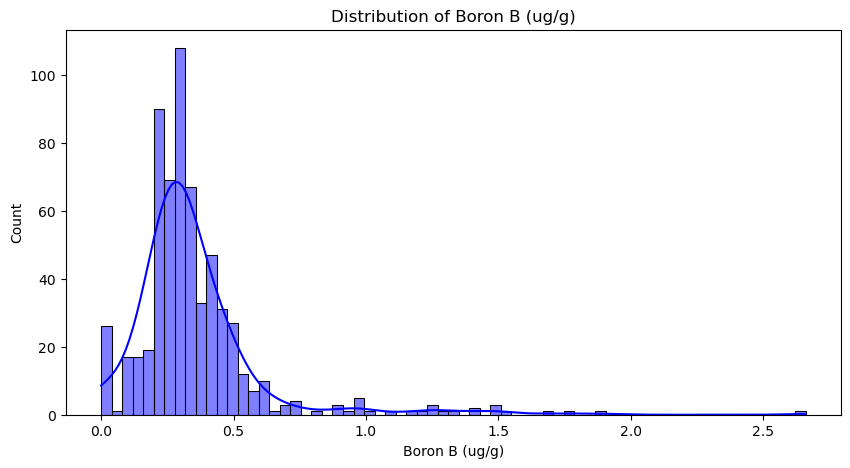

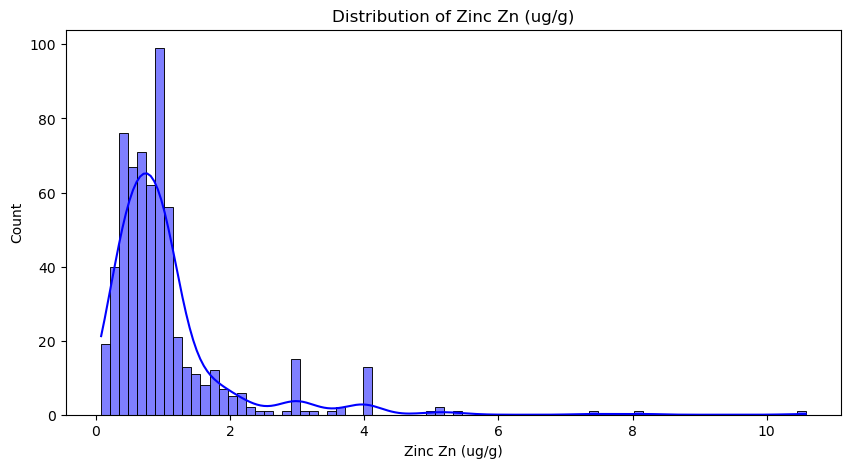

In [52]:
numerical_features = ['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

pH shows a moderate negative correlation with SOC (%) (-0.24). This means that higher pH values (basic) tend to have slightly lower soil organic carbon and pH has lower correlations with most of the other variables, which indicates that pH doesn’t have strong relationships with the other nutrients in this dataset.

From google, the above could be due to following:
1. Saline-alkaline regions have lower SOC stocks due to the negative effects of salinity and sodicity on plant health and production. 
2. Alkaline soils have higher concentrations of salt ions, which limits nutrient availability for crop growth. 
3. Alkaline soils are more prone to SOC losses than acidic soils because of reduced SOM complexation on mineral surfaces via ligand exchange.


SOC (%) (Soil Organic Carbon) has a low correlation with all other variables. The values are close to 0, indicating very little relationship between SOC and other nutrients.

Nitrogen N (%) and Potassium K (meq/100) has a very high positive correlation (0.95) which suggests that when the nitrogen content in soil increases, potassium content tends to increase as well. This might indicate that these two nutrients are related, possibly due to soil properties or fertilization practices.

Phosphorus shows some correlation with Zinc Zn (ug/g) (0.33), suggesting that higher phosphorus content is weakly associated with increased zinc levels.
Other correlations with phosphorus are weak, suggesting that phosphorus levels do not vary significantly with other nutrients.


Sulfur S (ug/g) shows low to moderate correlations with Boron B (ug/g) (0.25) and Zinc Zn (ug/g) (0.26). This means sulfur content might slightly influence these micronutrient levels, though not strongly.

Zinc Zn (ug/g) shows low positive correlations with Phosphorus P (ug/g) (0.33), Sulfur S (ug/g) (0.26), and Boron B (ug/g) (0.17), which indicates some weak relationship among these nutrients.

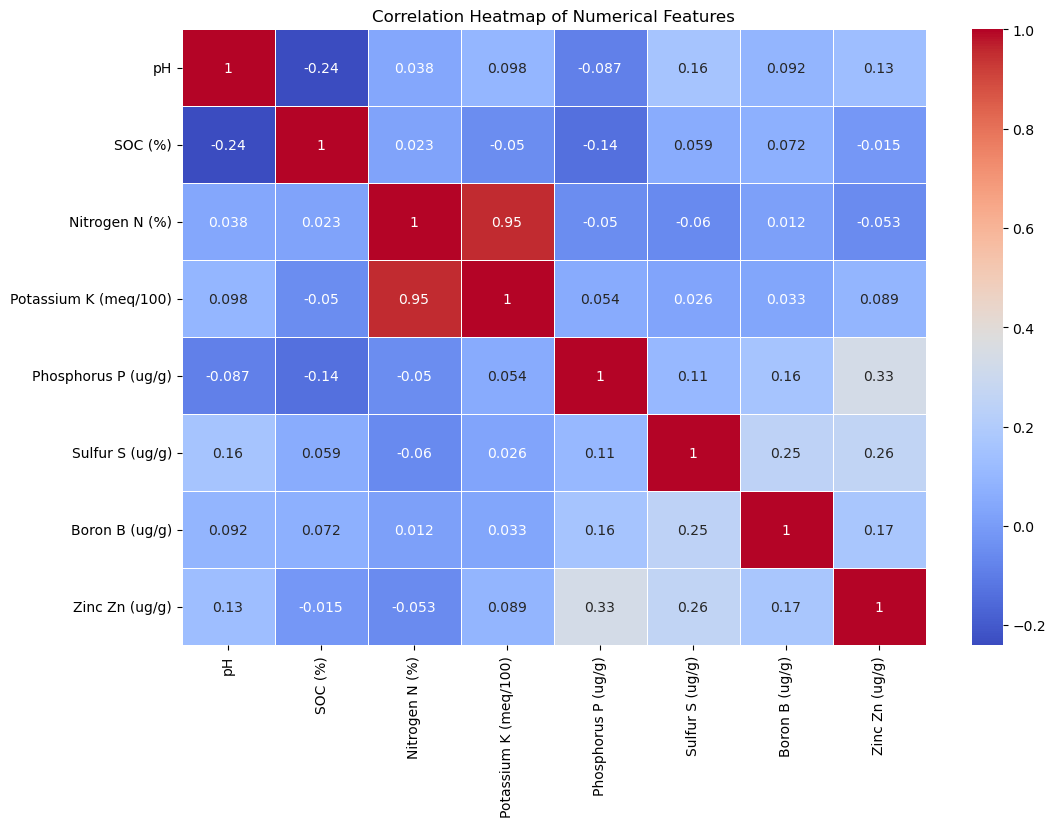

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

pH vs Soil Group
Most soil groups have pH values between 5 and 6, indicating slightly acidic to neutral soils.
The Alluvial soil of Teesta and The militants soil groups have a higher pH, suggesting they are less acidic compared to others.

SOC (%) vs Soil Group
The Alluvial soil of Teesta has a significantly high SOC (%) compared to others, indicating richer organic matter in this soil.
Most soil groups fall in the range of 1-3%, except a few outliers like Teesta sandy soil and Berries with lower values.

Nitrogen N (%) vs Soil Group
The Alluvial soil of Teesta has a significantly higher Nitrogen N (%), whereas most other soil groups have very low values.
Most soils have nitrogen content well below 0.2%, indicating that nitrogen is scarce in most of these soils.

Potassium K (meq/100) vs Soil Group
Again, Alluvial soil of Teesta shows significantly higher potassium content, with some other groups having slightly elevated levels.
For most soil groups, potassium levels remain below 0.5 meq/100.

Phosphorus P (ug/g) vs Soil Group
Pirgacha and Palashbari soil groups exhibit exceptionally high phosphorus content compared to other groups, exceeding 100 ug/g in some cases.
Most other soils have phosphorus levels below 20 ug/g.

Sulfur S (ug/g) vs Soil Group
The belab and Gangachara soil groups have higher sulfur content, exceeding 30 ug/g.
The remaining soil groups mostly have sulfur content between 10-20 ug/g.

Boron B (ug/g) vs Soil Group
The Teesta sandy soil has a peak with boron content above 1.5 ug/g.
The majority of soil groups have boron levels between 0.2-0.6 ug/g.

Zinc Zn (ug/g) vs Soil Group
Pirgacha and The militants show relatively higher zinc content, reaching above 2 ug/g.
Most soil groups have Zinc Zn (ug/g) below 1.5 ug/g.

Soil Groups like Alluvial soil of Teesta tend to have higher nutrient levels (pH, SOC, Nitrogen, Potassium) compared to other soil groups.
Certain soil groups (Pirgacha, Palashbari) exhibit elevated levels of Phosphorus and Zinc, which might be linked to specific fertilization or geological characteristics.
Most nutrients (especially Nitrogen, Potassium, and Phosphorus) are at relatively low levels in many soil groups, which could indicate poor fertility for these soil types.


pH vs Land Class
* All land classes have a pH between 5 and 6, indicating slightly acidic soil.
* The Medium low land, Deep medium high land, and Shallow to medium high land classes have relatively higher pH compared to high ground.

SOC (%) vs Land Class.
* Deep medium high land has the highest SOC (%), suggesting that it contains more organic matter.
* High ground shows the lowest SOC, indicating relatively poor organic content.

Nitrogen N (%) vs Land Class
* Medium high land and Deep medium high land have slightly higher nitrogen content compared to others.
* The high ground class has the lowest nitrogen levels, which could be a sign of lower fertility.

Potassium K (meq/100) vs Land Class
* Deep medium high land shows higher potassium values, indicating that it is relatively richer in potassium.
* The Shallow to medium high land has the lowest potassium levels.

Phosphorus P (ug/g) vs Land Class
* Deep medium high land has a significant variation, with a high phosphorus value.
* The high ground also shows a higher phosphorus value, while Medium high land and Medium low land have relatively low levels.

Sulfur S (ug/g) vs Land Class
* Medium low land has a higher sulfur content, indicating a richer sulfur supply compared to others.
* The high ground and Medium high land have lower sulfur values.

Boron B (ug/g) vs Land Class
* Shallow to medium high land has the highest boron content, while the high ground has the lowest.
* Overall, boron levels are quite similar across the land classes, but the variation shows slight differences.

Zinc Zn (ug/g) vs Land Class
* High ground has the highest zinc value, followed by Medium low land.
* Deep medium high land has the lowest zinc content among all land classes.

* Land Classes such as Deep medium high land tend to be richer in several nutrients, like SOC, Potassium, and Phosphorus, suggesting higher fertility potential.
* The high ground generally has lower nutrient levels, particularly SOC and Nitrogen, indicating poorer soil quality.
* Boron and Zinc levels show some variations across different land classes, with certain classes like Shallow to medium high land and high ground showing relatively higher values.


pH vs knit (surface)
* The error bars represent the variation (standard error) in pH values for each surface type.
* The "in the sand" category has slightly higher pH values compared to others, indicating slightly higher alkalinity.

SOC (%) vs knit (surface)
* SOC is a key indicator of soil health and fertility.
* "brick" surface has the highest SOC%, while "in the sand" has the lowest.
* The variation is indicated by the error bars.

Nitrogen N (%) vs knit (surface)
* The nitrogen level is essential for plant growth.
* "brick" and "loam" have higher nitrogen content compared to others, with "in the sand" having a relatively low value.

Potassium K (meq/100) vs knit (surface)
* The "Unknown" knit surface has the highest Potassium concentration, followed closely by "loam."

Phosphorus P (ug/g) vs knit (surface)
* The "Unknown" surface has the highest Phosphorus content, followed by "loam."

Sulfur S (ug/g) vs knit (surface)
* "brick" surface has higher sulfur content, while "loam" and "in the sand" have relatively lower values.

Boron B (ug/g) vs knit (surface)
* "loam clay" has the highest Boron value, while "Unknown" has a lower concentration.

Zinc Zn (ug/g) vs knit (surface)
* "Unknown" and "brick" surfaces have higher zinc concentrations compared to "in the sand."



/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


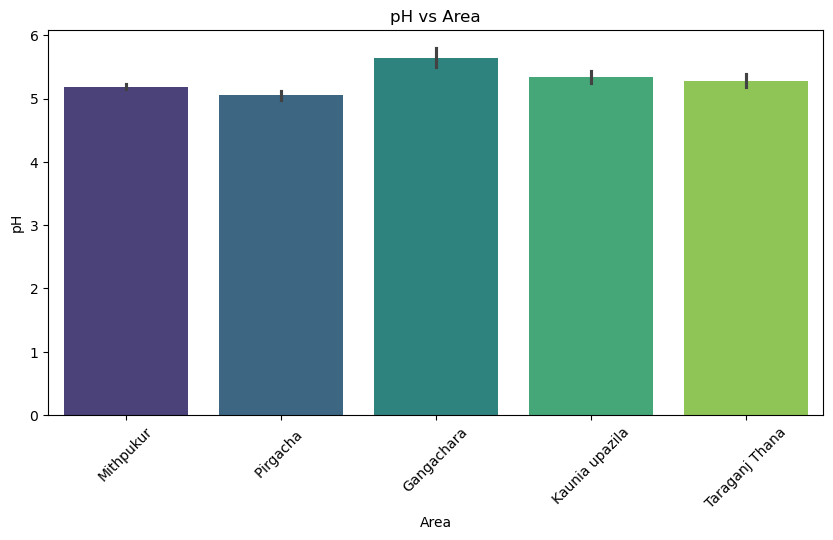

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


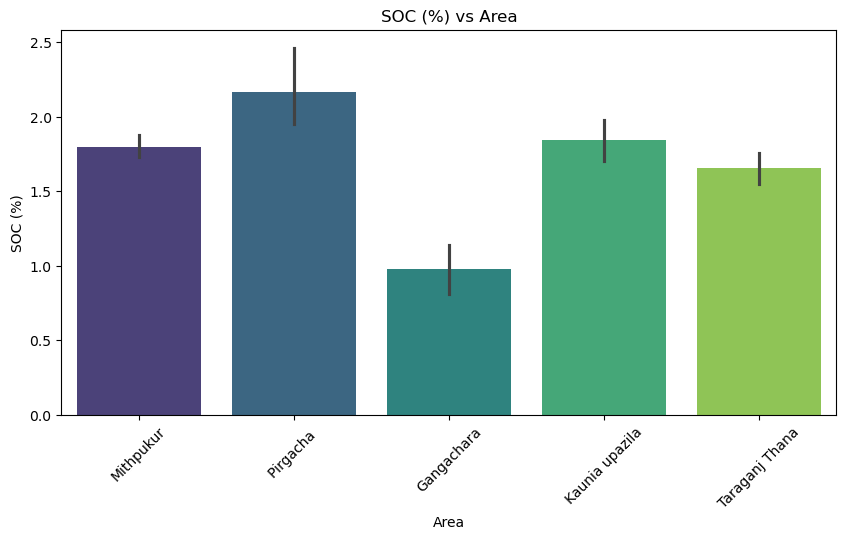

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


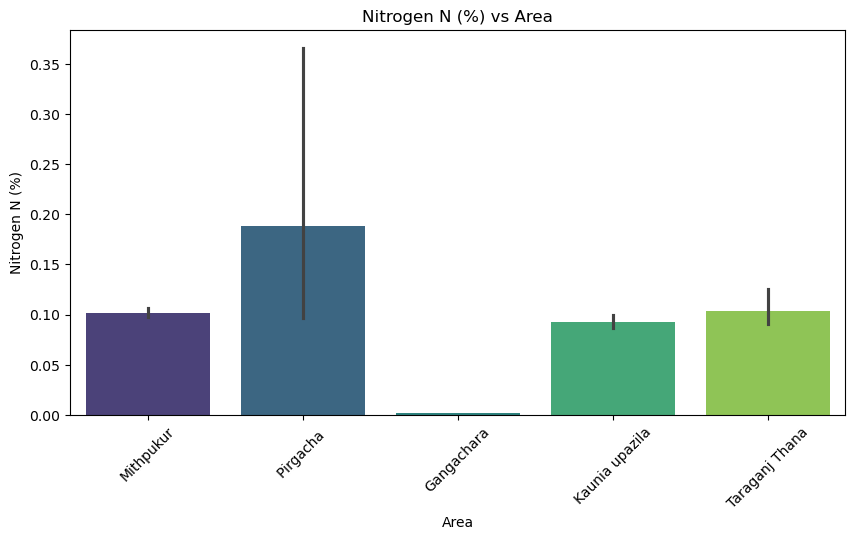

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


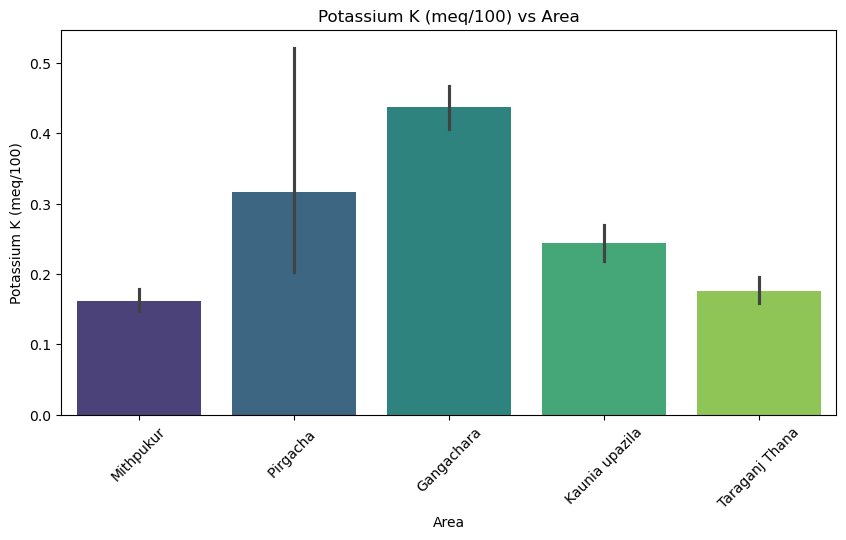

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


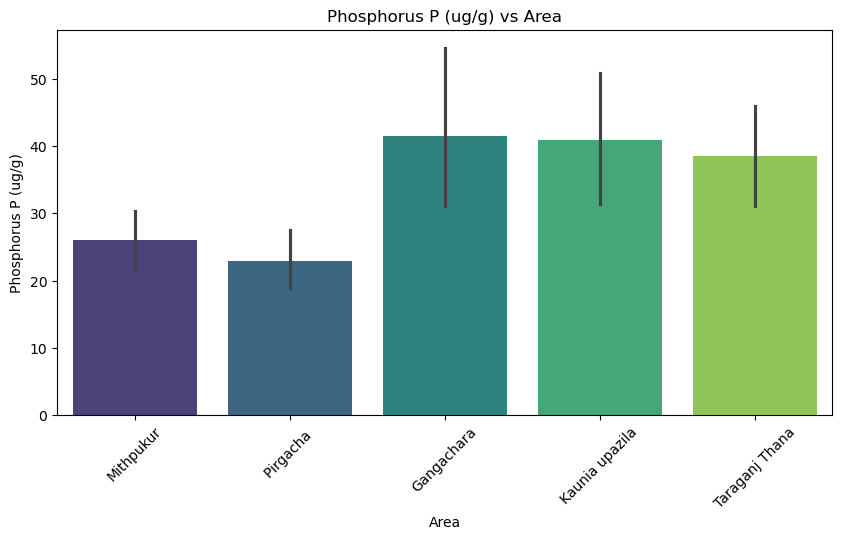

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


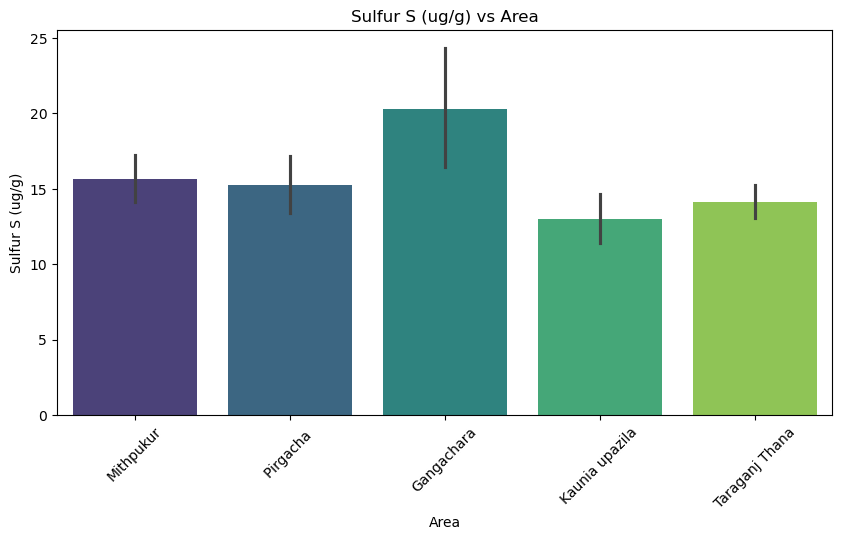

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


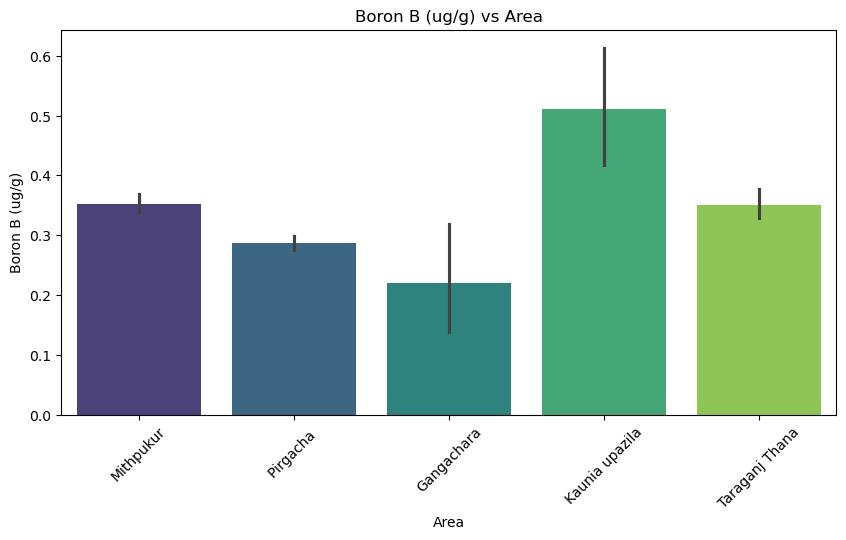

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


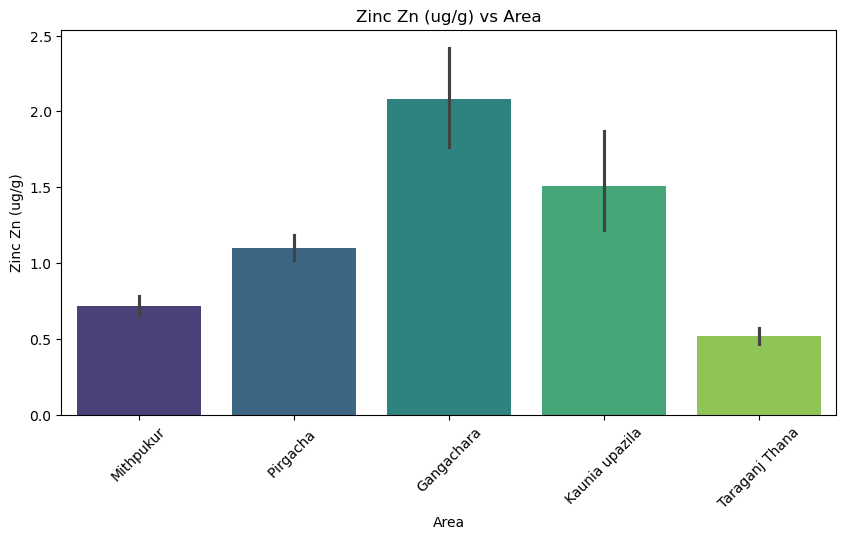

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


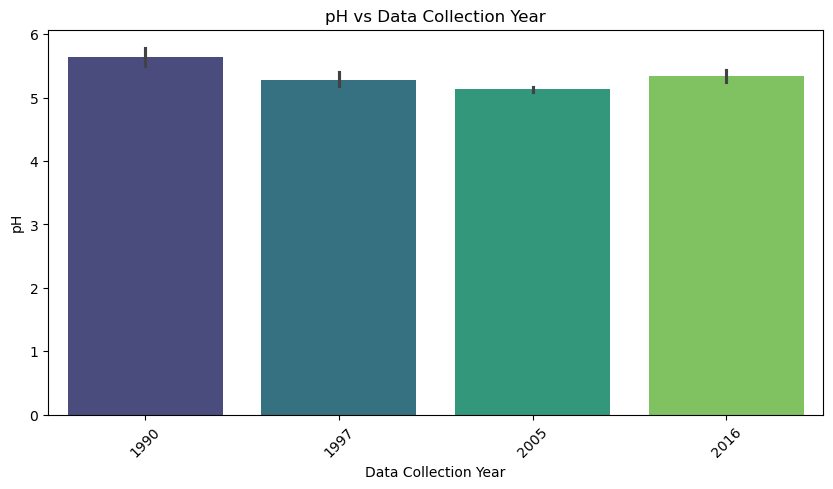

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


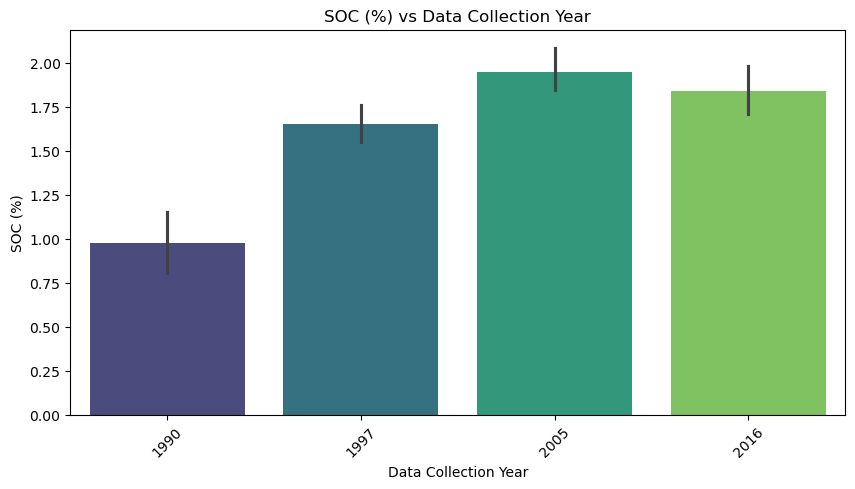

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


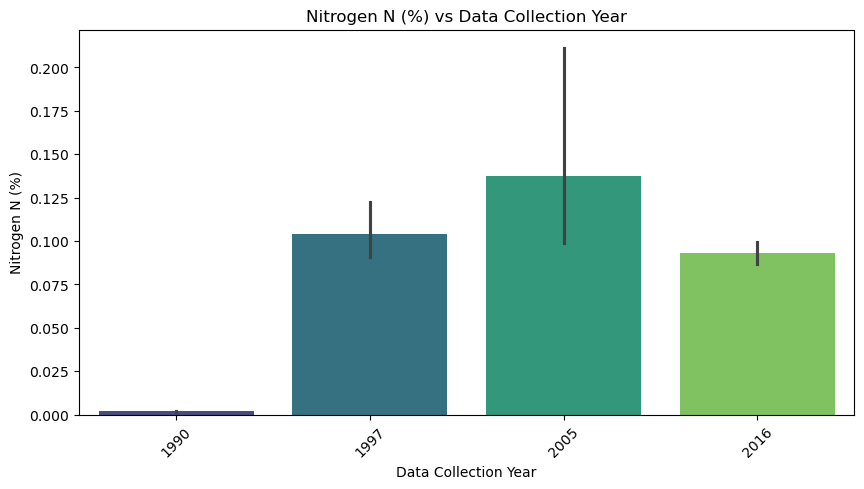

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


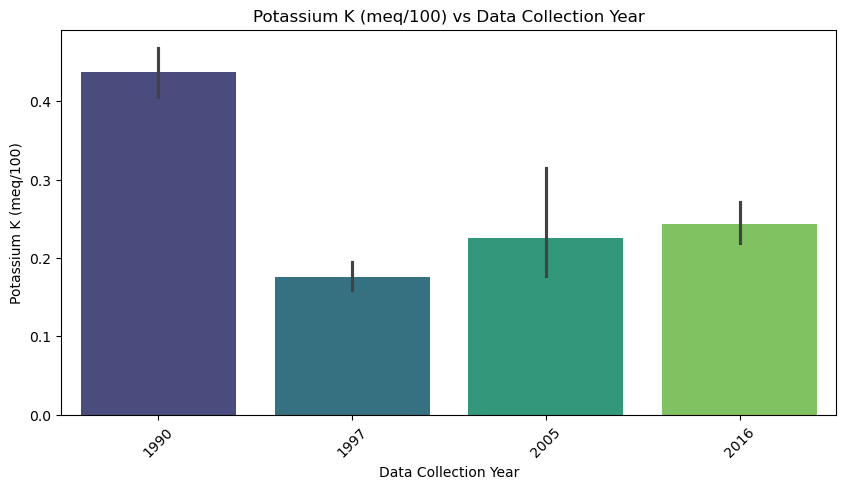

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


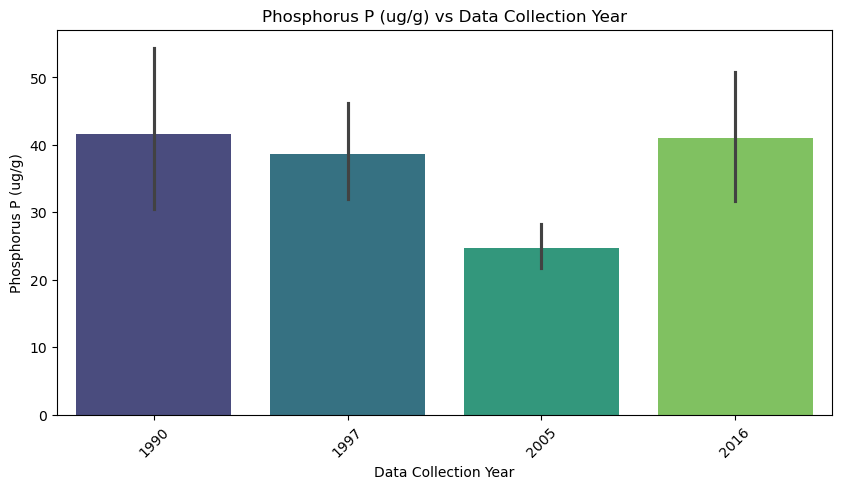

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


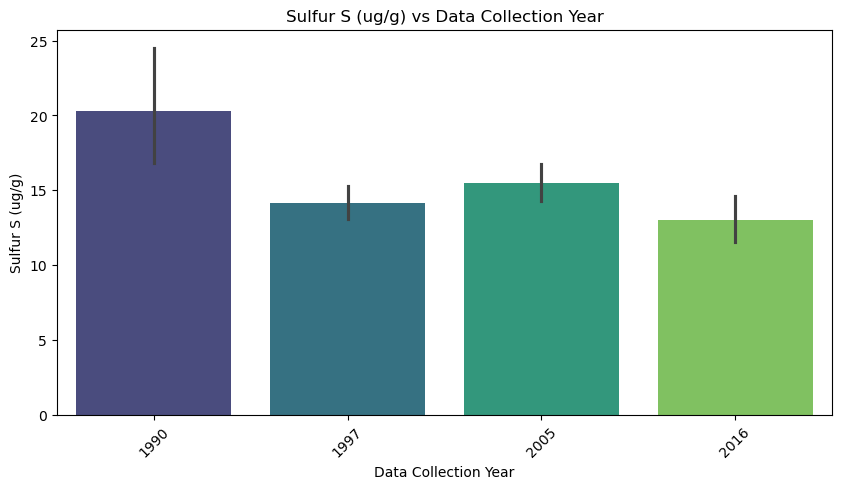

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


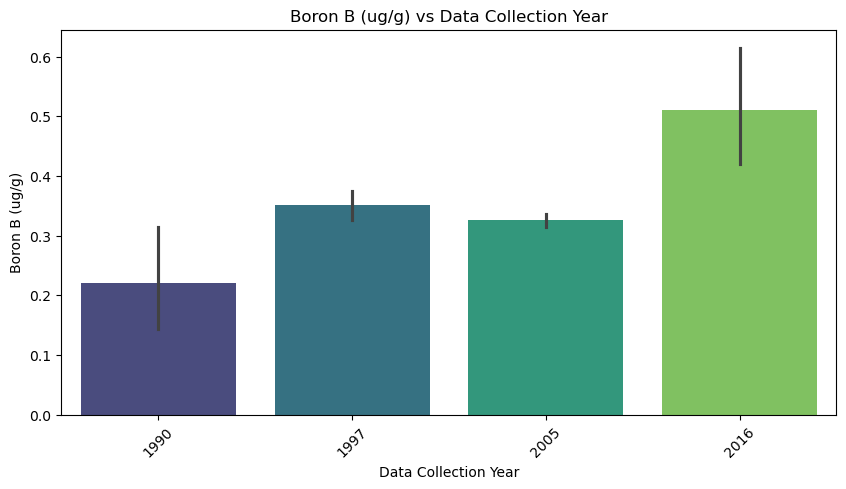

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


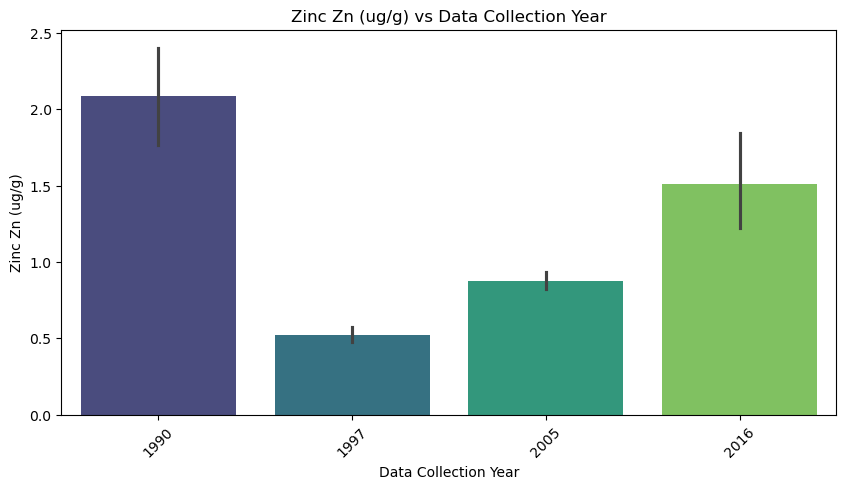

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


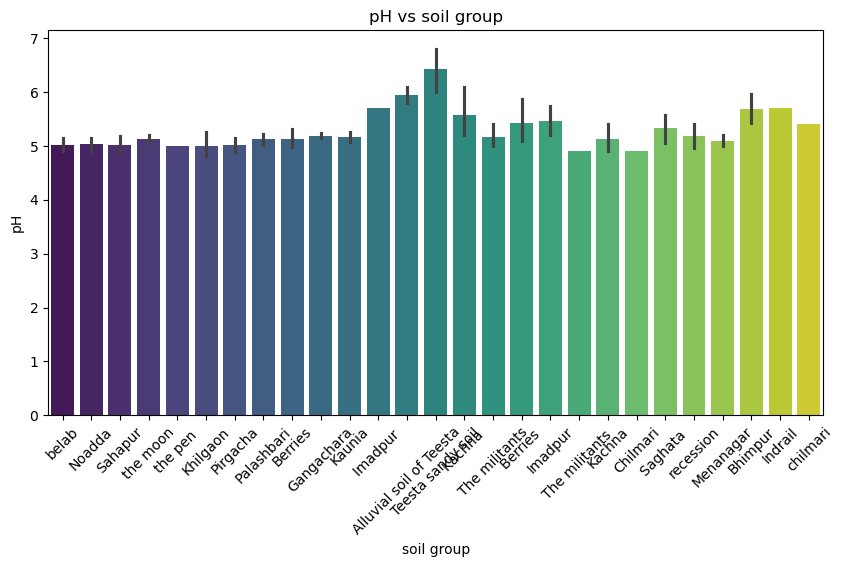

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


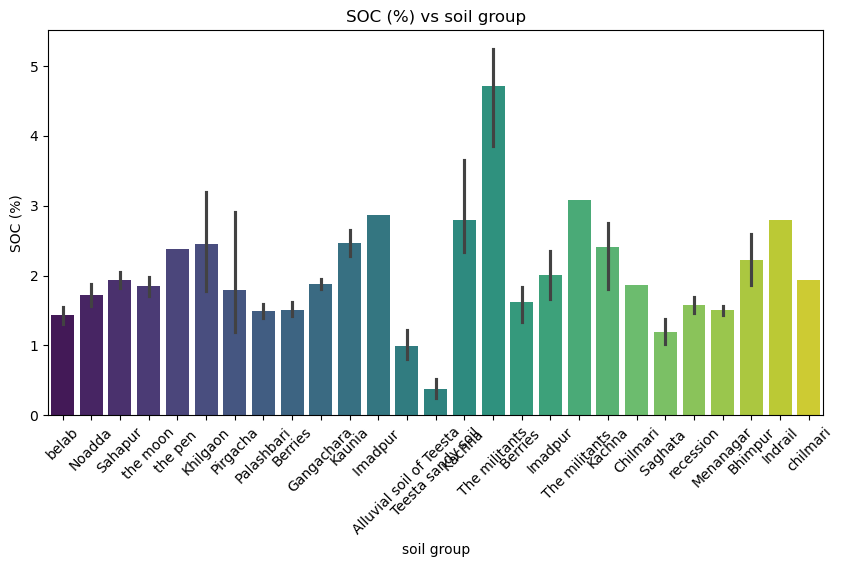

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


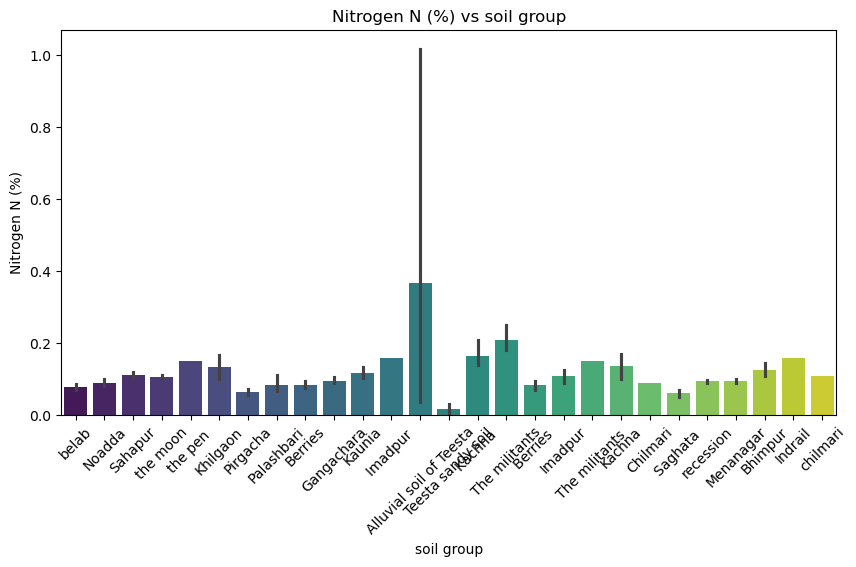

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


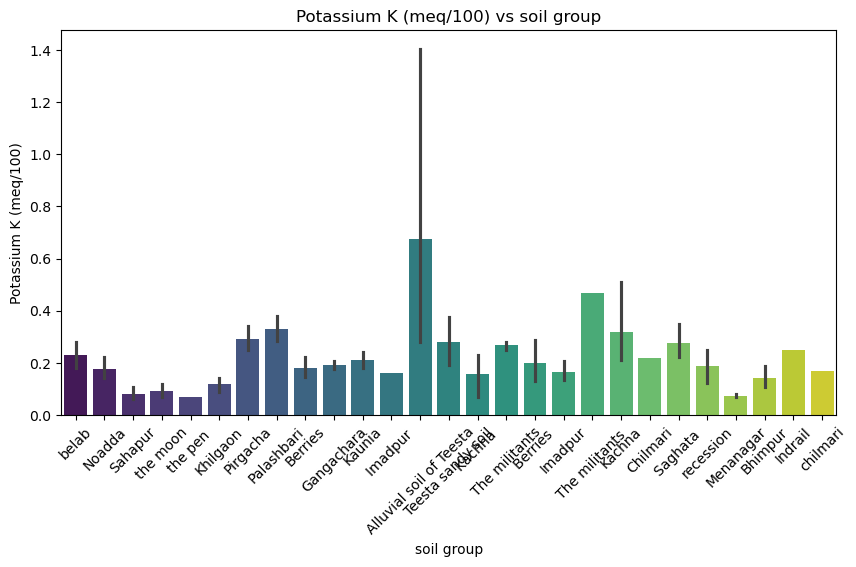

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


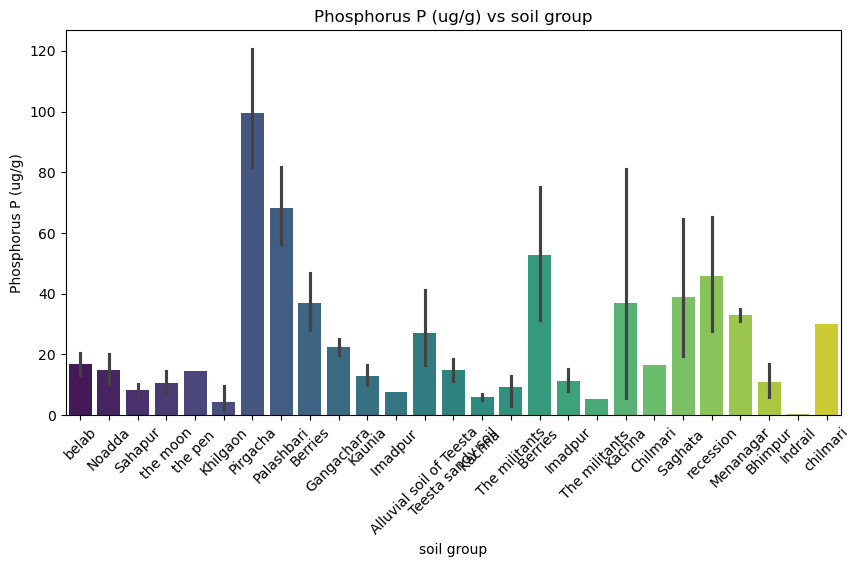

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


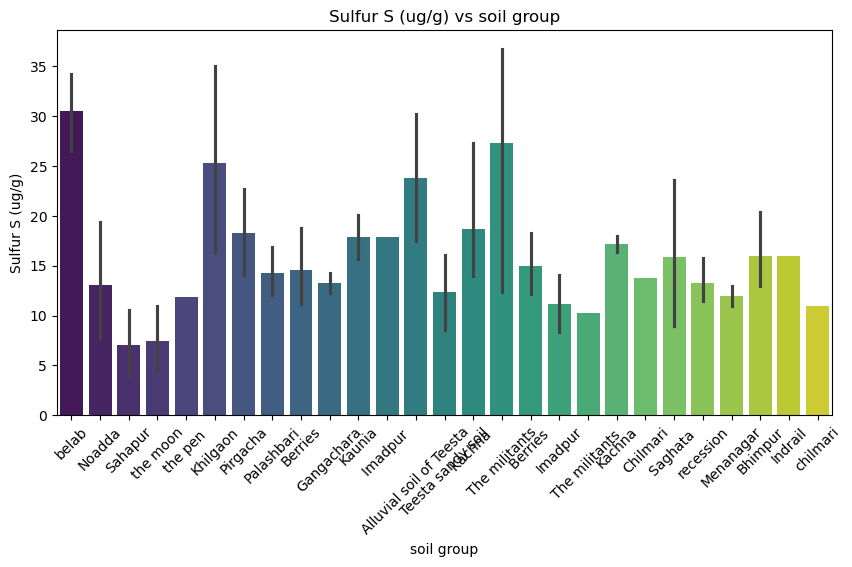

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


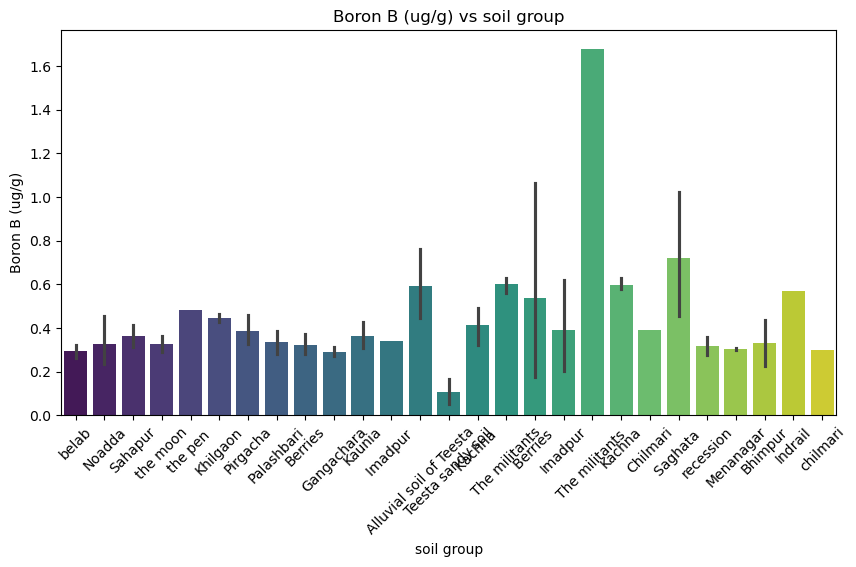

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


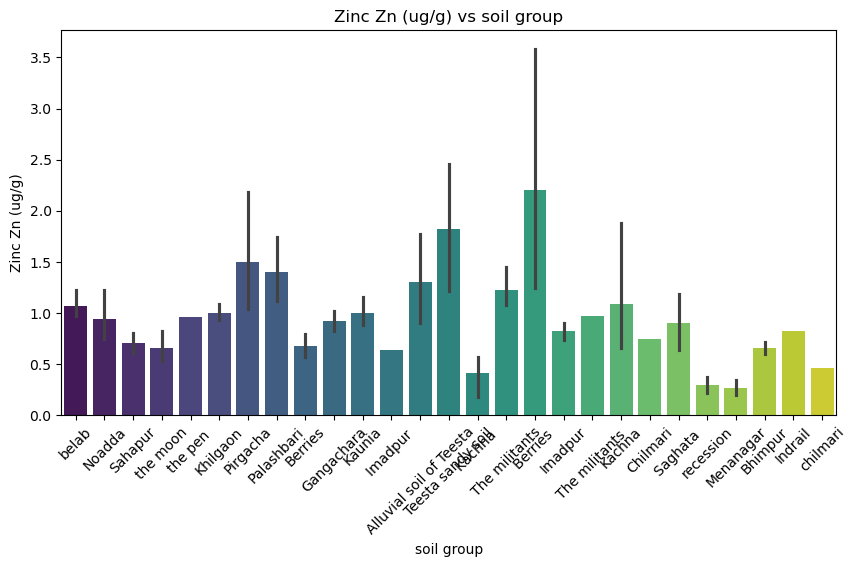

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


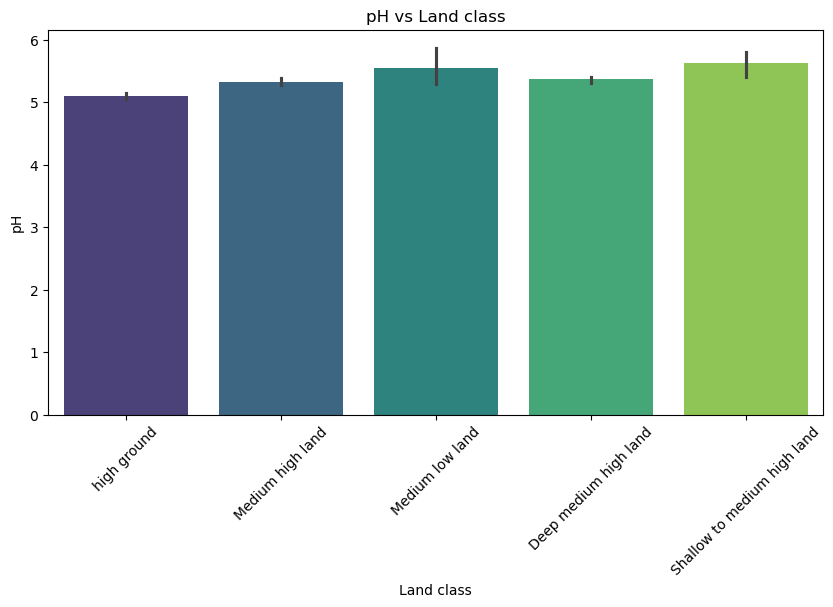

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


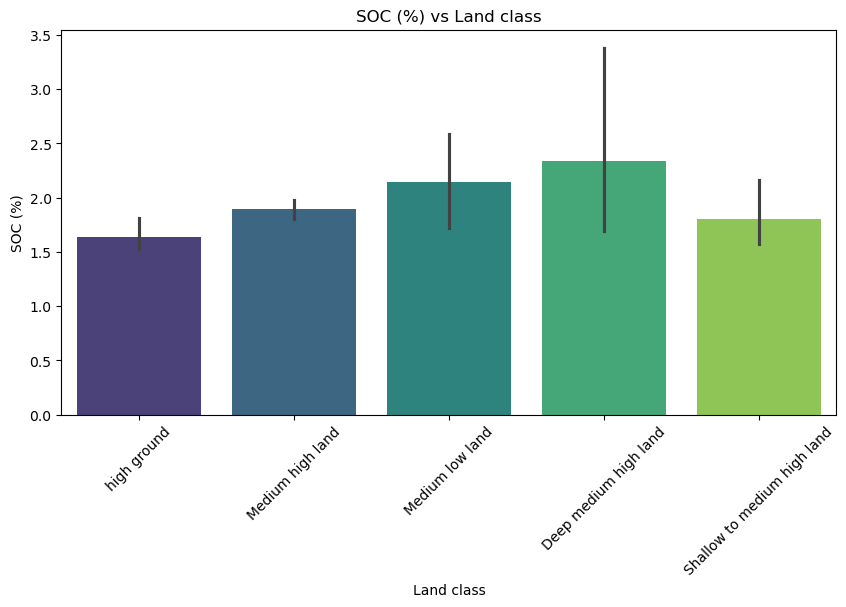

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


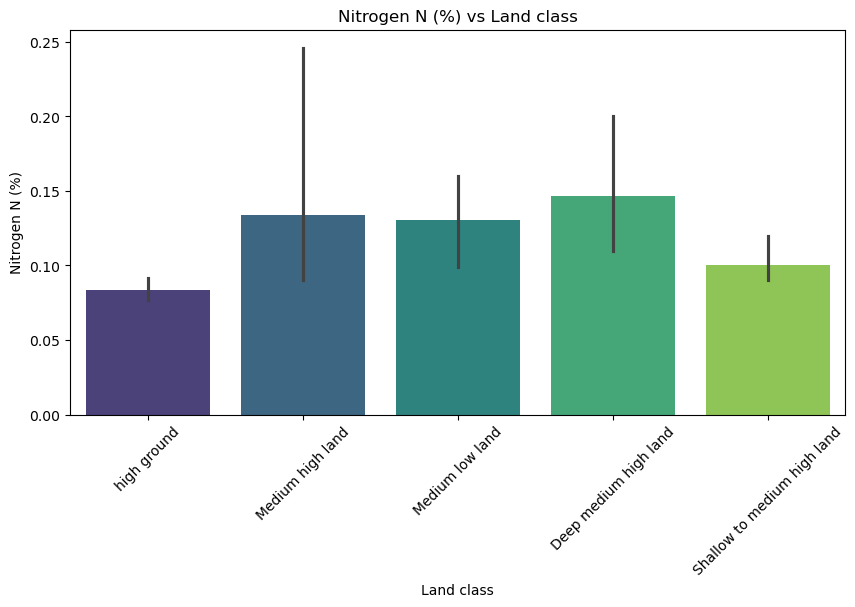

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


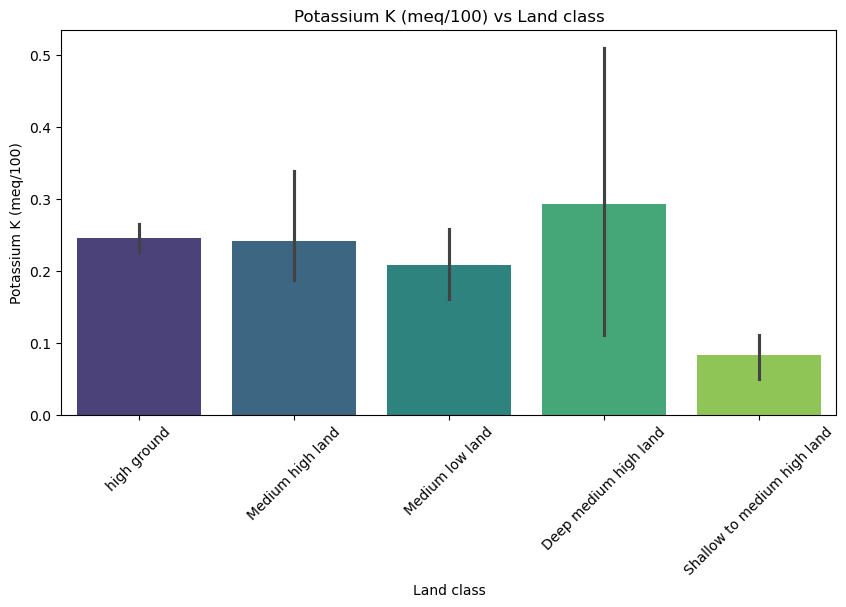

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


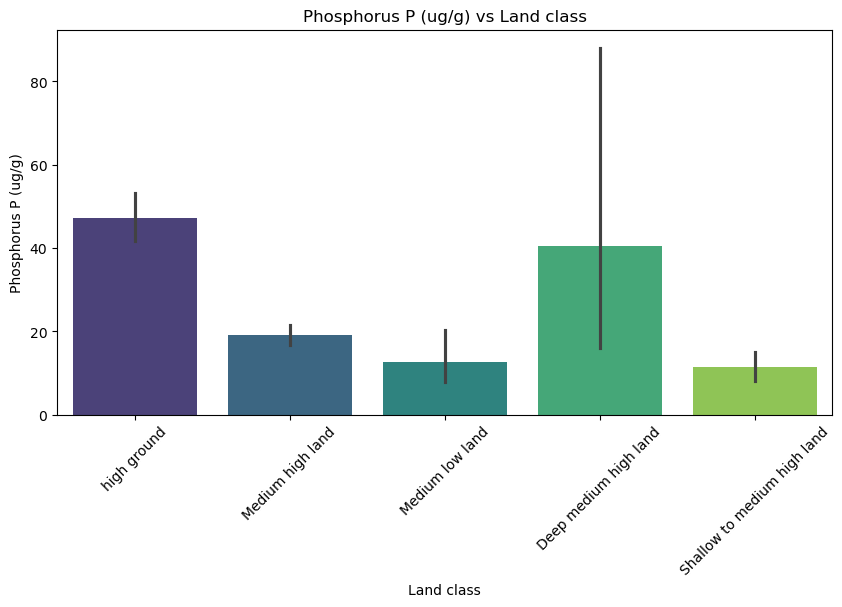

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


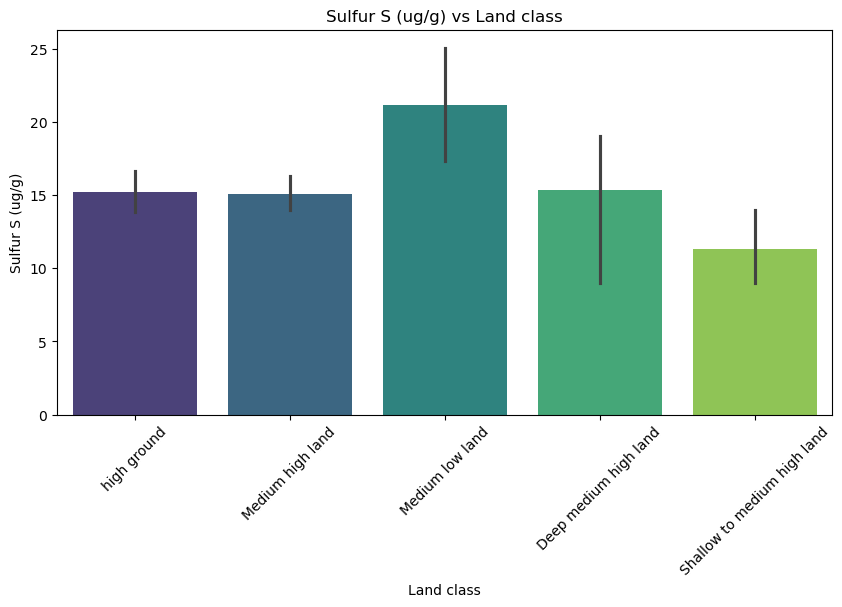

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


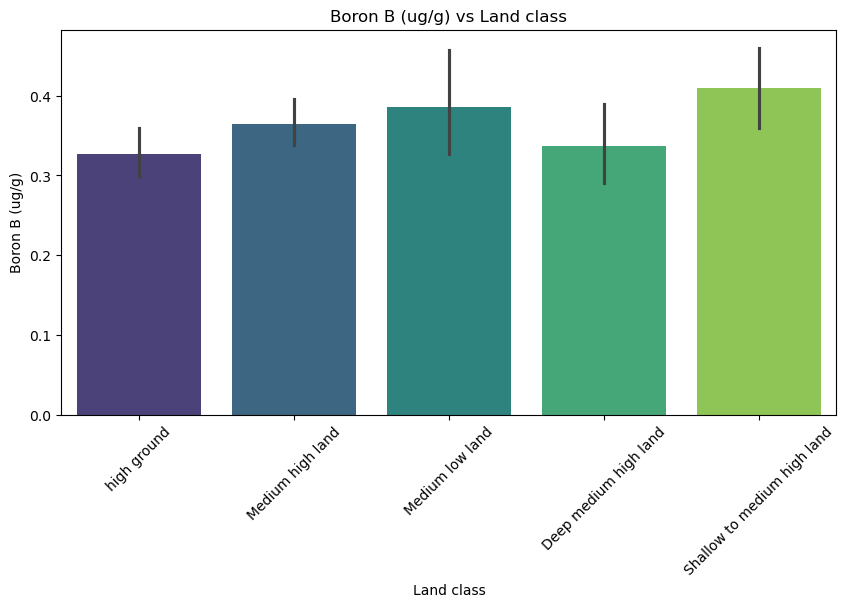

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


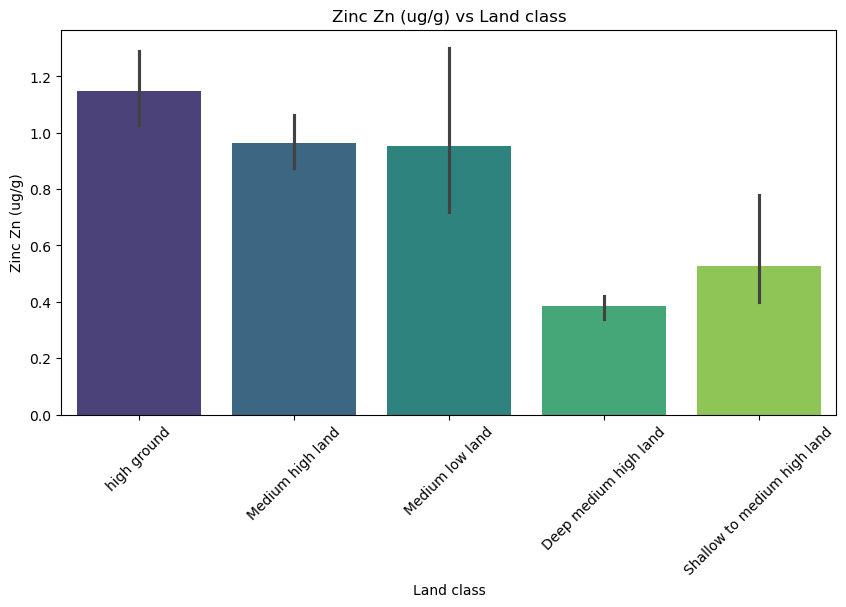

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


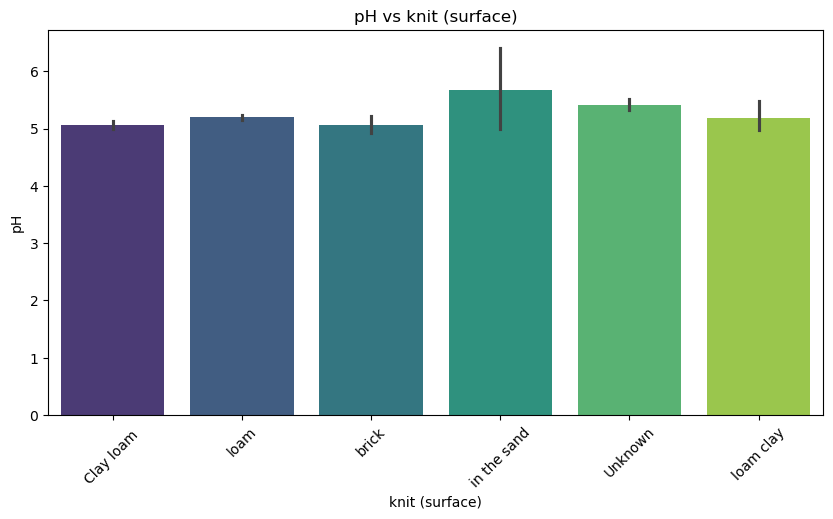

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


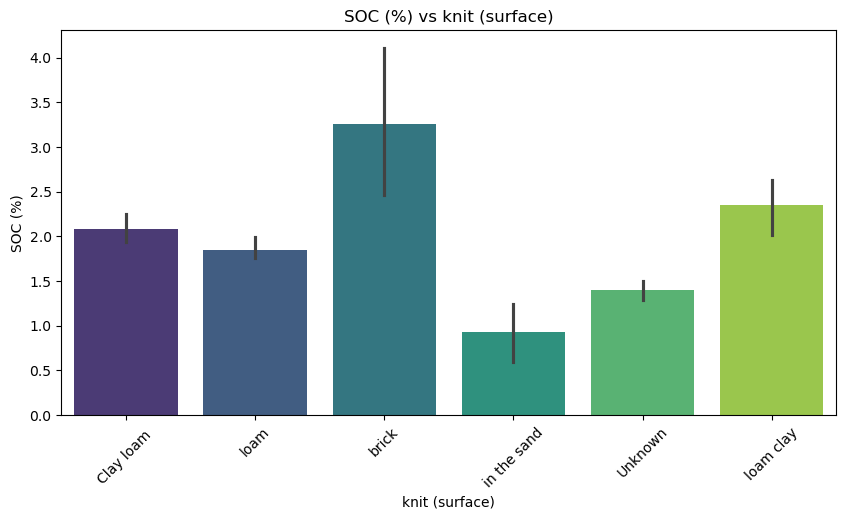

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


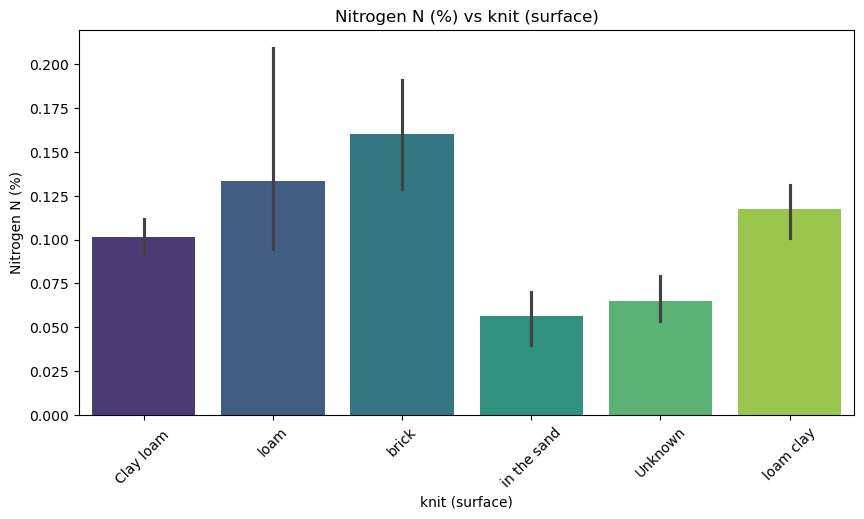

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


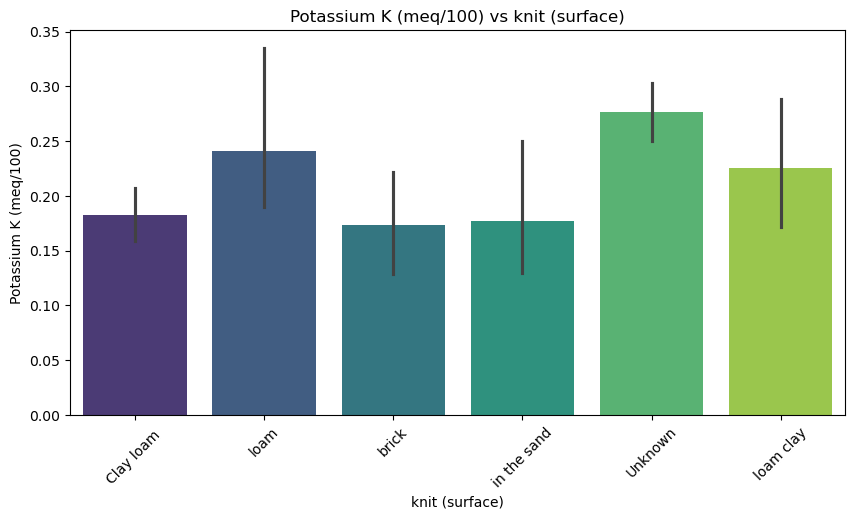

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


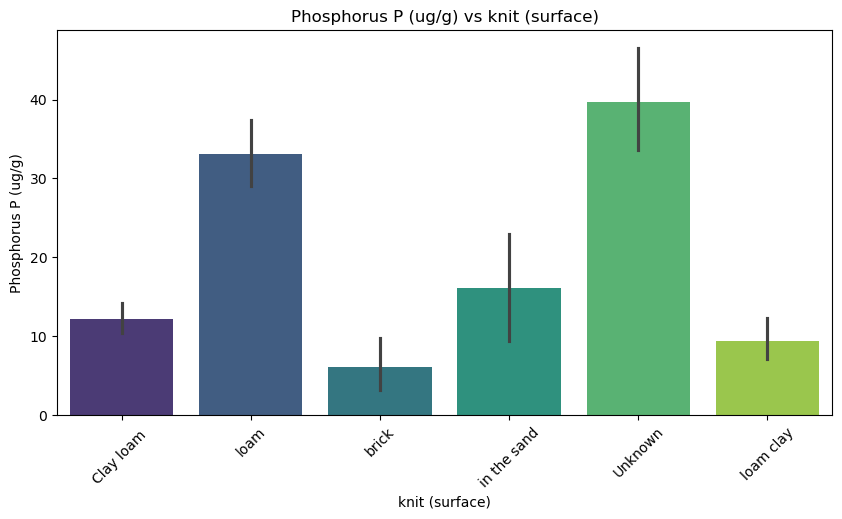

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


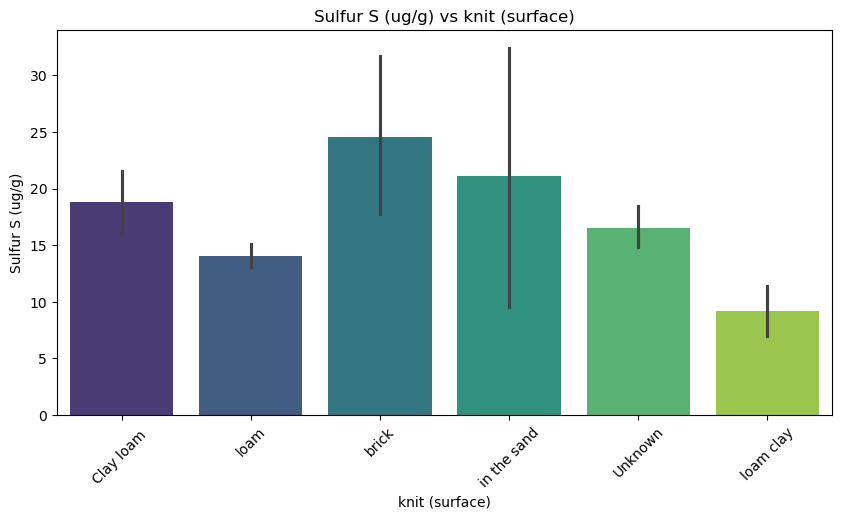

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


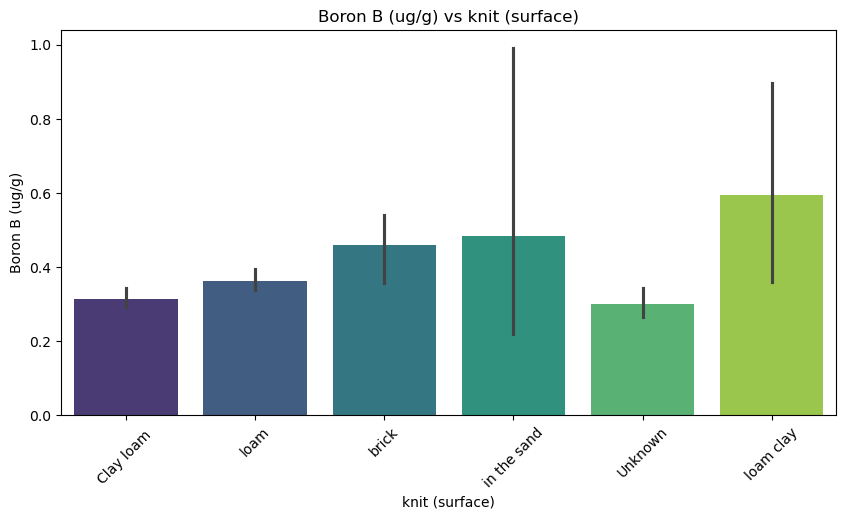

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/4189854754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')


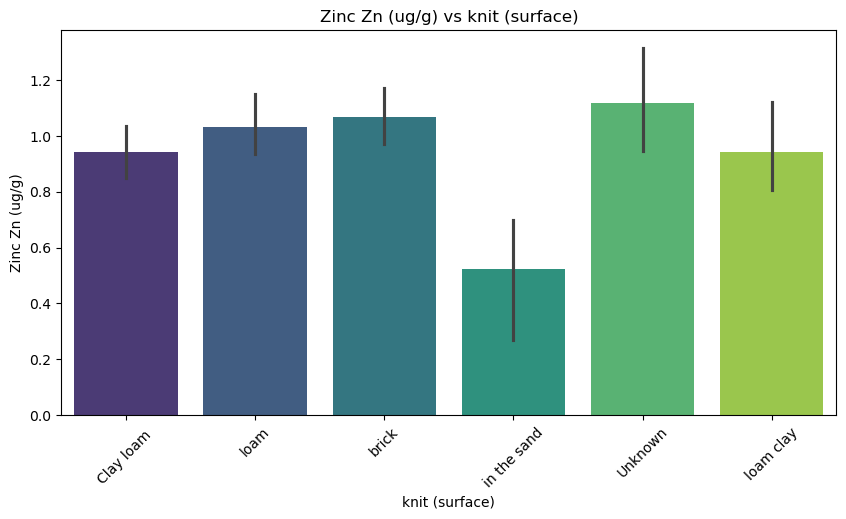

In [ ]:
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=df[cat_feature], y=df[num_feature], palette='viridis')
        plt.title(f'{num_feature} vs {cat_feature}')
        plt.xticks(rotation=45)
        plt.show()

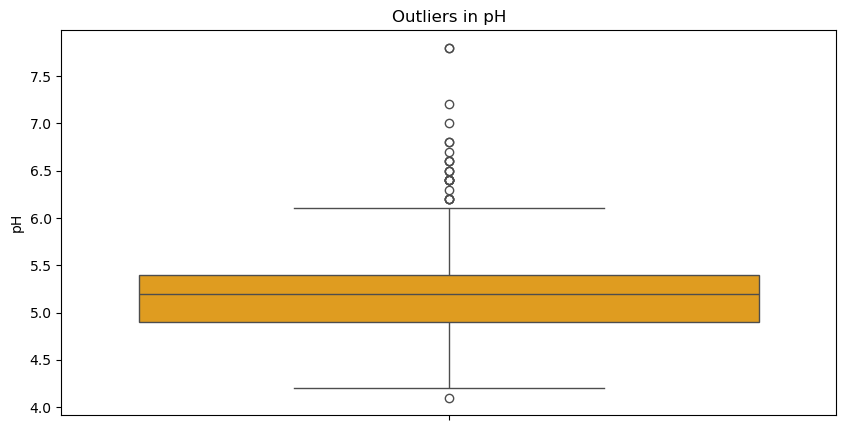

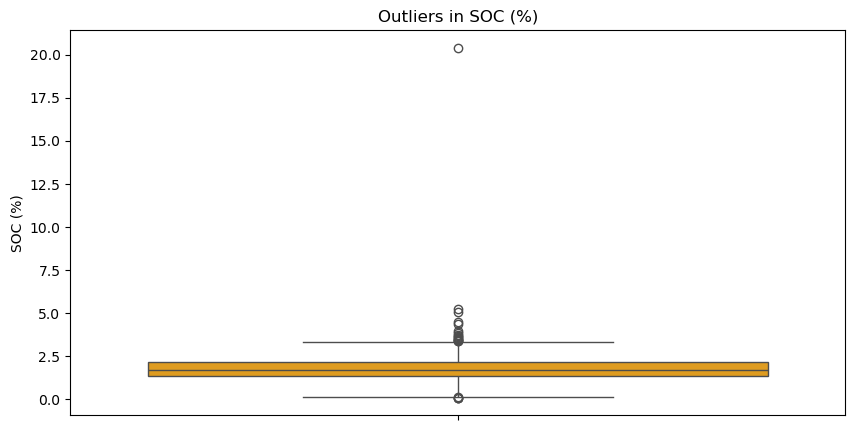

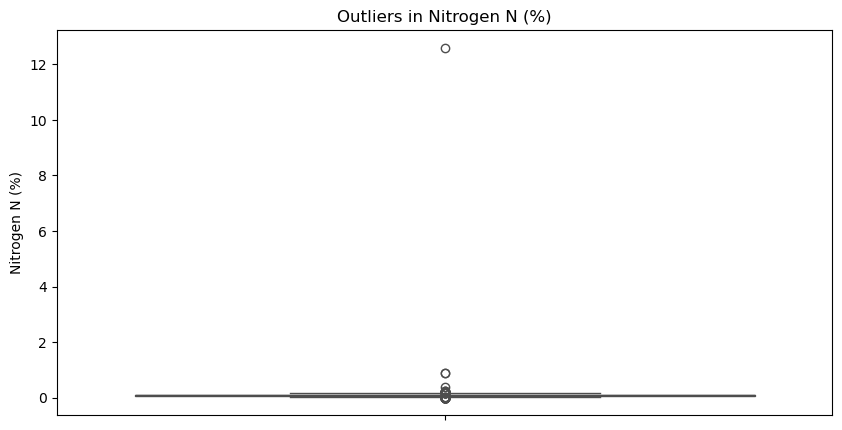

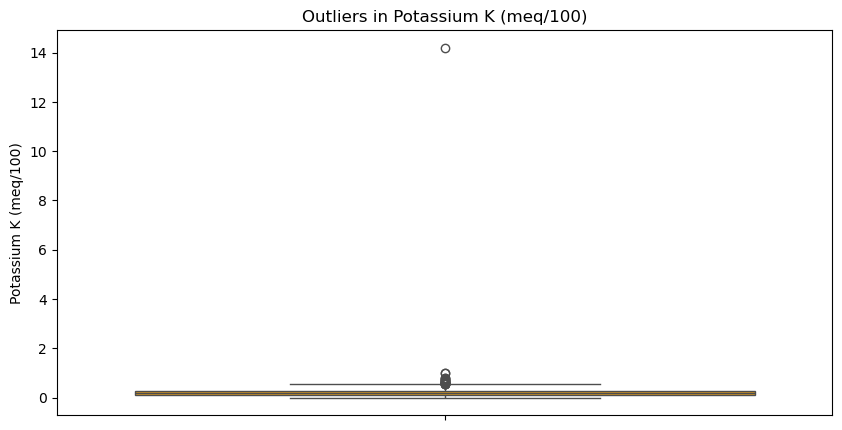

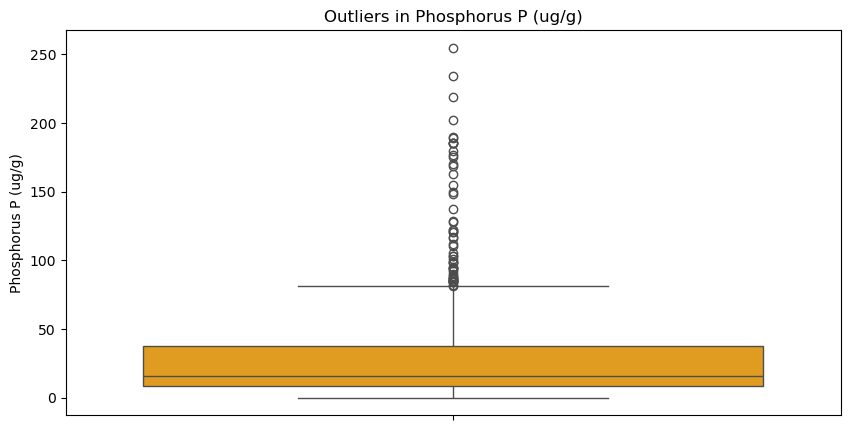

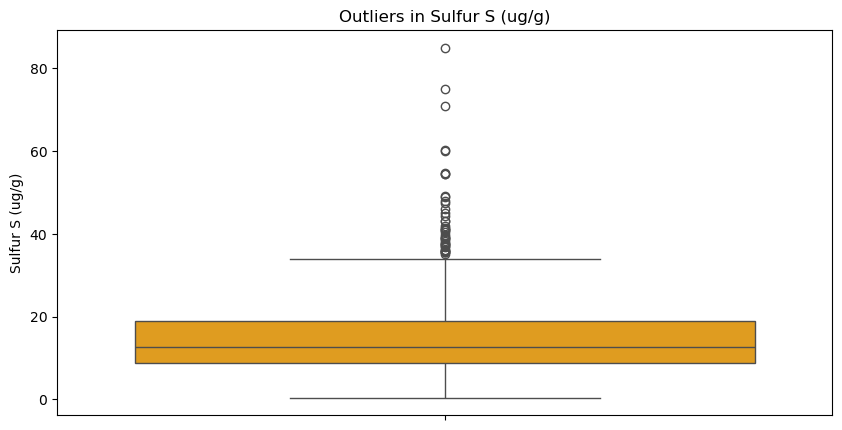

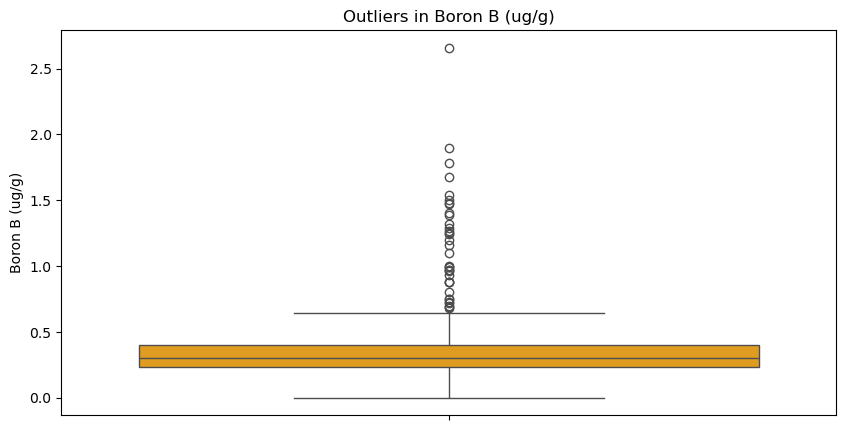

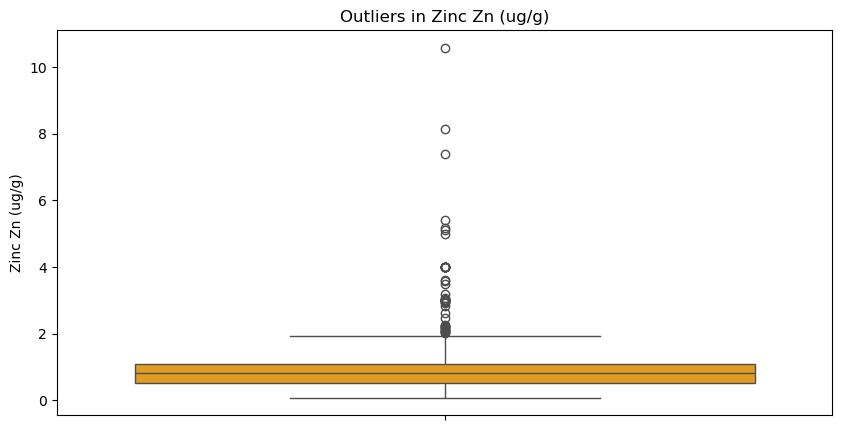

In [27]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature], color='orange')
    plt.title(f'Outliers in {feature}')
    plt.show()

In [30]:
df['soil group'].value_counts()

soil group
Gangachara                 238
Palashbari                  66
Kaunia                      63
Alluvial soil of Teesta     39
Pirgacha                    36
Berries                     32
belab                       20
the moon                    18
Sahapur                     16
Noadda                      15
Imadpur                     11
Teesta sandy soil           11
Berries                     10
Saghata                      8
recession                    8
Khilgaon                     5
Bhimpur                      5
Kachna                       3
The militants                3
Kachna                       3
Menanagar                    2
Imadpur                      1
the pen                      1
The militants                1
Chilmari                     1
Indrail                      1
chilmari                     1
Name: count, dtype: int64

Area-Wise Soil Group Breakdown:

Mithapukur:

Mithapukur has the tallest stacked bar, suggesting it has the highest count of soil samples among the areas.
This implies that Mithapukur may be a focal point for agricultural activity or an area with more extensive soil data collection, indicating more diverse soil types or simply more comprehensive soil sampling.
Many different soil groups contribute to this area, indicating that it may have significant soil diversity or variability in its landscape.

Pirgacha:

Pirgacha also has a tall stacked bar, similar to Mithapukur. The soil groups here are diverse, with various contributions from different groups.
It suggests that this area could also have complex soil dynamics, making it important for agricultural or ecological studies.

Gangachara:

Gangachara has a significantly shorter bar, indicating fewer soil samples or less soil diversity compared to Mithapukur and Pirgacha.
This could mean that Gangachara has a more homogeneous soil composition or that fewer samples were taken from this area.
There may be a lack of diverse soil groups, or the area might have been less studied compared to other regions.

Kaunia and Torgya Thana:

These areas have bars shorter than Mithapukur and Pirgacha but longer than Gangachara.
The presence of various colors in these bars implies that while these areas may not have as many samples as Mithapukur, they still possess some diversity in soil groups.
It could indicate areas of mixed soil types but with less extensive soil group representation compared to Mithapukur.

Soil Group Specific Observations:

Dominant Soil Groups:
Certain soil groups (e.g., represented by the dark blue, dark purple, and teal colors) appear consistently across multiple areas.
This dominance suggests that these soil types are common across multiple locations, which could be indicative of similar agricultural or environmental conditions in those areas.

Less Frequent Soil Groups:
Some colors appear much less frequently or in smaller segments. These could be specialized soil types found only in specific environments or could indicate rare soil conditions that need more attention.
For instance, the presence of bright yellow (representing "the pen") in specific areas but not others might indicate unique soil characteristics limited to certain environments.

Implications for Agricultural Planning:

Areas with greater soil diversity (such as Mithapukur and Pirgacha) might be better suited for diverse crops or for experimental agriculture, given their varied soil conditions. On the other hand, areas like Gangachara could be more suitable for mono-cropping or specialized agriculture, due to its lower soil diversity. The specific soil group dominance could help in planning fertilizer usage or understanding nutrient availability in the soil for different areas.
Potential Need for Further Study:

The distribution also highlights areas that might need further study. For example, areas with a smaller number of samples (like Gangachara) may benefit from more sampling to understand their soil profiles comprehensively.
The presence of segments labeled as "unknown" indicates possible gaps in data collection or soil groups that have yet to be classified properly.


Soil Management Strategies:

For areas like Mithapukur, with a high diversity of soil groups, a localized and targeted approach to soil management might be necessary. This could include specific nutrient management plans depending on the prevalent soil types within micro-regions.
For areas with less diversity (like Gangachara), a more generalized approach to soil management may be effective, although the lower diversity might necessitate more attention to maintaining soil health over time.

Soil Group Aggregation:

The cumulative height of the bars indicates the overall soil sample count, which may also correlate with soil sampling intensity or the importance of the area from an agricultural perspective.
Areas with high counts might have seen more activity due to agricultural importance or ongoing studies, while lower-count areas could be of less agricultural focus or more uniform soil properties.

Summary:

Mithapukur and Pirgacha are the areas with the highest soil diversity and number of soil samples, suggesting they are critical for agricultural activities and may require diverse soil management strategies.
Gangachara has the lowest diversity, indicating a possibly more homogeneous soil environment.
Kaunia and Torgya Thana have moderate diversity, suggesting mixed soil types but still fewer samples compared to Mithapukur and Pirgacha.
Dominant soil groups appearing across multiple areas suggest widespread soil types, while less frequent groups indicate unique or localized soil conditions.

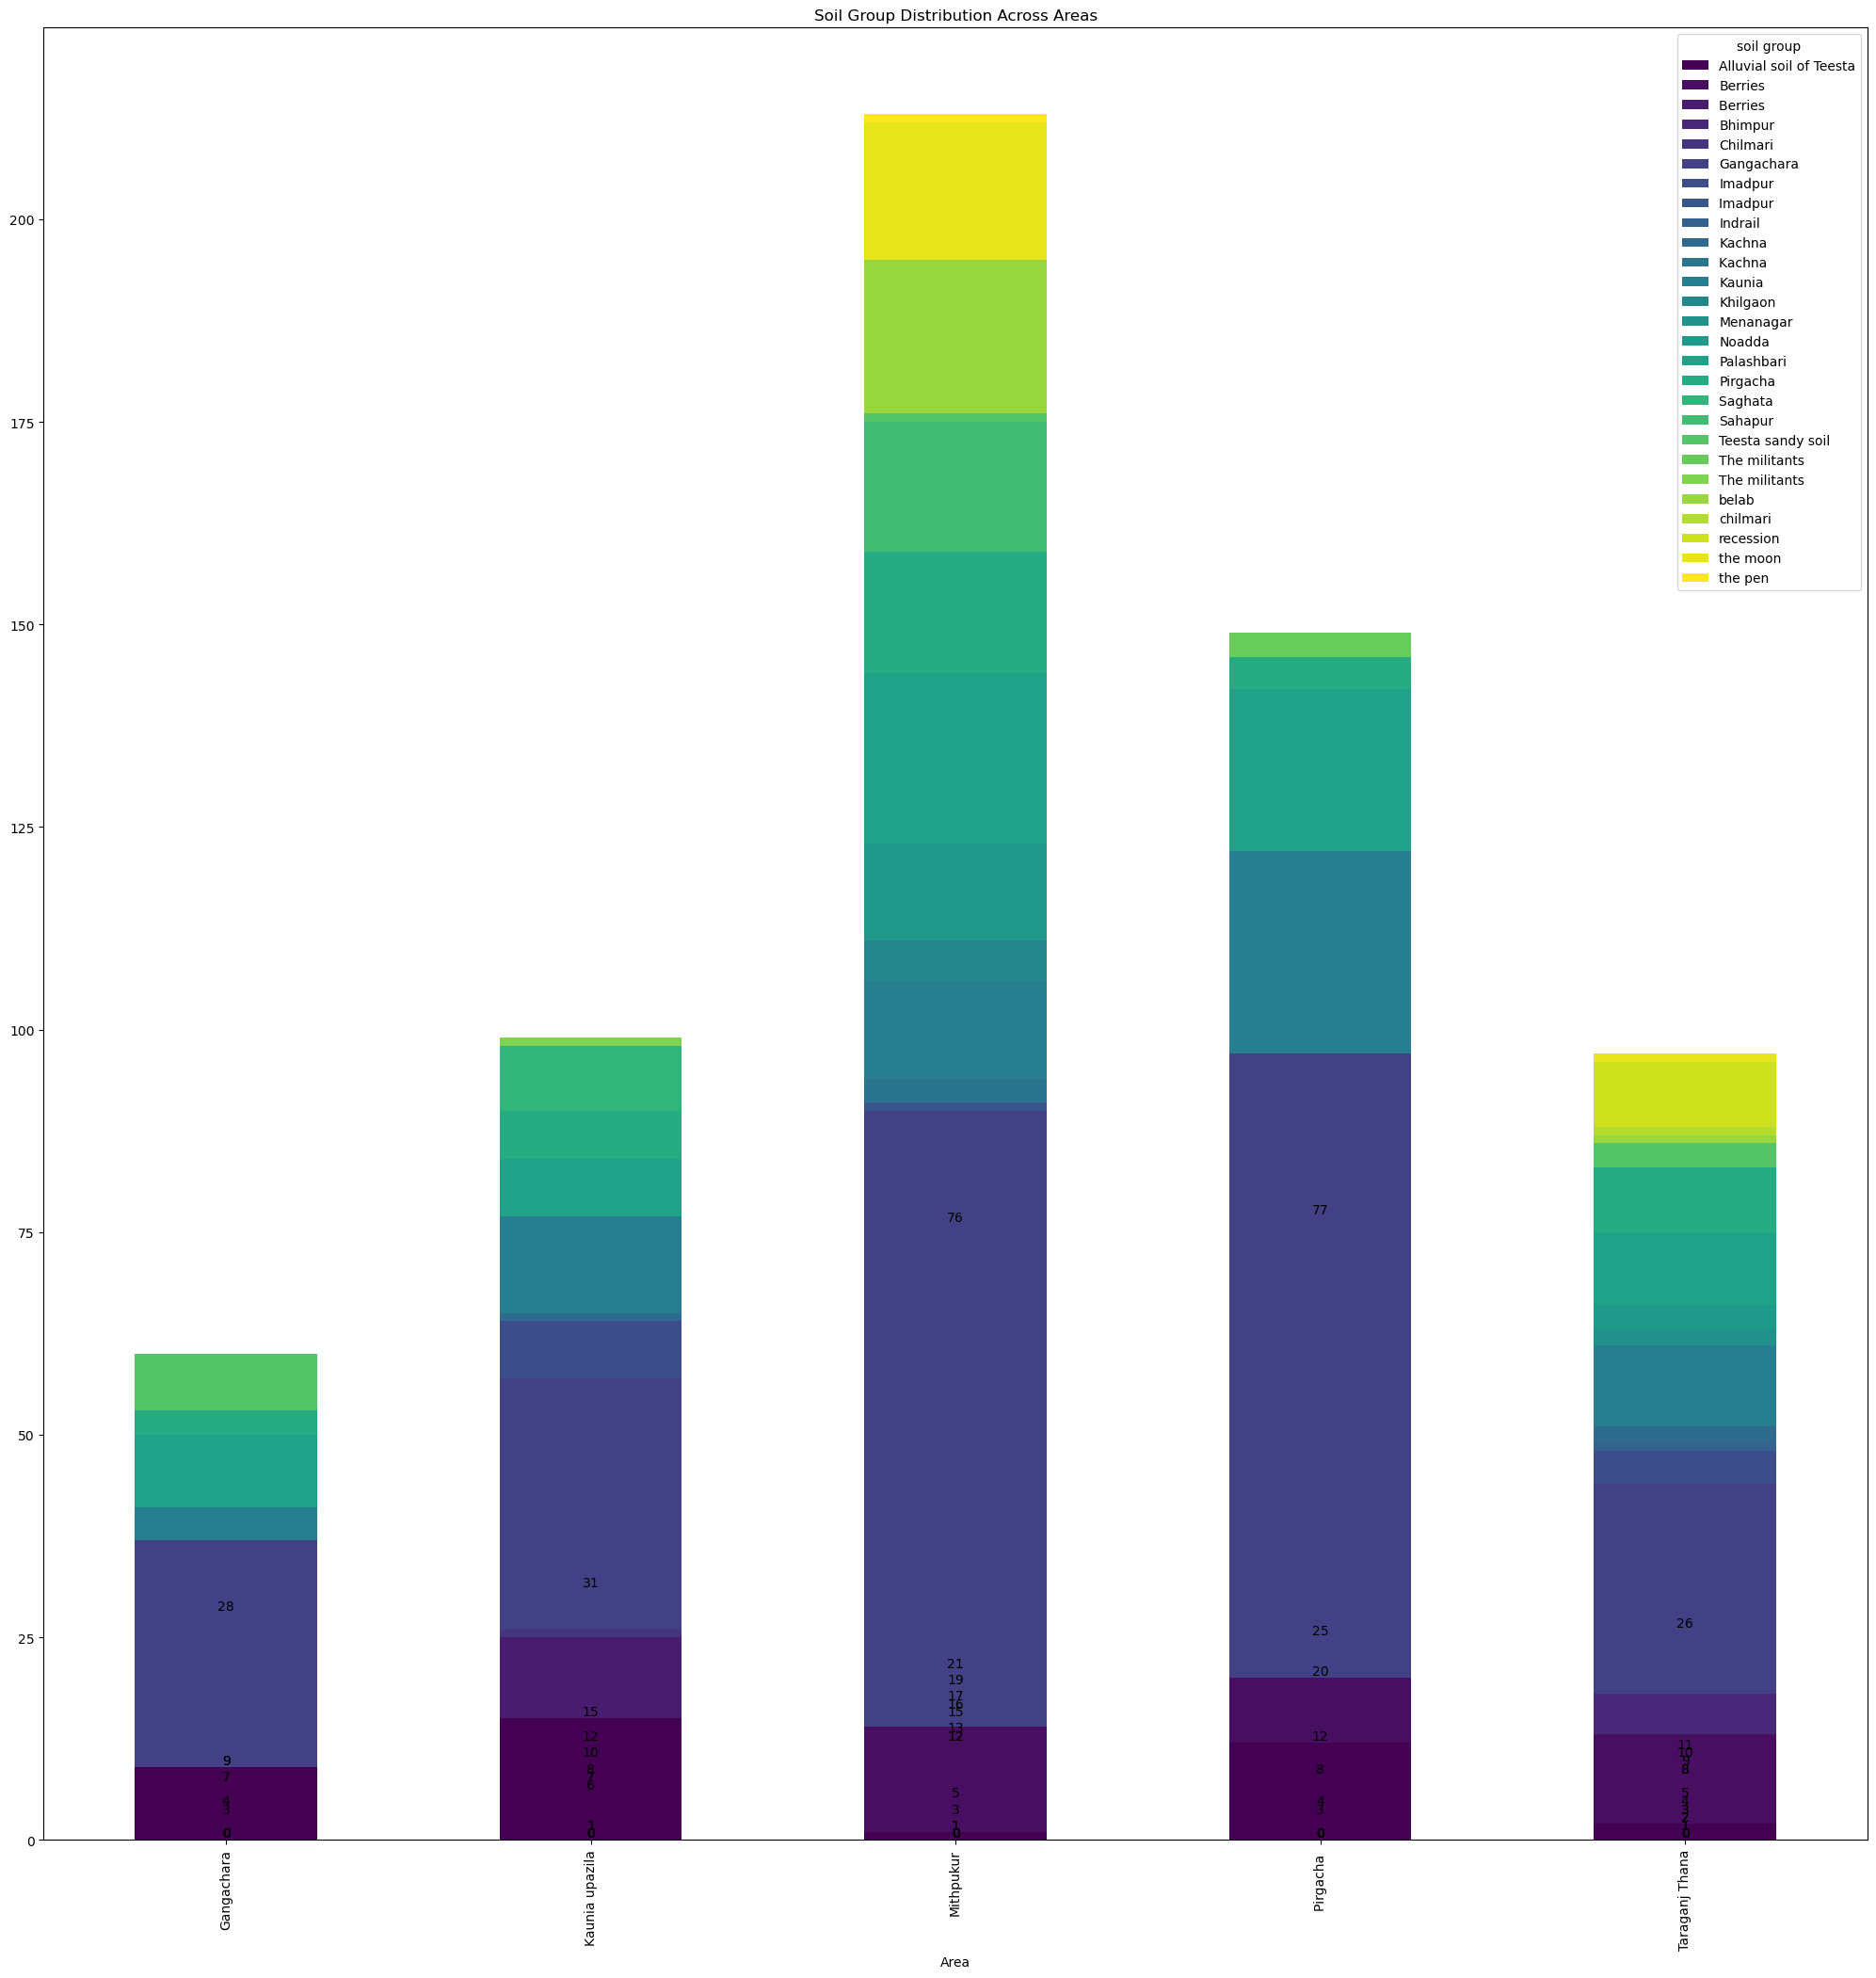

In [66]:
ax = pd.crosstab(df['Area'], df['soil group']).plot(kind='bar', stacked=True, figsize=(25, 25), colormap='viridis')
plt.title('Soil Group Distribution Across Areas')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Mithapukur:

Mithapukur has the longest horizontal bar, indicating it has the largest number of soil samples compared to the other areas.
The bar is divided into numerous colored segments, which represents the diversity of soil groups found in Mithapukur.
Soil groups represented by darker colors (e.g., purple and blue) have larger segments, implying that these soil groups are more abundant in this area.
The presence of a wide variety of soil groups makes Mithapukur potentially important for diverse agricultural activities. It also suggests the complexity of the soil landscape in this region.

Pirgacha:

The length of the bar in Pirgacha is similar to Mithapukur, suggesting a similarly large soil sample count.
However, the distribution of soil groups appears to be somewhat different compared to Mithapukur.
The segments are more evenly distributed, indicating that multiple soil groups have significant representation in Pirgacha.
This diversity could suggest a well-balanced soil profile that may support a wide range of agricultural activities.

Targanj Thana:

Targanj Thana has a moderate-length bar, showing it has fewer soil samples compared to Mithapukur and Pirgacha but more than Gangachara and Kaunia Upazilla.
There is significant representation of yellow and green segments, which could indicate the presence of some unique soil types not as prevalent in other regions.
The consistent presence of multiple soil types indicates some level of soil group diversity, but overall the total number of samples is less.

Kaunia Upazilla:

Kaunia Upazilla has a shorter horizontal bar than Mithapukur and Pirgacha, indicating fewer soil samples collected.
The bar has fewer and broader colored segments, meaning fewer distinct soil groups are present.
This suggests less soil diversity and potentially more homogeneous soil characteristics. The area might have specialized soil conditions that could favor certain types of crops but limit broader agricultural uses.

Gangachara:

Gangachara has the shortest bar, indicating it has the least number of soil samples.
There are fewer segments, indicating that soil group diversity is likely limited in Gangachara.
This could imply a more uniform soil environment. The dominance of certain soil types (represented by darker colored segments) suggests a prevalence of specific soil conditions that might support specialized agriculture or indicate a lack of variability in the region’s soil profile.

Soil Diversity:

Mithapukur and Pirgacha have both the largest number of soil samples and the highest diversity of soil groups. This makes these areas prime candidates for agricultural diversity or further detailed soil studies.
Gangachara, on the other hand, has limited diversity and fewer samples, suggesting less variation in soil types or fewer explorative soil studies conducted.

Soil Specialization:

Kaunia Upazilla and Targanj Thana show a moderate level of diversity, with some soil groups being prominent in both areas. The relatively narrower distribution compared to Mithapukur or Pirgacha suggests these regions may have specific soil types that are predominant.
Unique Soil Groups (such as yellow and light green) are more prevalent in Targanj Thana and Kaunia Upazilla, suggesting specialized conditions possibly associated with specific local geological or environmental factors.

Potential Agricultural Implications:

Mithapukur and Pirgacha:

Given their large number of samples and diversity, these areas could support a wide range of crop types.
The complexity of soil types may also necessitate specific soil management practices to optimize agricultural output.

Gangachara:

The low diversity and sample count may suggest focusing on specialized crop production or a more straightforward approach to soil management.
This could make Gangachara well-suited for crops that thrive in homogenous soil conditions.

Targanj Thana and Kaunia Upazilla:

The presence of unique soil groups indicates the possibility of specialized crops that can thrive in those specific soil conditions.
These areas may require soil amendments or different fertilizer strategies tailored to the specific soil groups that are dominant.

Summary:
Mithapukur and Pirgacha have the highest diversity and count of soil groups, making them suitable for broad agricultural activities.
Gangachara has the least soil diversity, possibly making it better suited for specialized agricultural activities.
Targanj Thana and Kaunia Upazilla show moderate diversity, with some unique soil groups, indicating potential for specialized soil management.
The insights gained can guide agricultural practices, soil management strategies, and further research efforts to optimize land use based on the soil characteristics of each area.

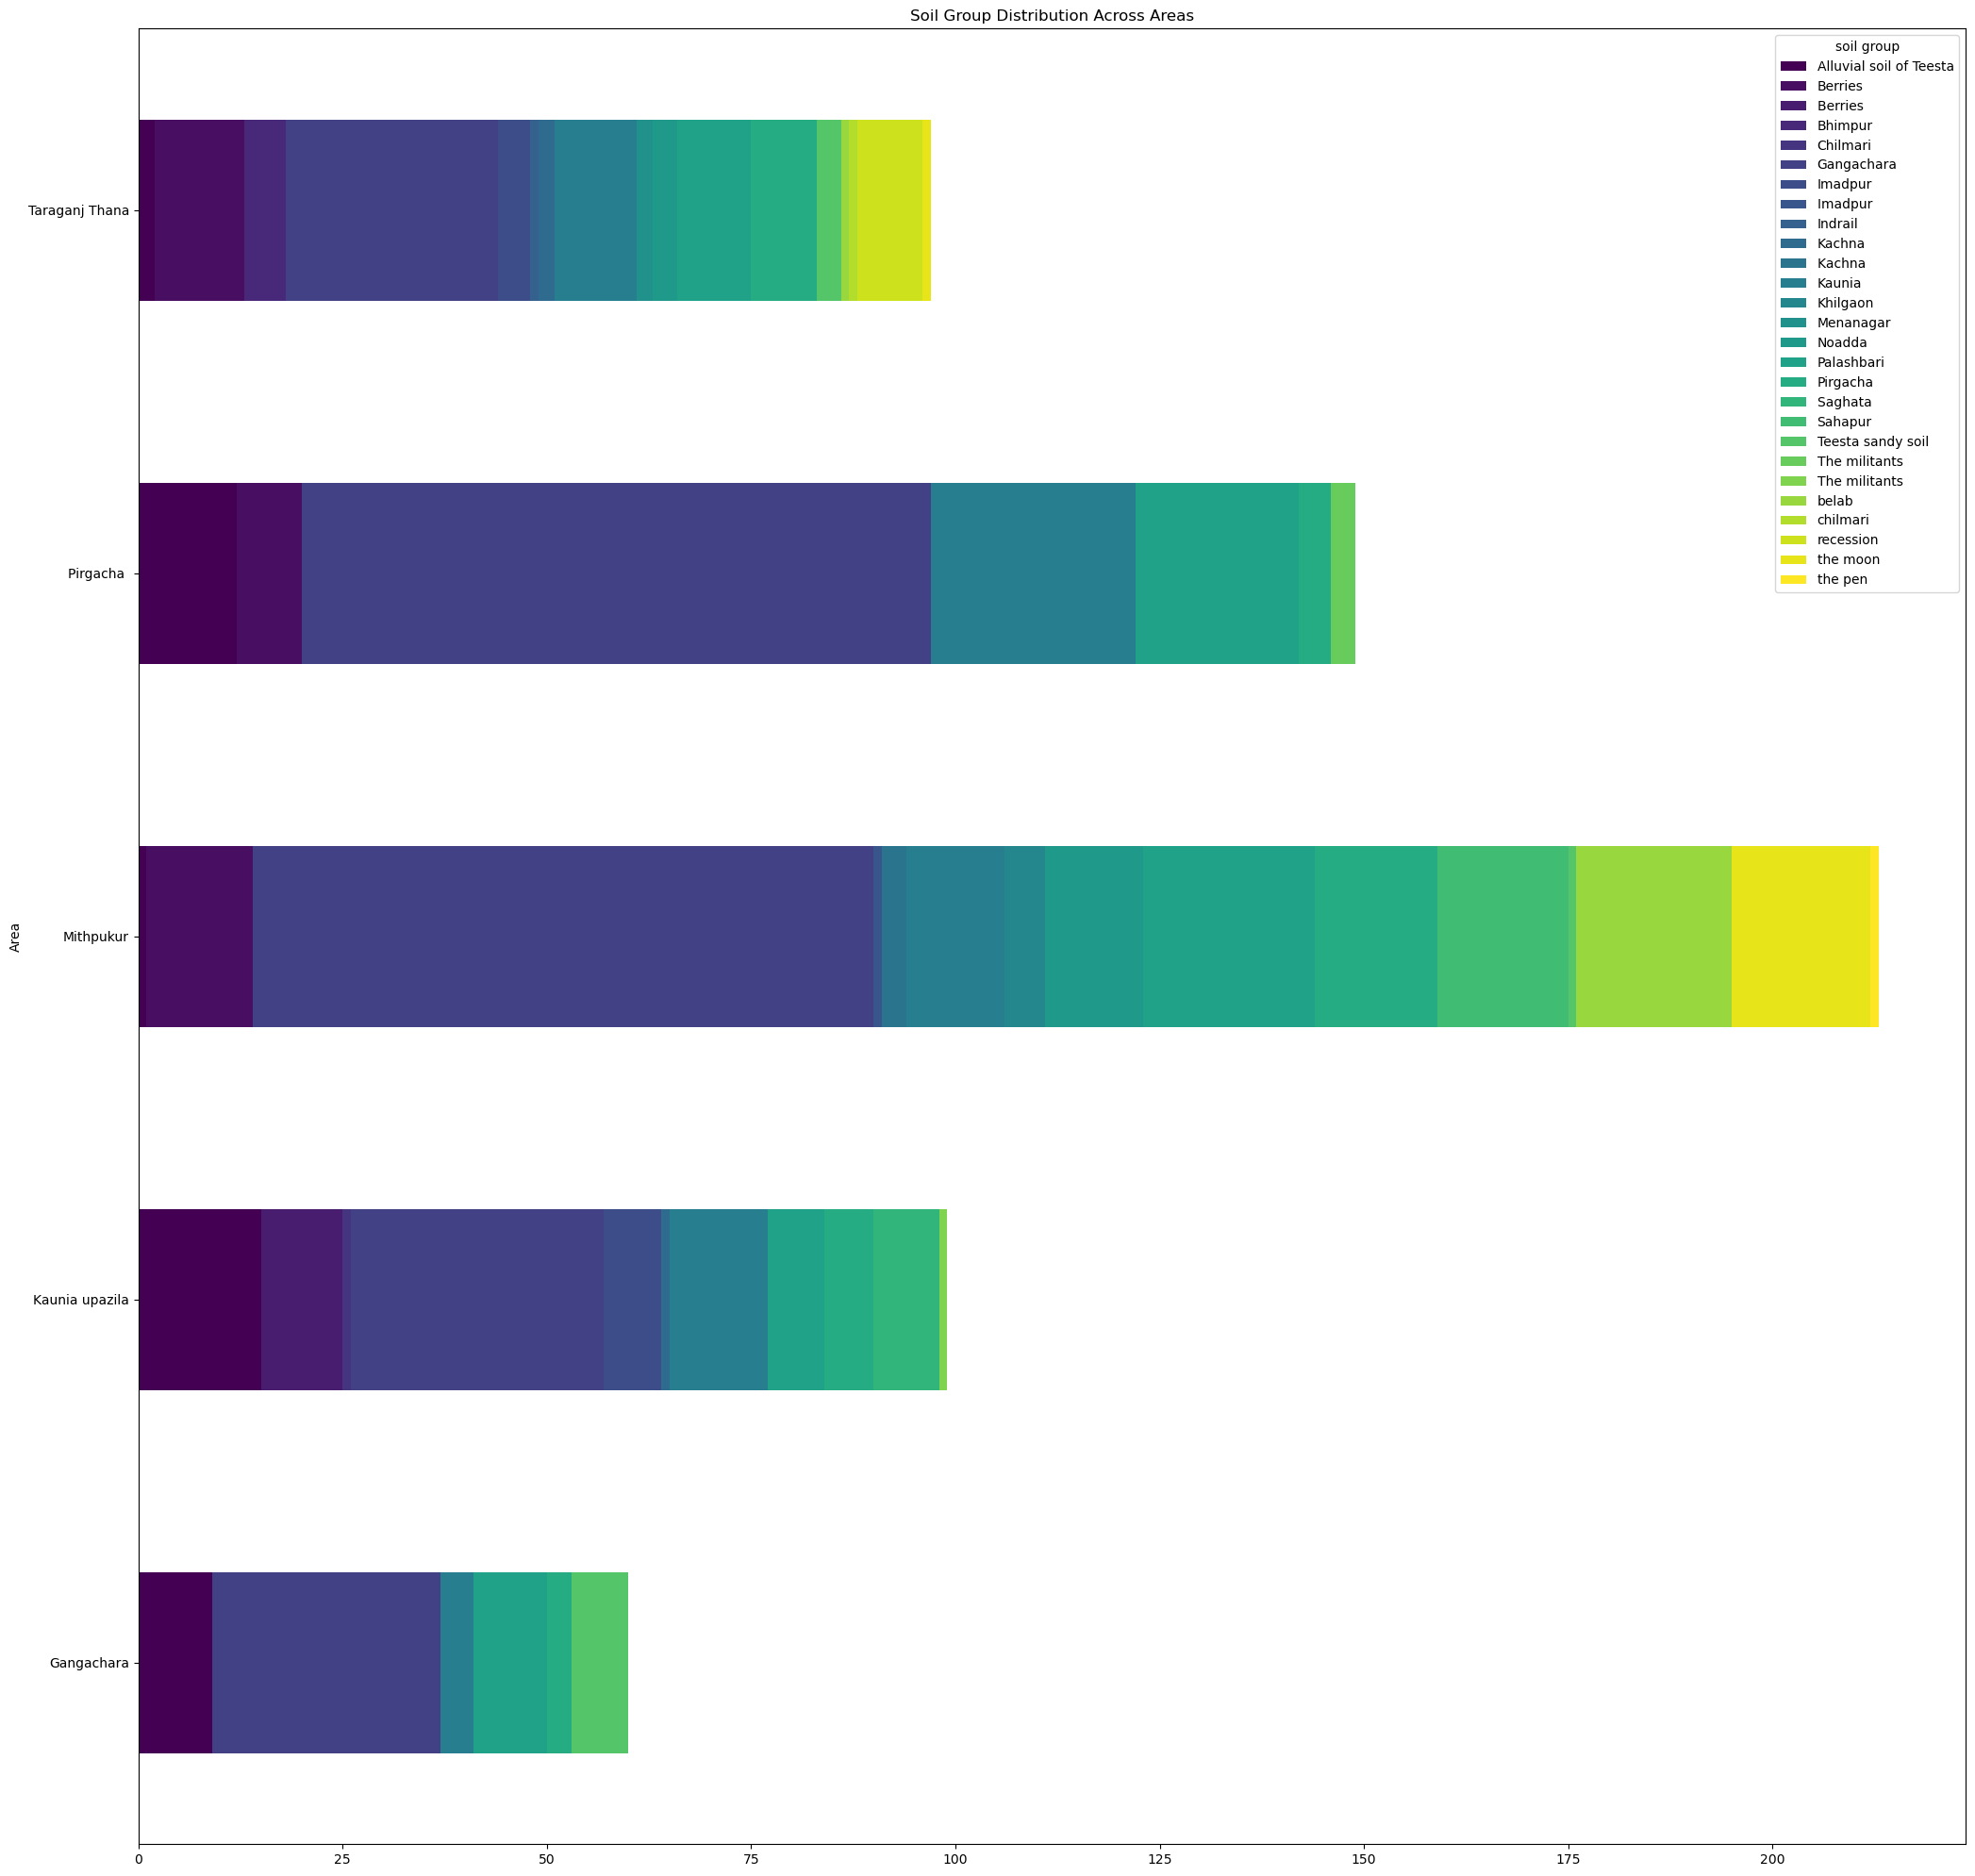

In [67]:
pd.crosstab(df['Area'], df['soil group']).plot(kind='barh', figsize=(25, 25), colormap="viridis", stacked=True)
plt.title('Soil Group Distribution Across Areas')
plt.show()

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


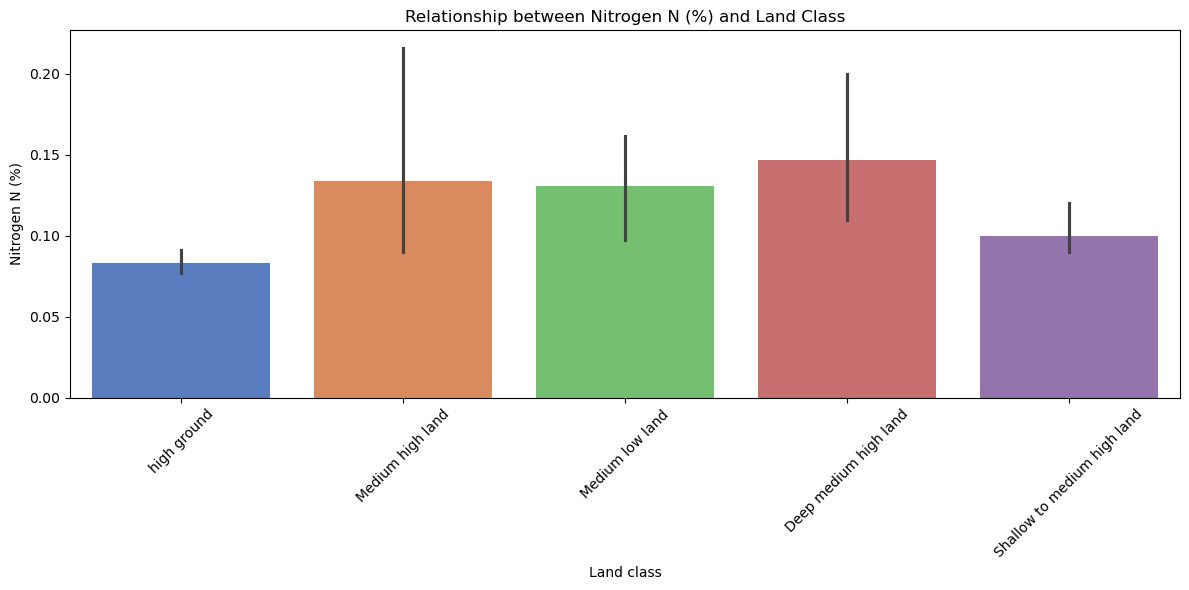

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


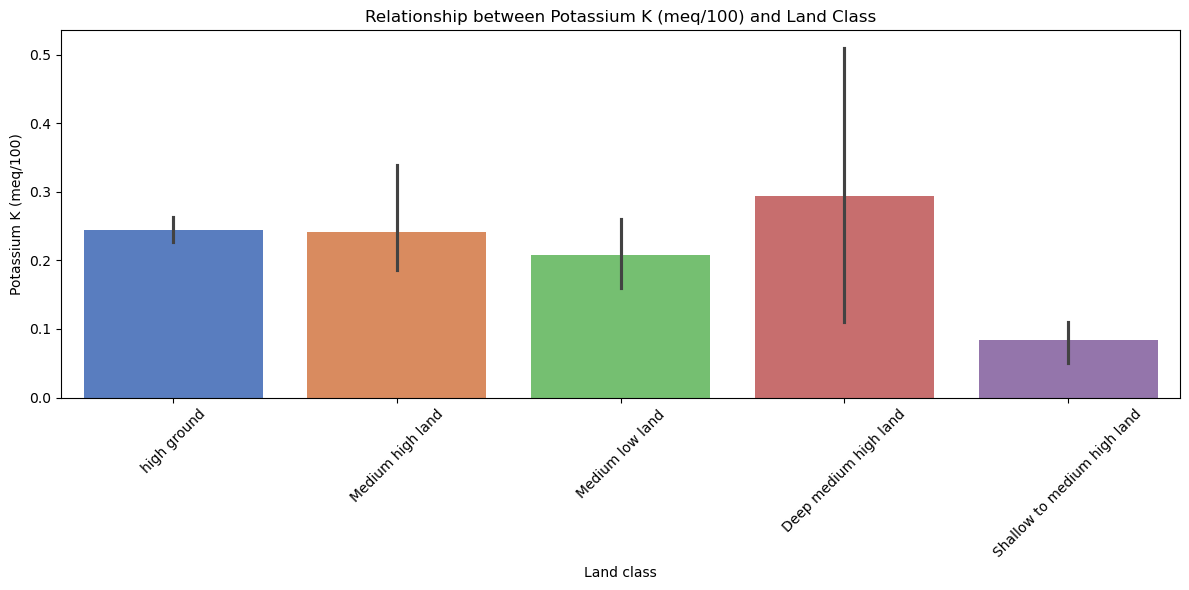

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


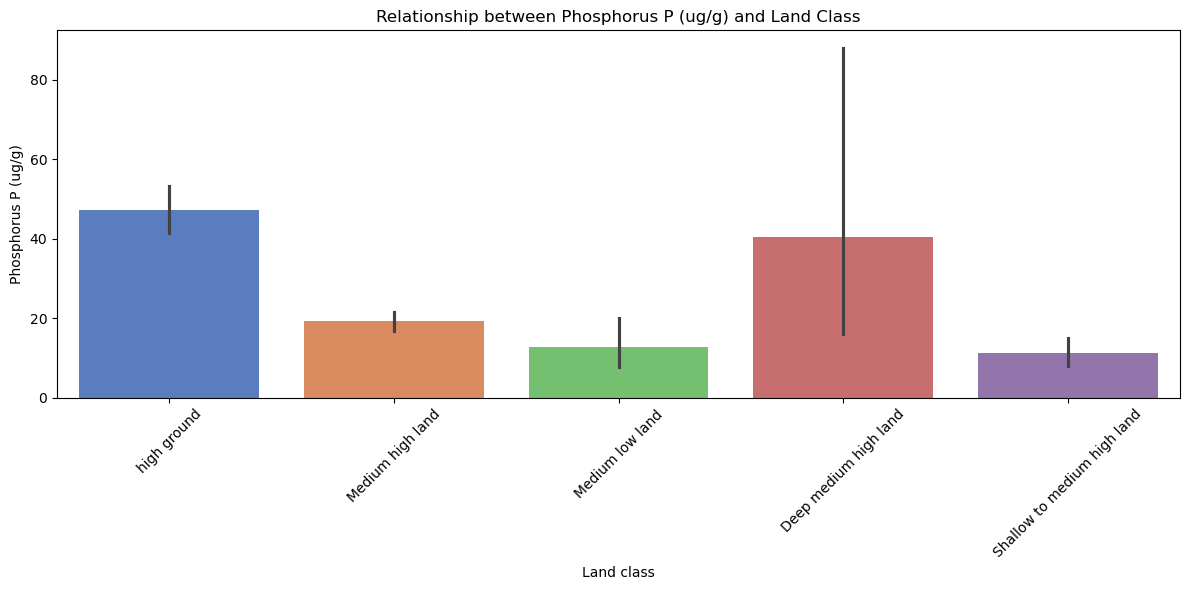

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


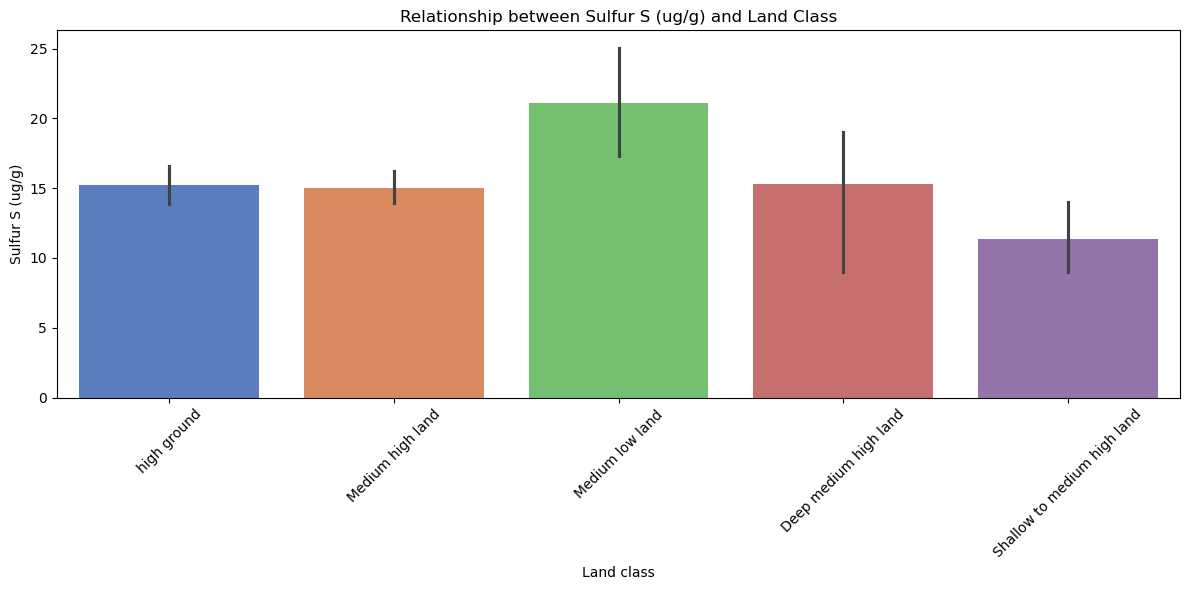

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


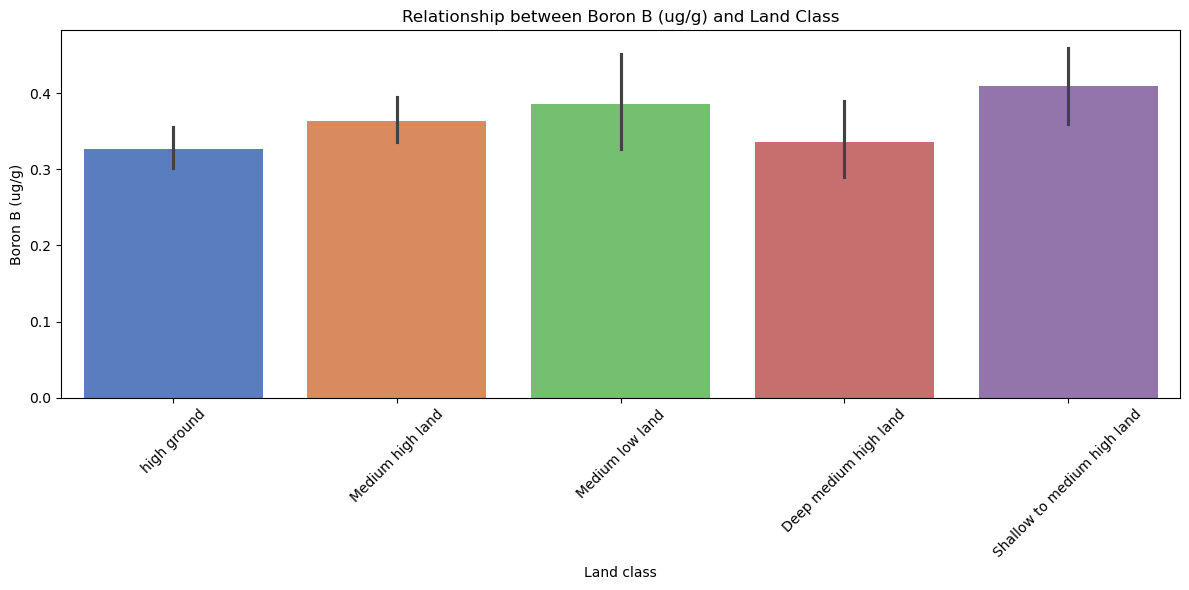

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/461494466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')


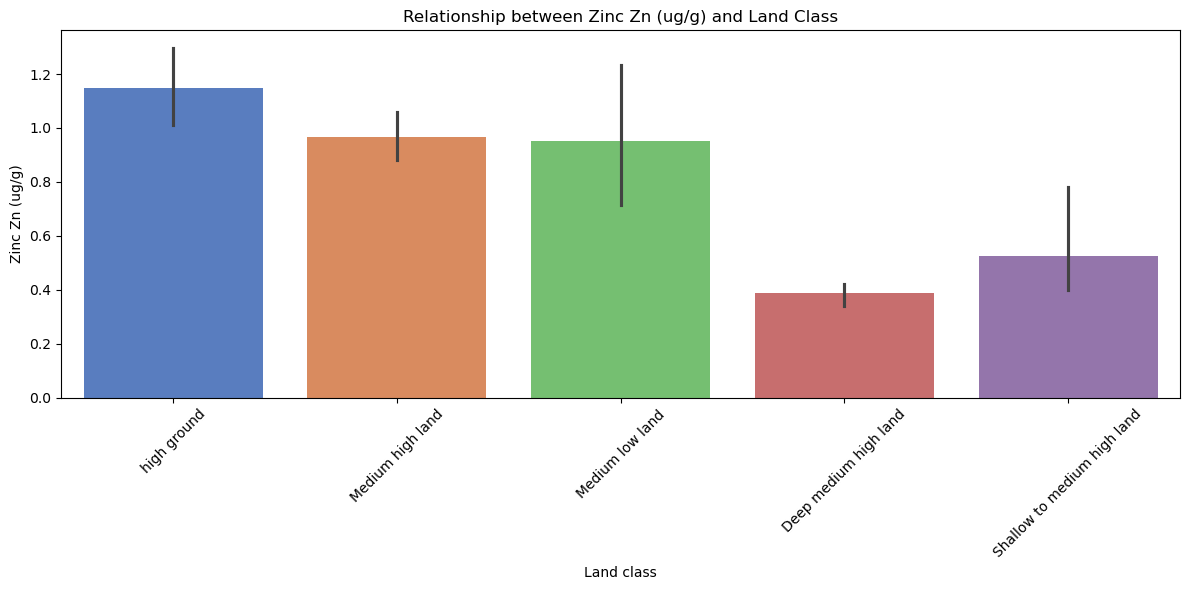

In [69]:
nutrients = ['Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']
for nutrient in nutrients:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x='Land class', y=nutrient, palette='muted')
    plt.title(f'Relationship between {nutrient} and Land Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

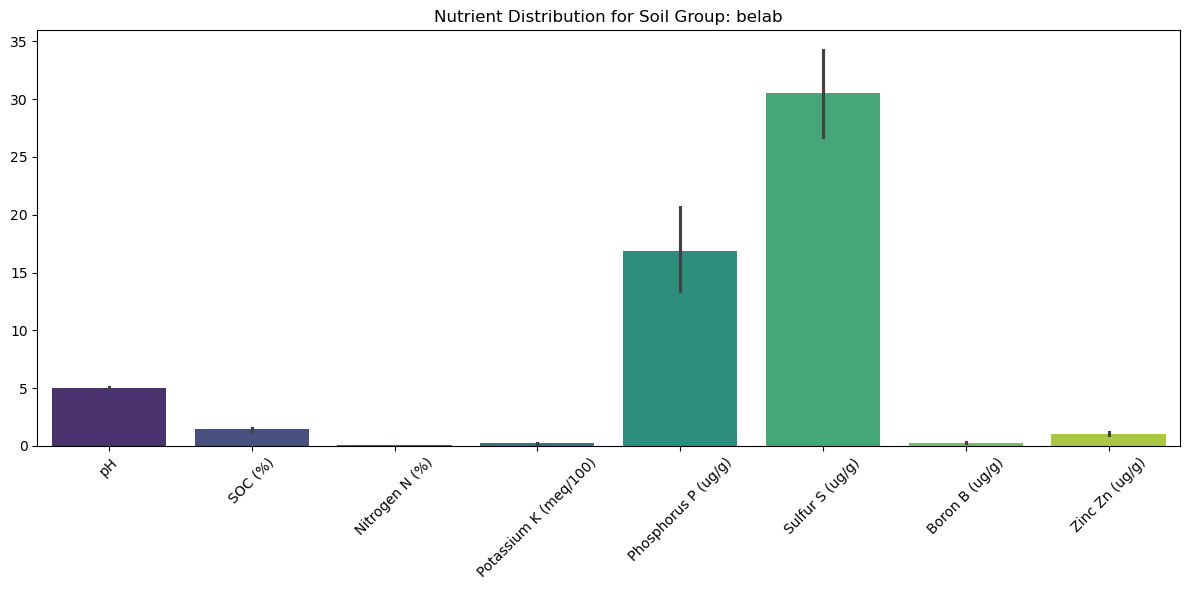

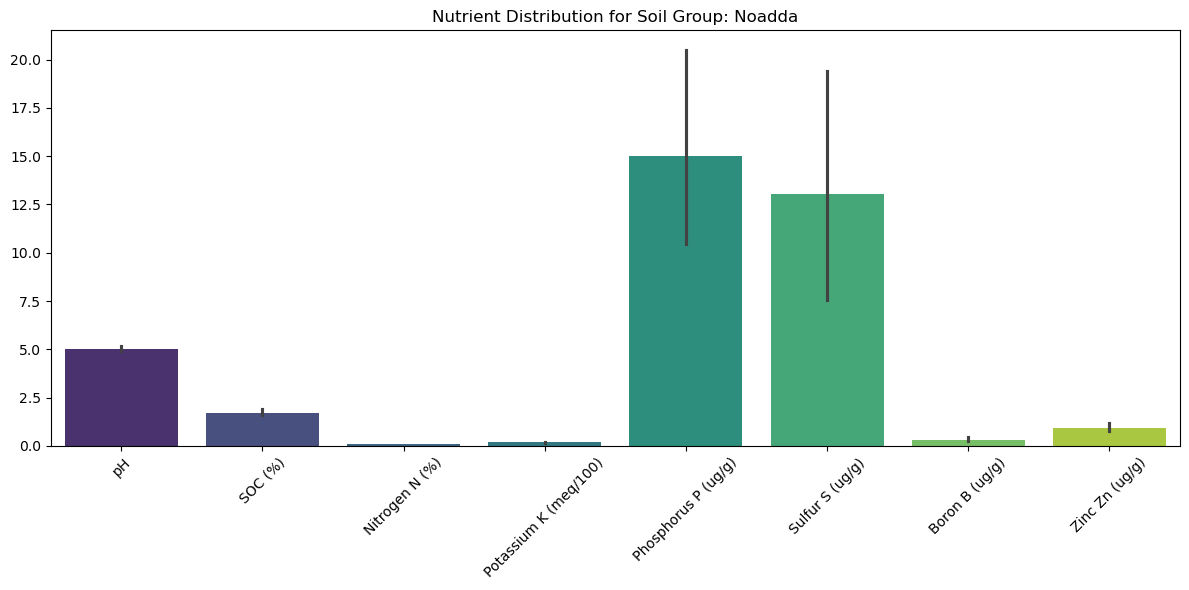

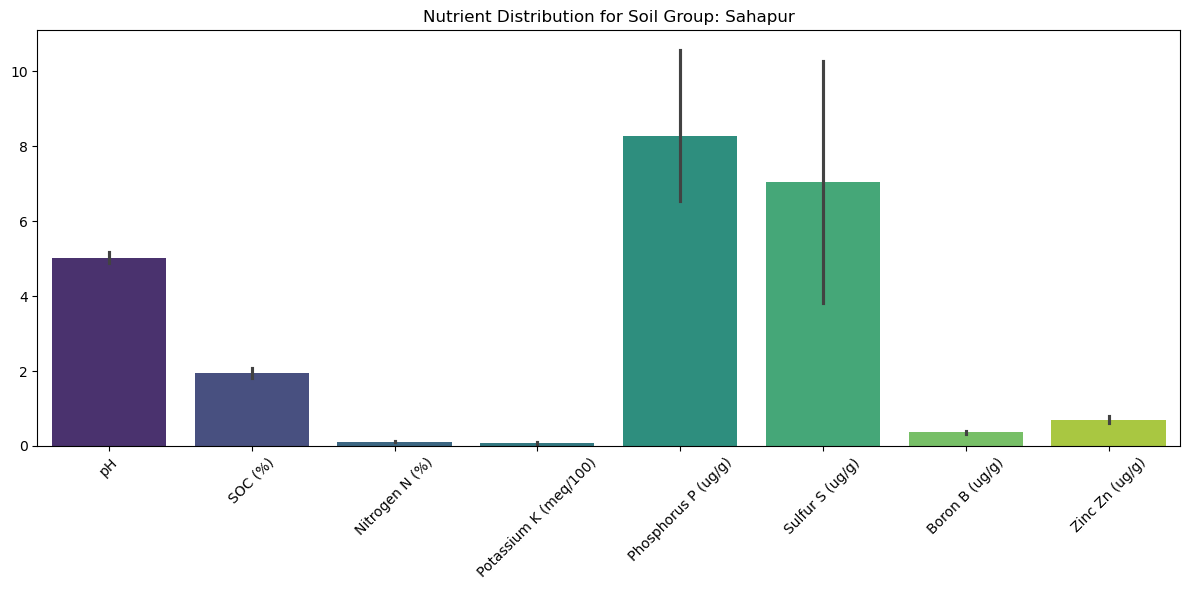

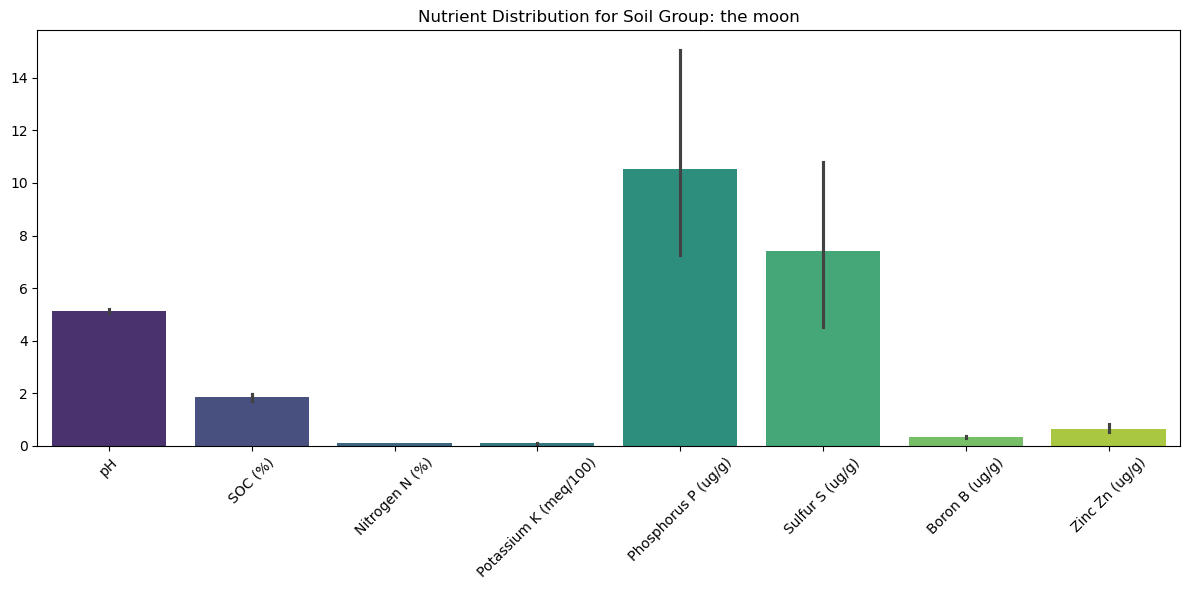

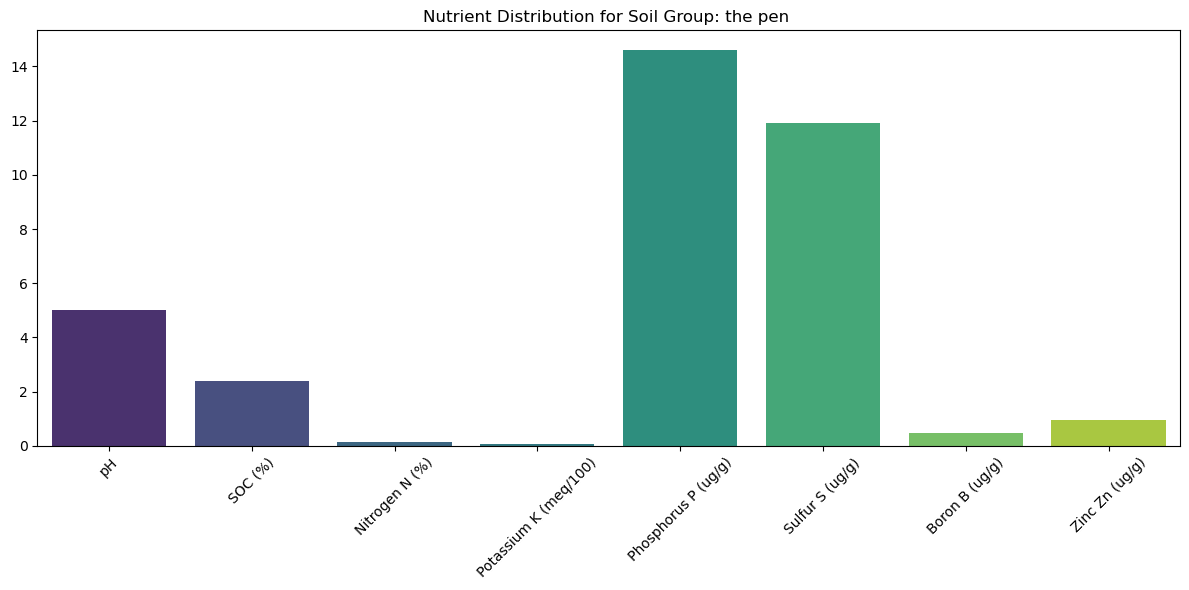

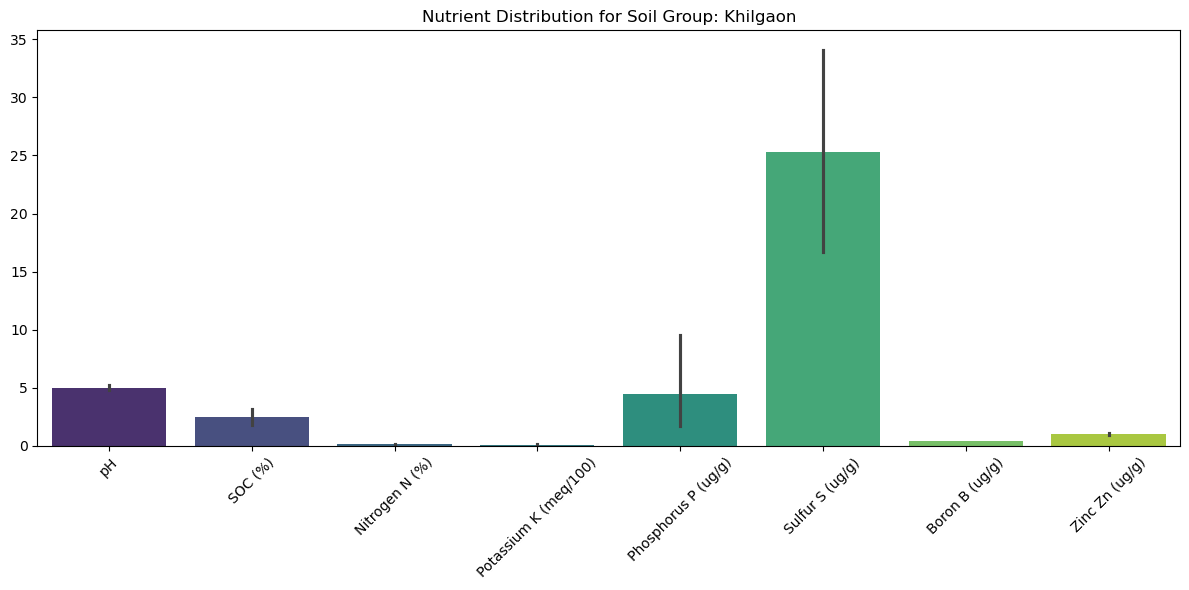

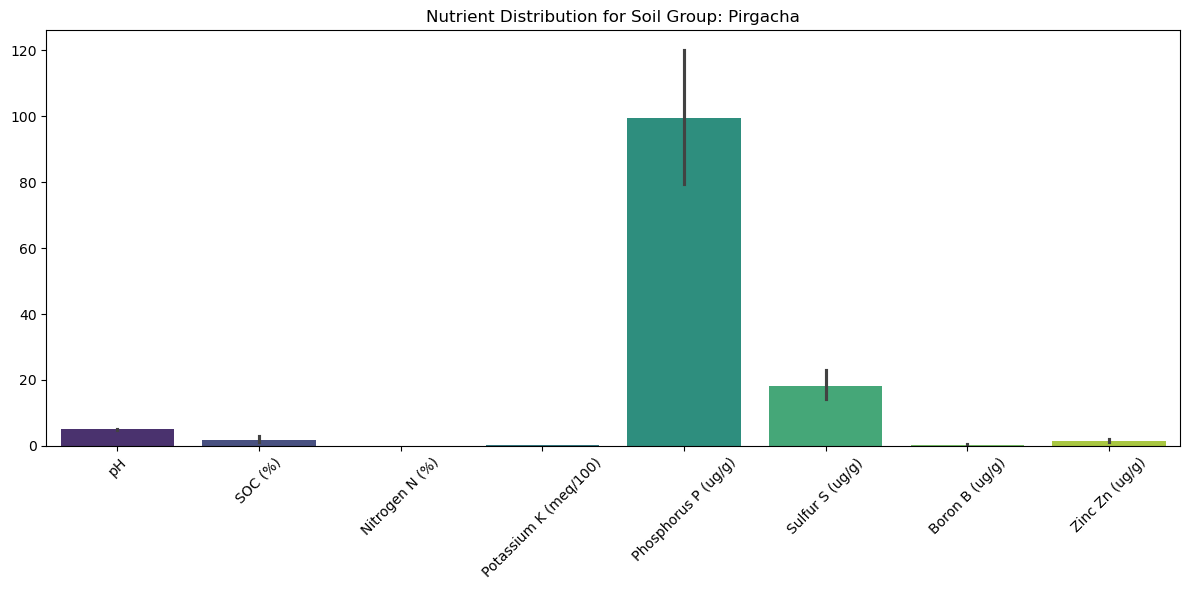

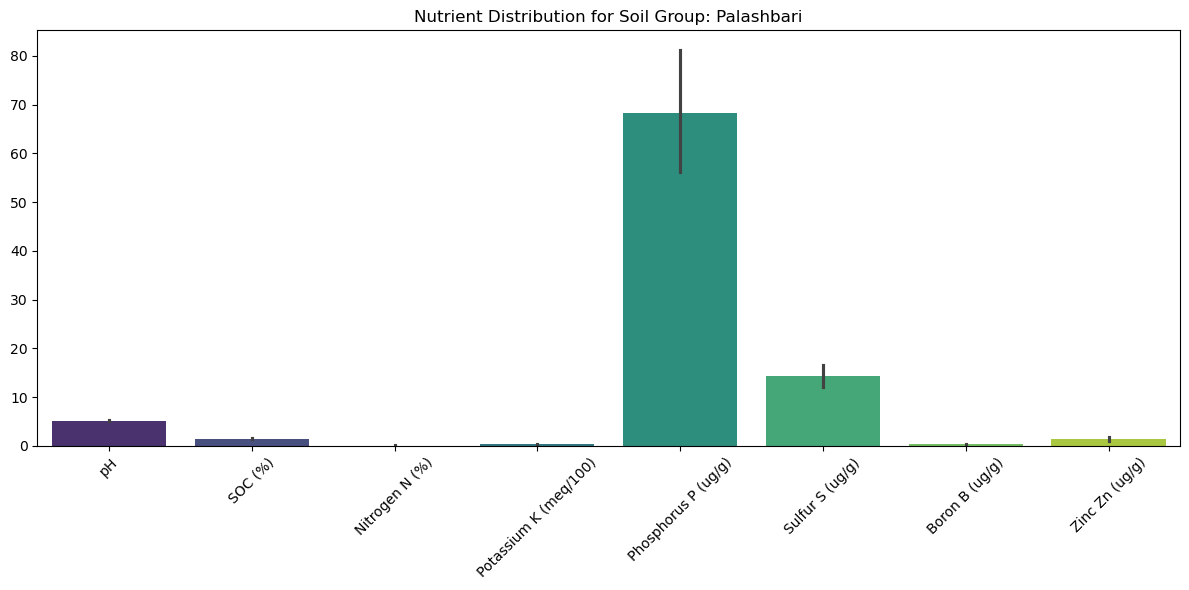

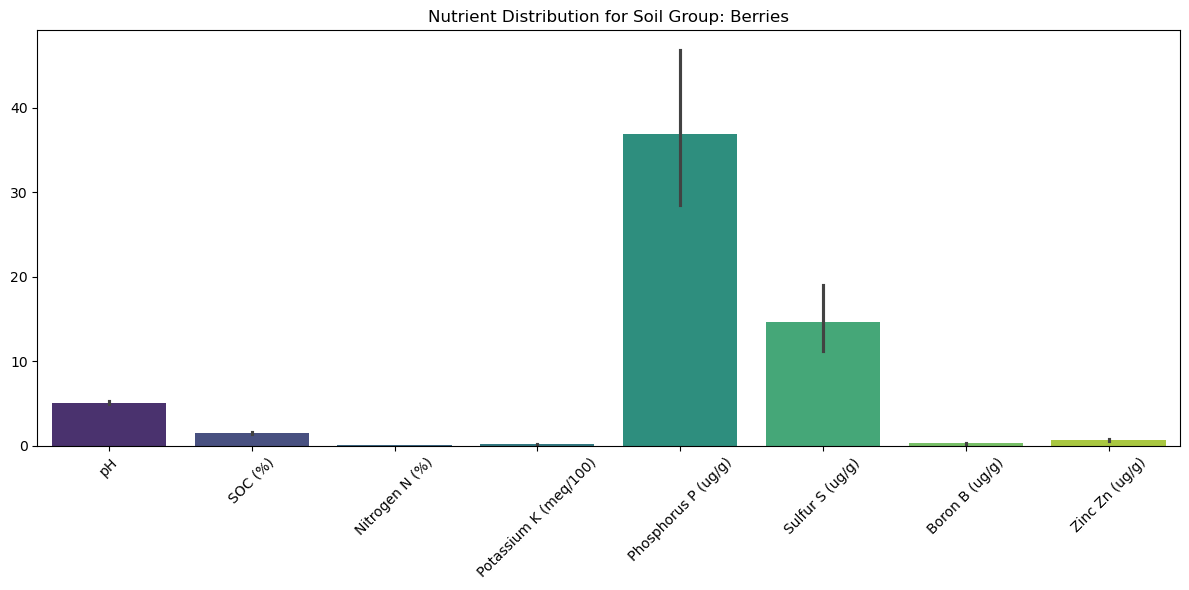

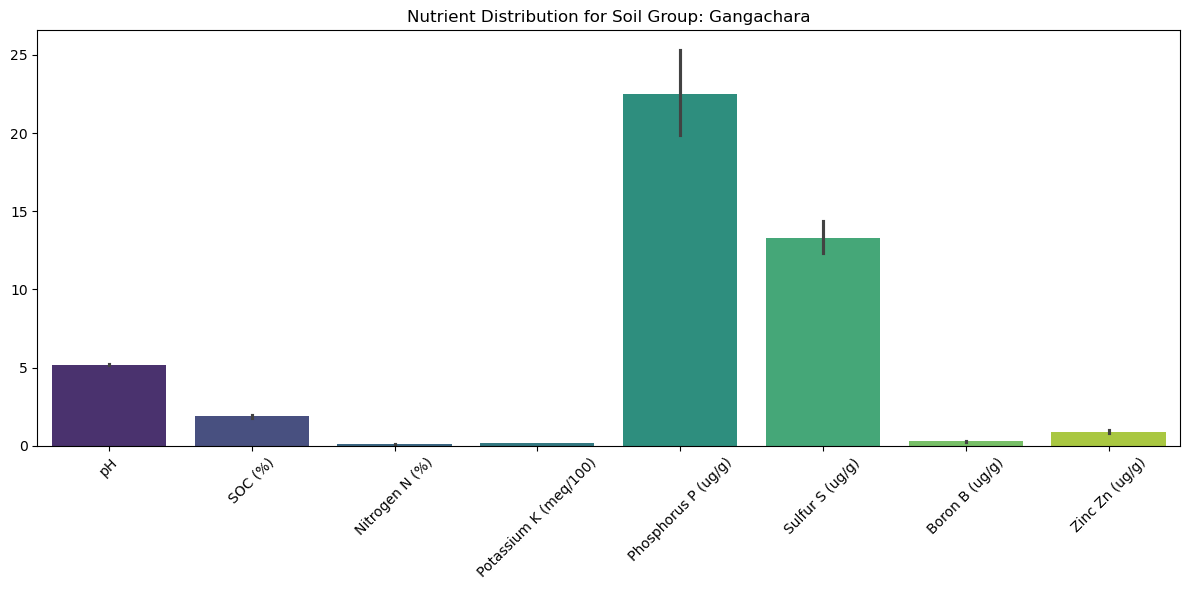

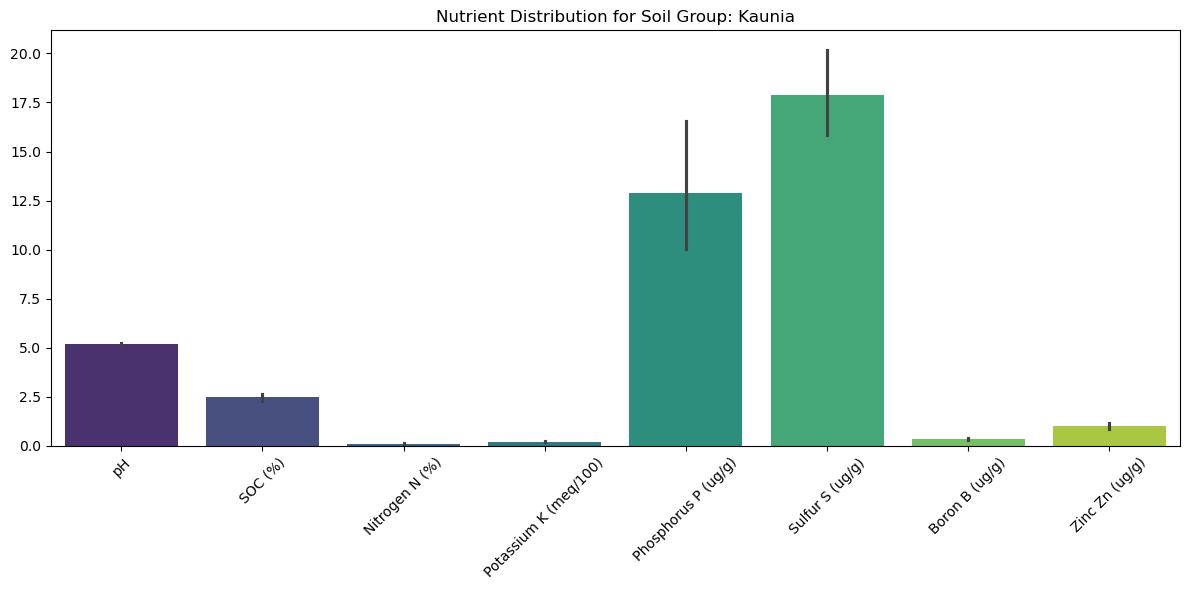

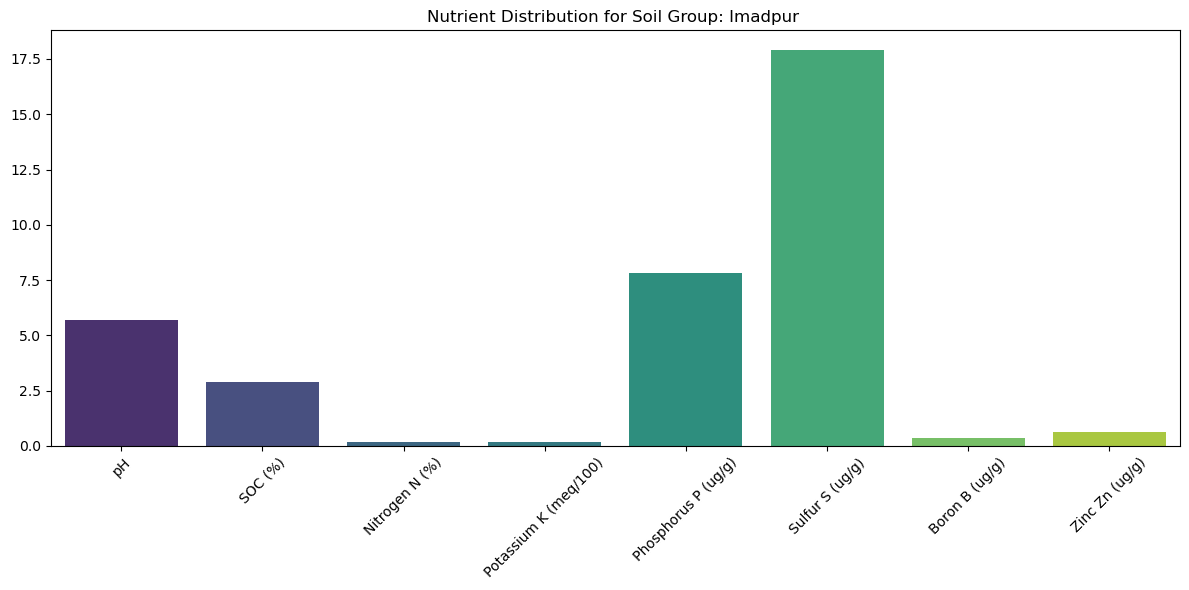

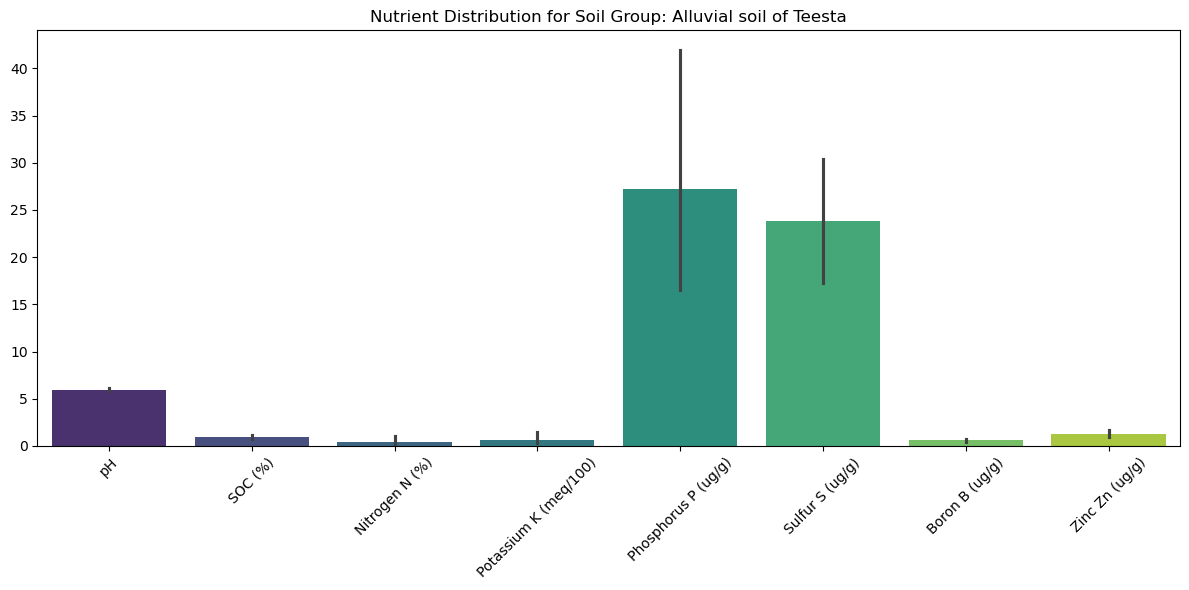

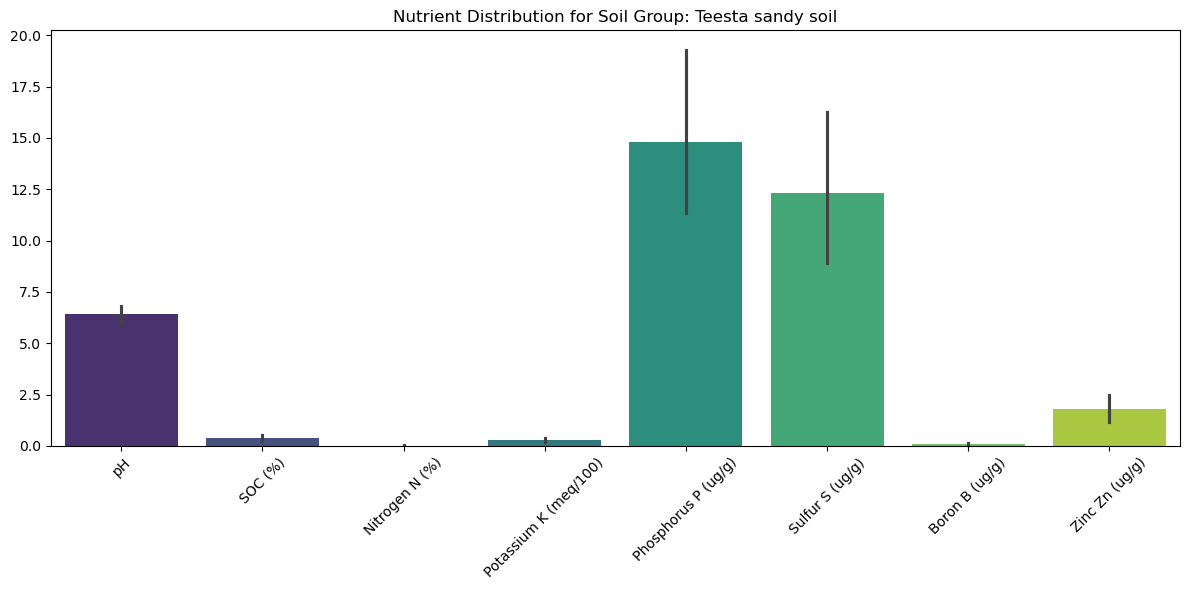

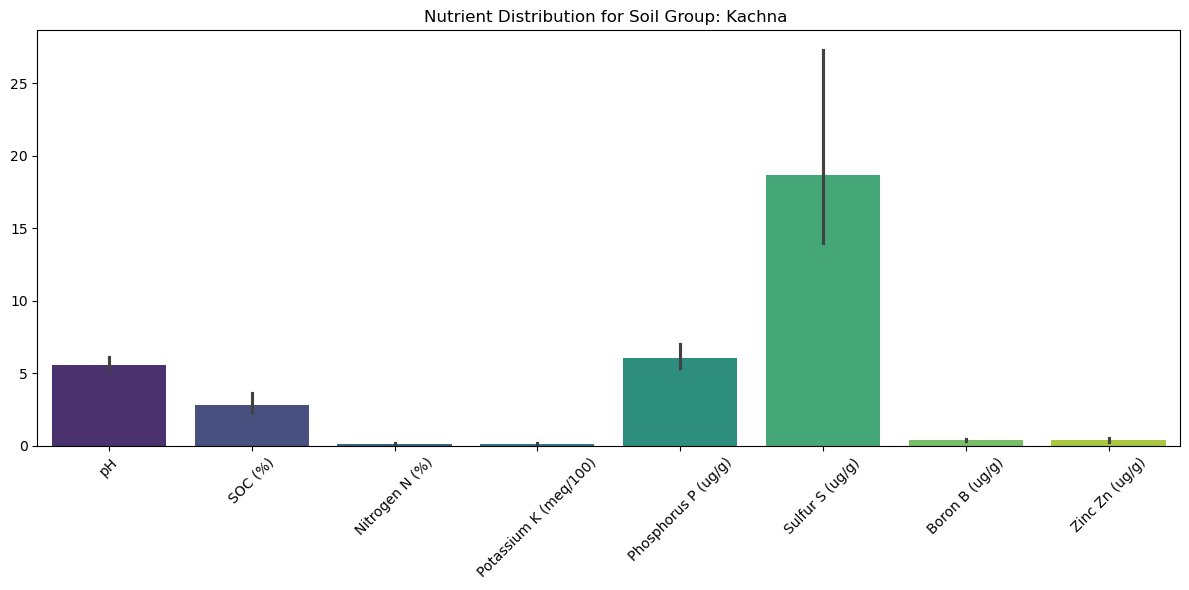

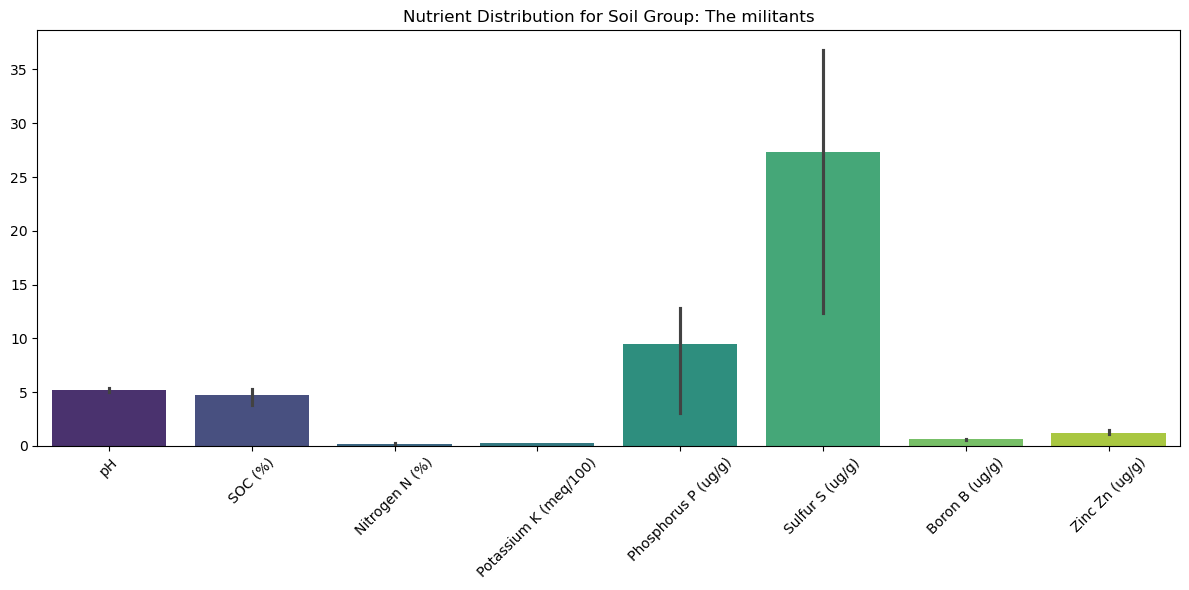

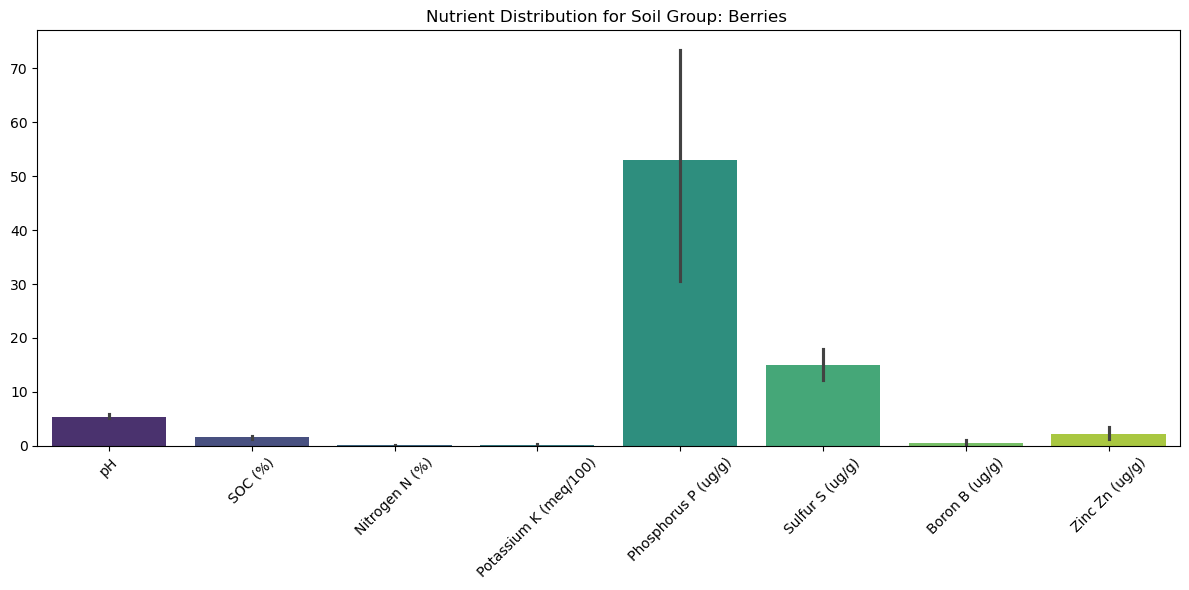

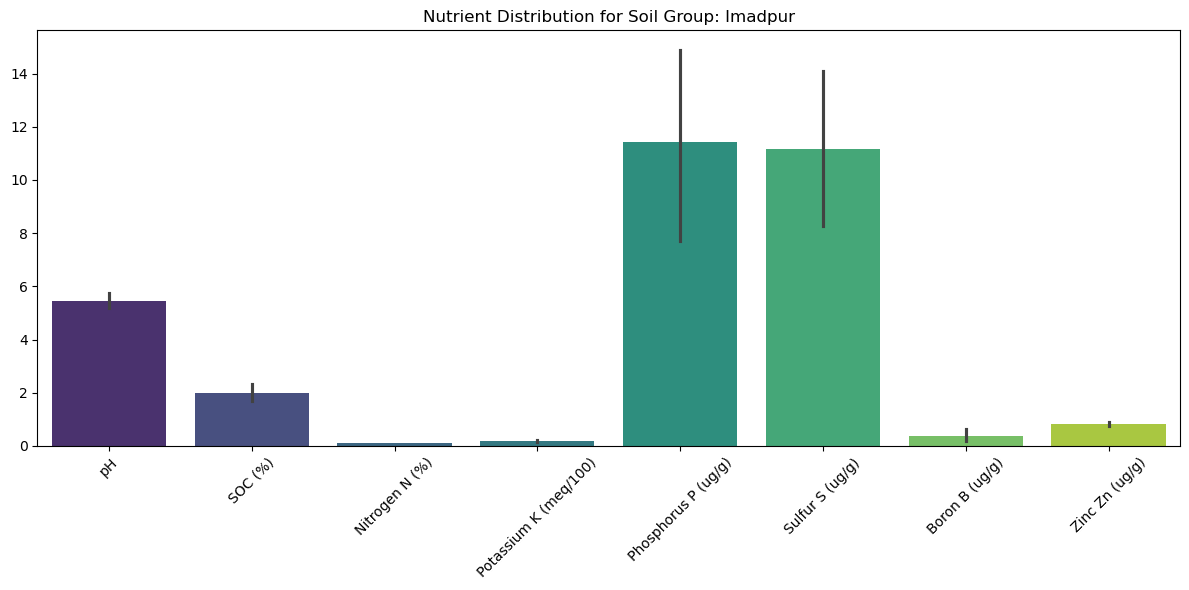

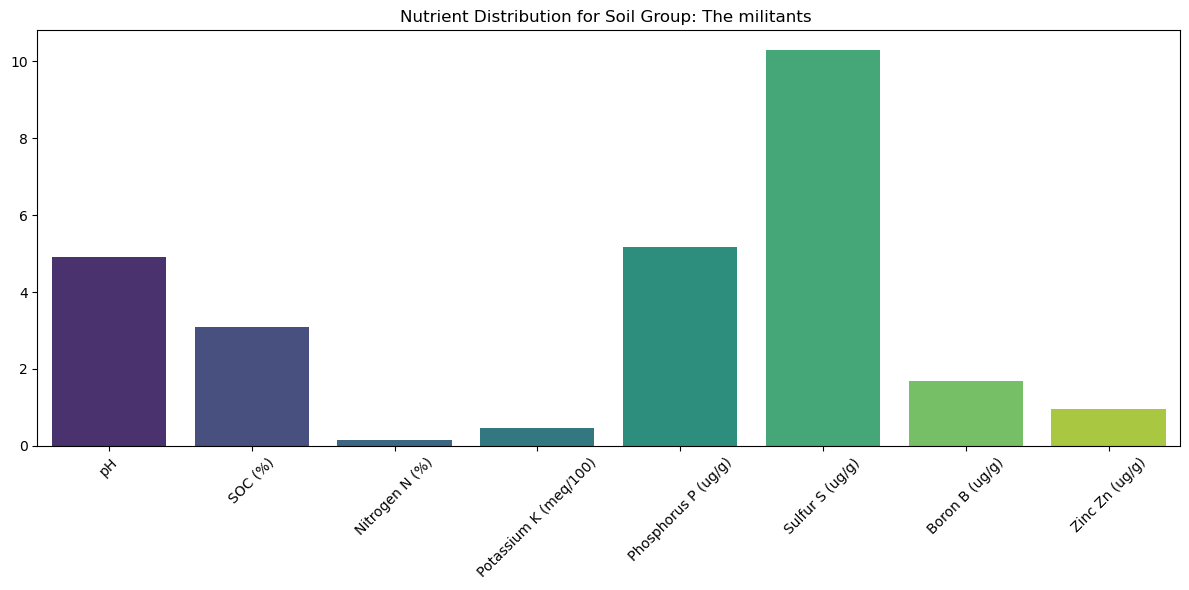

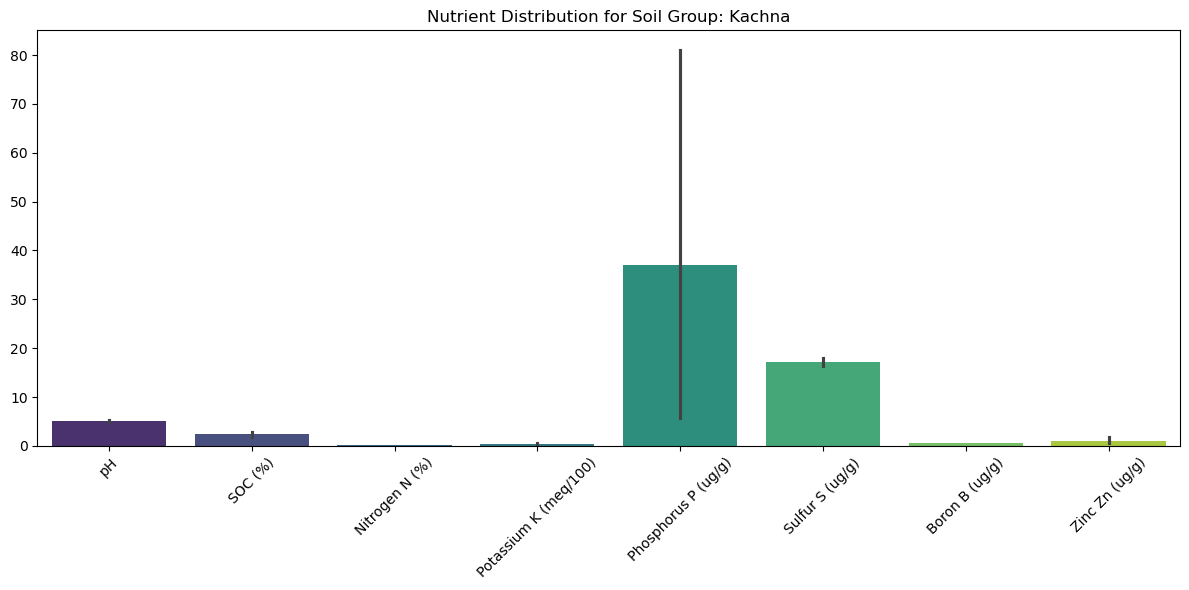

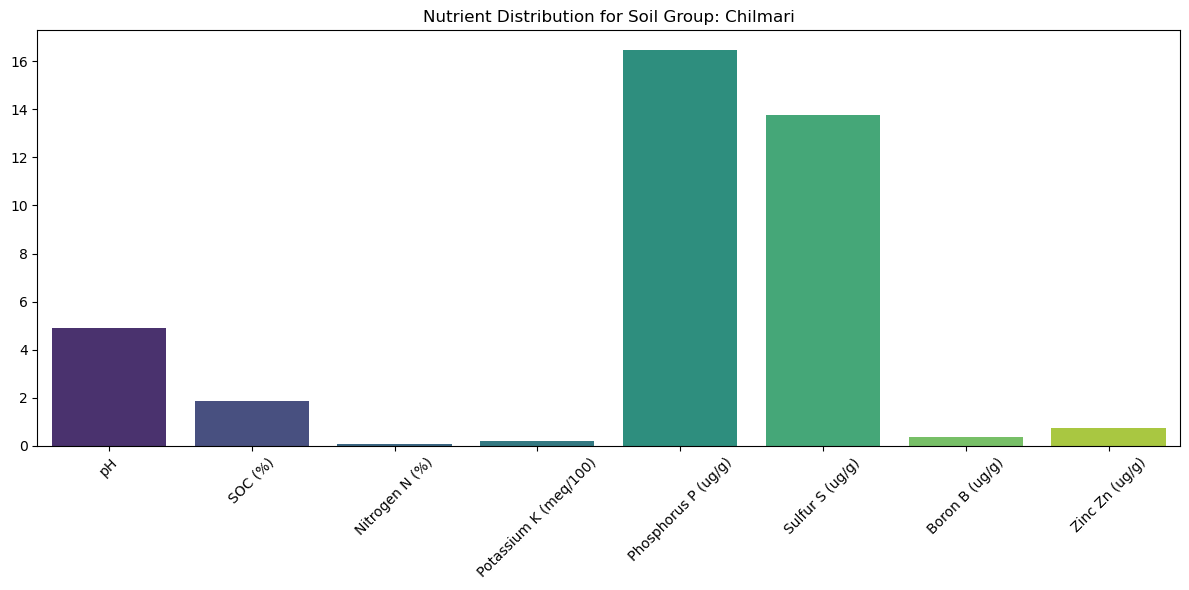

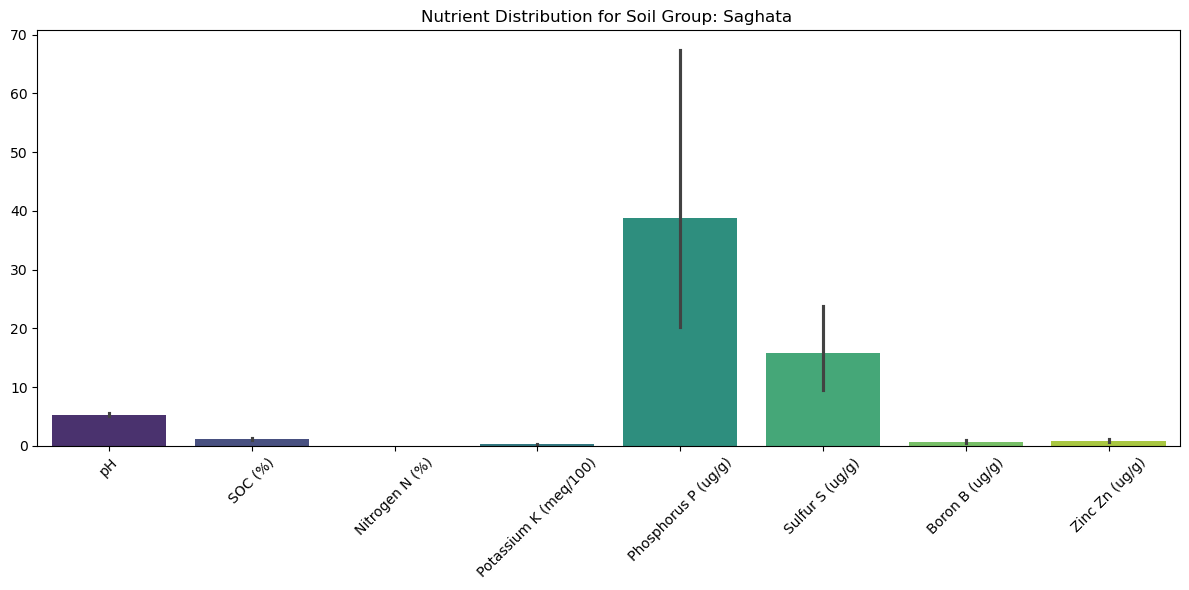

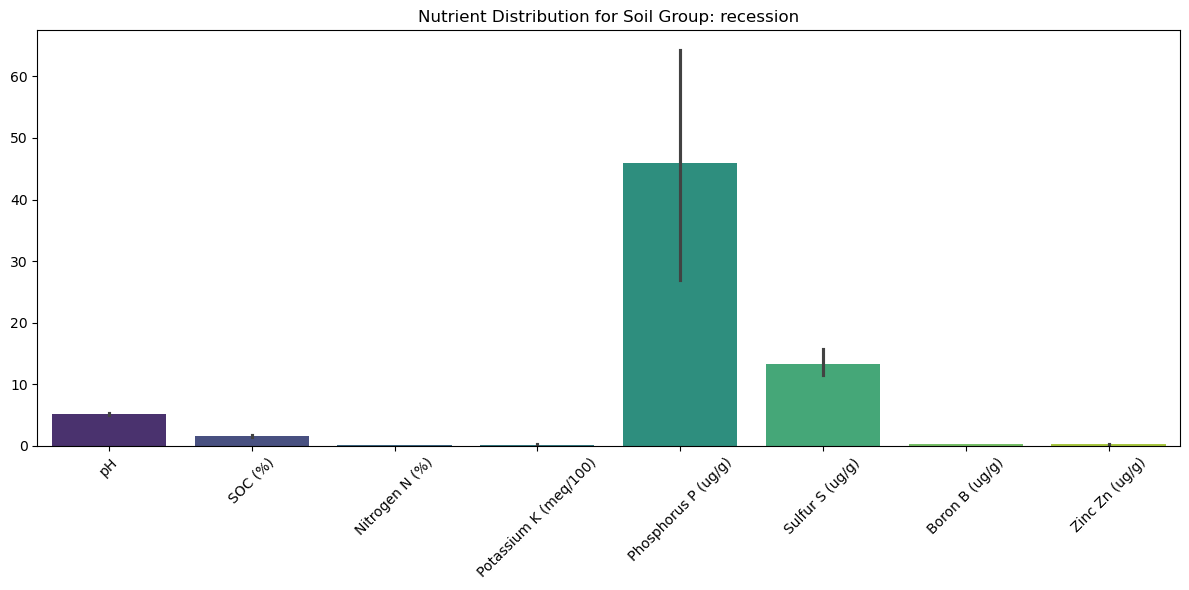

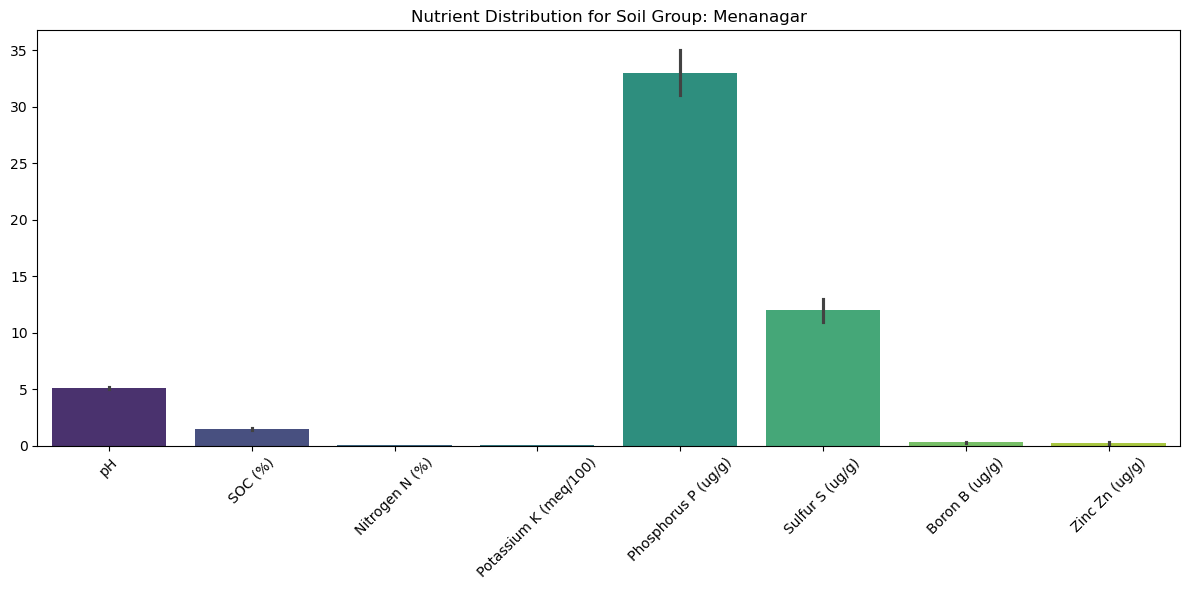

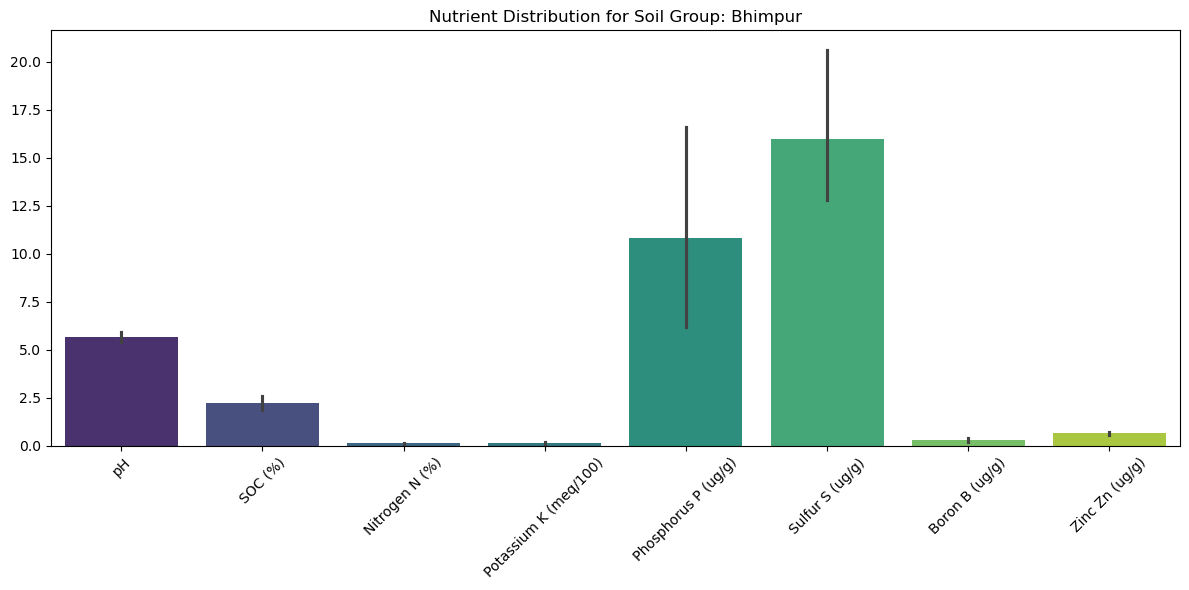

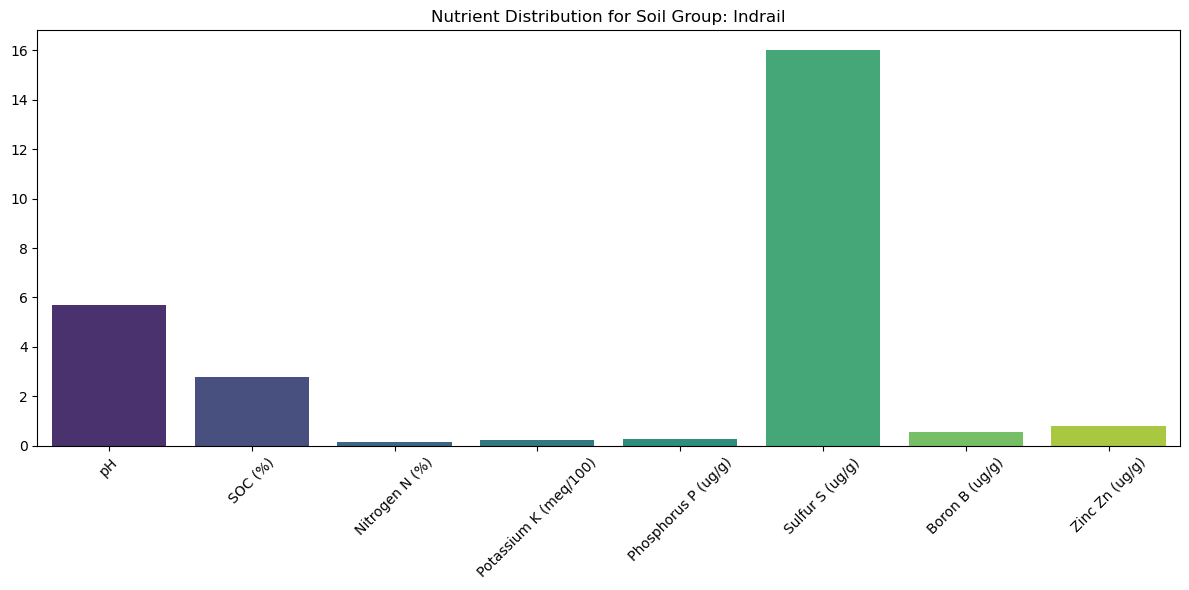

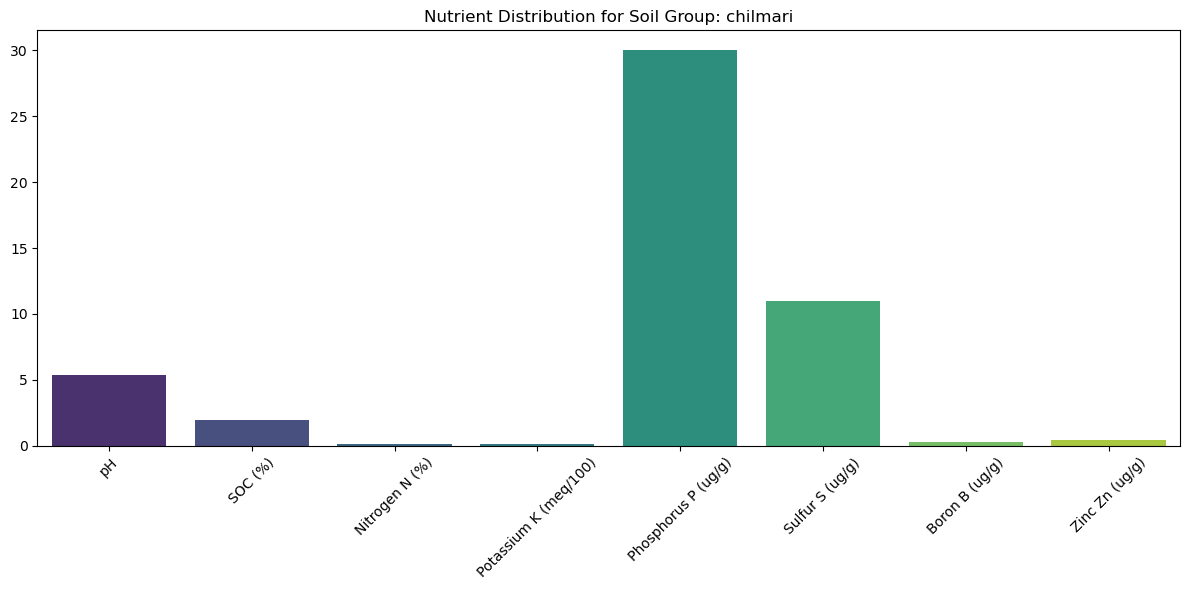

In [71]:
soil_groups = df['soil group'].unique()
for soil in soil_groups:
    soil_data = df[df['soil group'] == soil]
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=soil_data[numerical_features], palette='viridis')
    plt.title(f'Nutrient Distribution for Soil Group: {soil}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


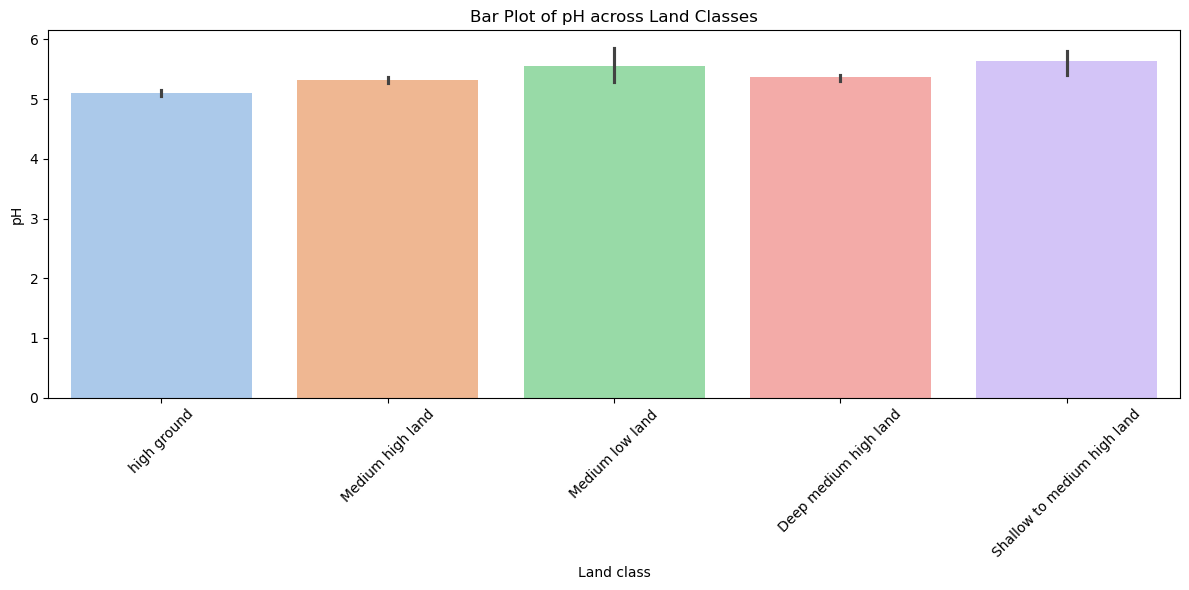

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


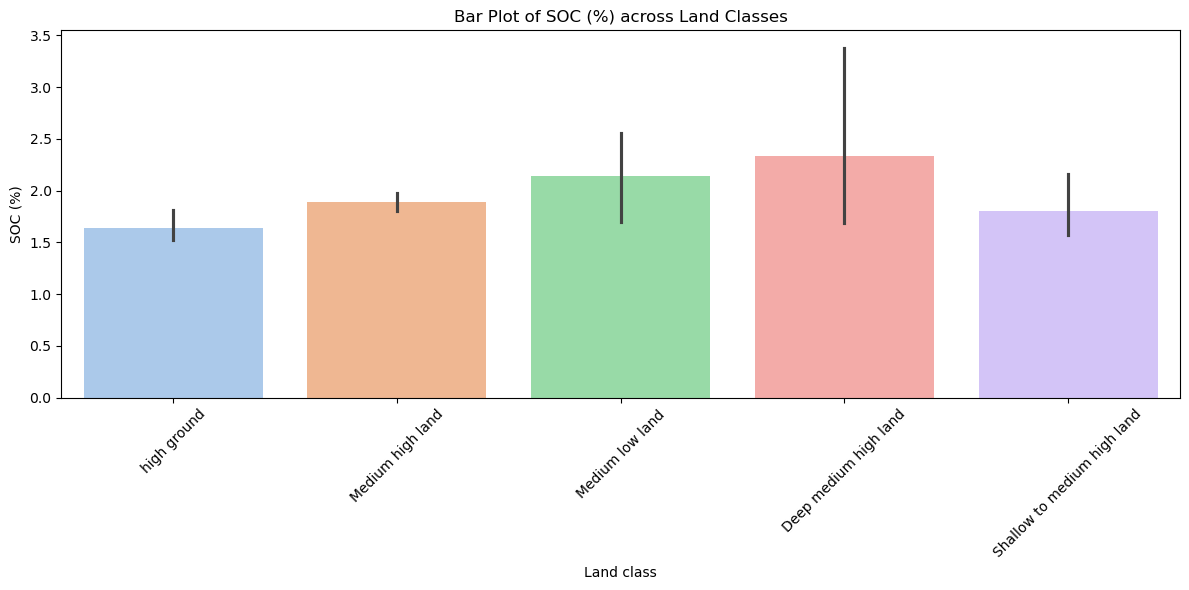

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


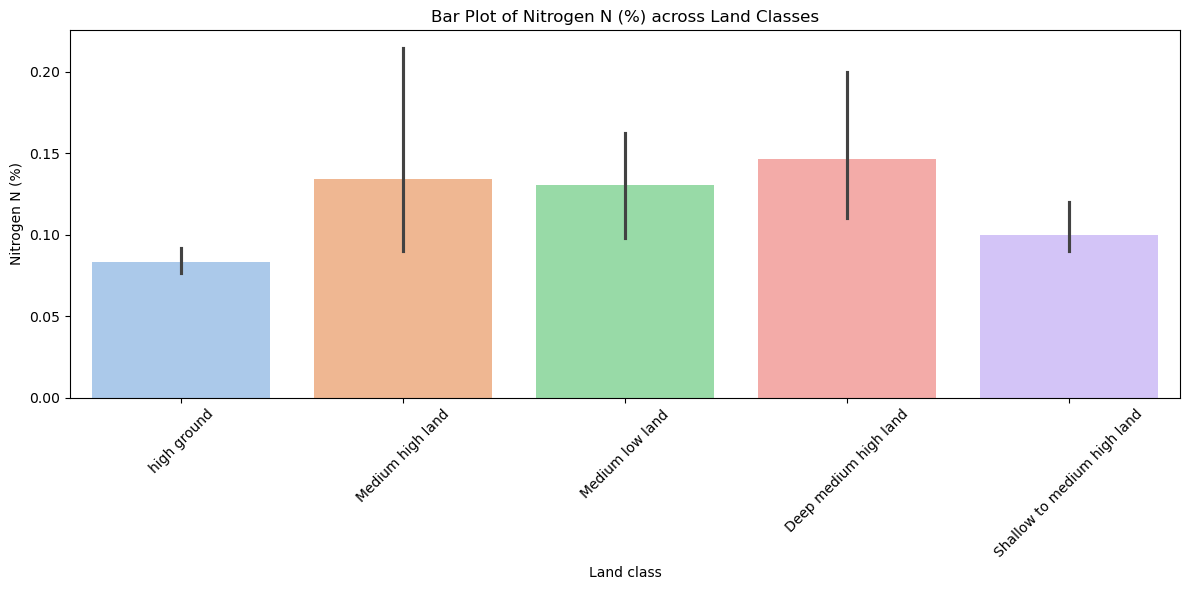

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


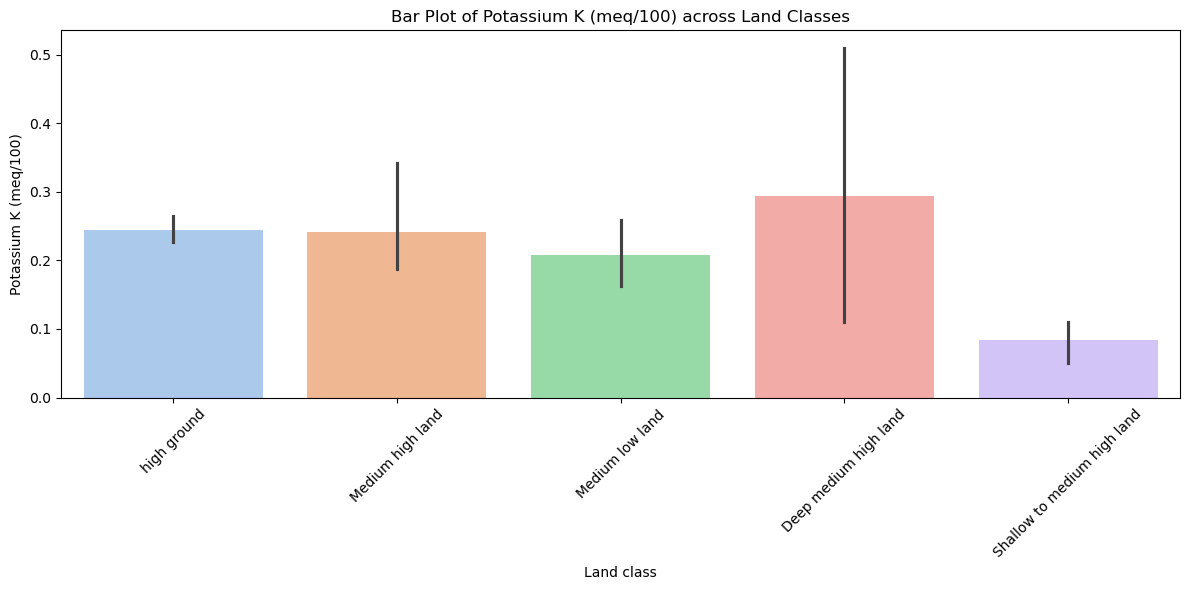

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


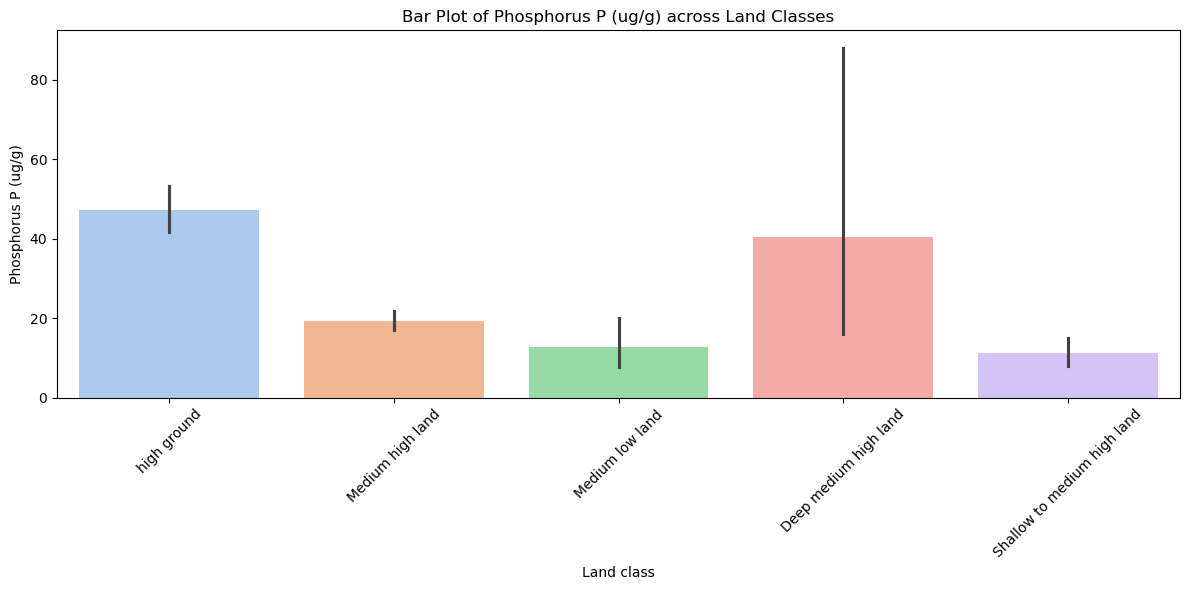

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


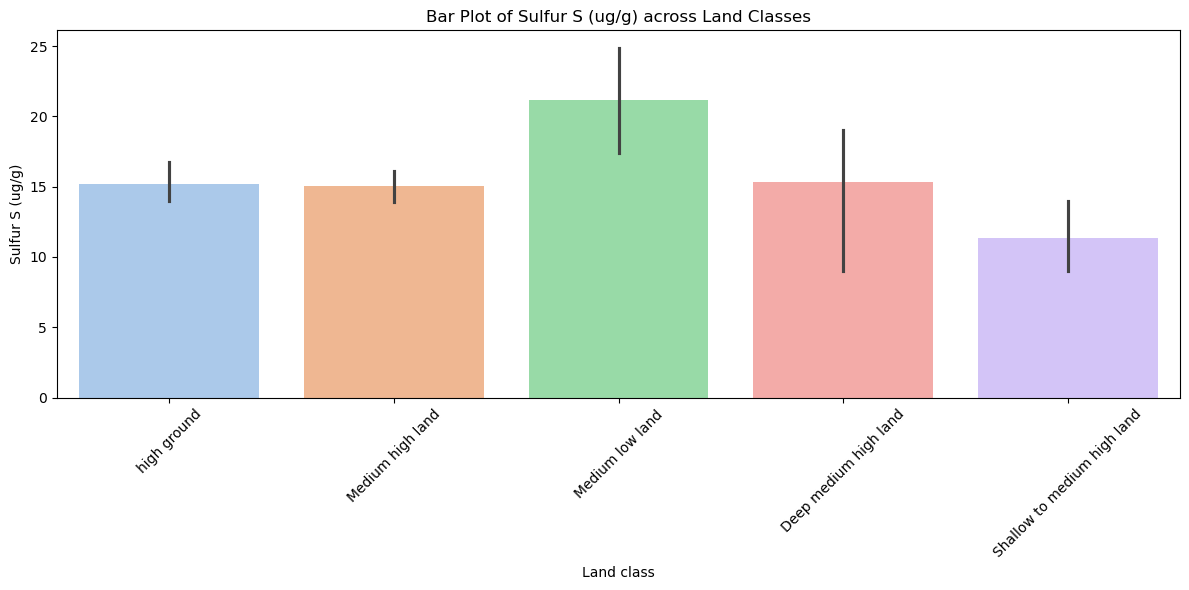

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


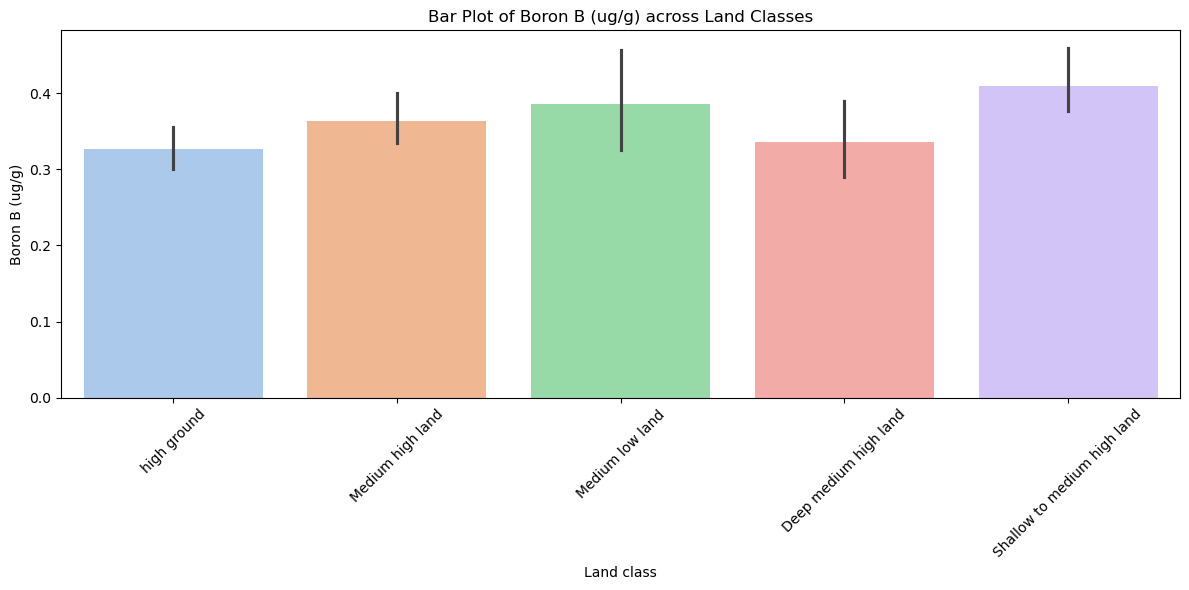

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_14591/1022459213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')


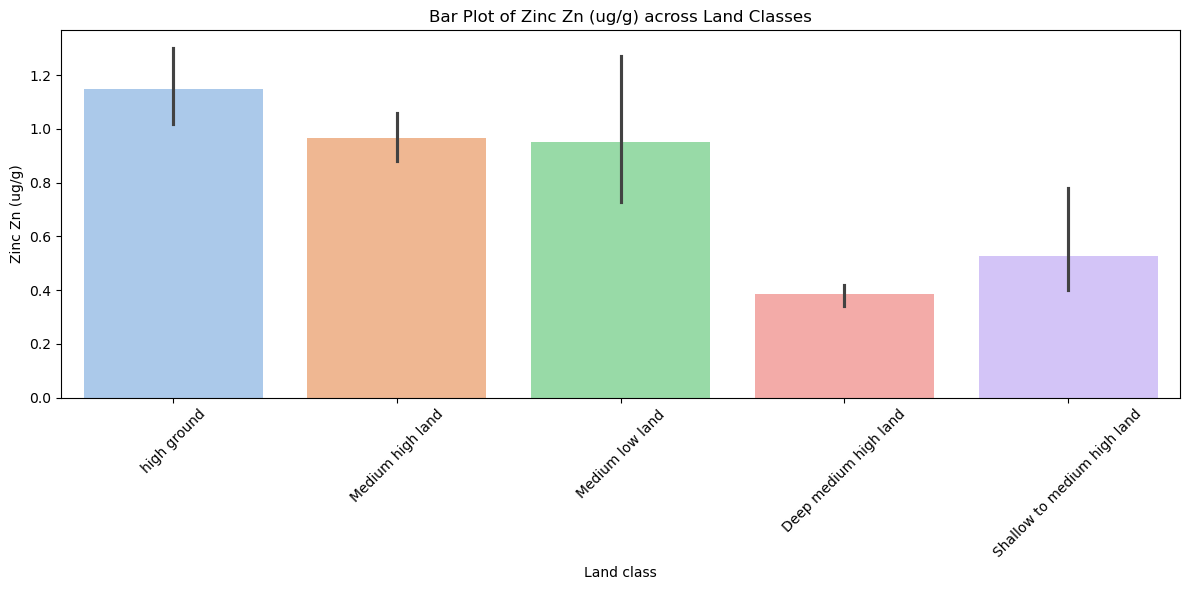

In [83]:
for num_feature in numerical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Land class', y=num_feature, data=df, palette='pastel')
    plt.title(f'Bar Plot of {num_feature} across Land Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

pH Levels
The pH values across areas range between 4.5 to 6.85, which suggests that most of these soils are slightly acidic to neutral. The neutral pH range (close to 7) is good for general agriculture, but the lower pH values indicate the need for soil treatments like liming in some areas.
For example, Taraganj Thana has the highest pH at 6.85, indicating a more neutral soil condition, while areas like Pirgacha have the lowest pH values around 4.55, suggesting more acidic soils.

The SOC values vary significantly across different areas and soil groups. It ranges from 0.271% (in Teesta sandy soil) to 6.24% (in Pirgacha).
Higher SOC content like that found in Pirgacha (6.24%) and The militants (4.72%) is generally favorable for maintaining soil fertility as it indicates a higher presence of decomposed organic material.
Lower SOC, such as in Teesta sandy soil and Alluvial soil of Teesta (e.g., 0.27%), indicates a low organic content, which may require the addition of organic matter to improve soil quality.

Nitrogen content also shows variability, with values ranging from 0.002% (in areas like Gangachara) to 0.21% (in The militants).
Higher nitrogen levels in certain areas such as The militants (0.21%) indicate good fertility, supporting the growth of nitrogen-demanding crops.
In contrast, areas with low nitrogen levels (e.g., Gangachara) might need additional nitrogen fertilization for optimal plant growth.


Potassium levels are reported in meq/100, varying from 0.07 (in the pen) to 1.33 (in Pirgacha, Alluvial soil of Teesta).
Potassium is critical for root development and drought tolerance. Areas like Pirgacha with higher potassium levels can support crops with greater resilience, whereas low levels in places like Teesta sandy soil might need potassium supplements.

Phosphorus values are ranging from 4.44 ug/g (in Khilgaon) to 147.85 ug/g (in Pirgacha).
Areas like Pirgacha with very high phosphorus levels indicate rich fertility, supporting vigorous root growth. However, excess phosphorus could lead to imbalances in micronutrient uptake.
Areas like Khilgaon might require phosphorus fertilization to reach optimal levels for crop growth.

Sulfur (S) Levels
Sulfur levels vary between 6.27 ug/g (in the moon) and 116.34 ug/g (in Palashbari).
High sulfur levels, like in Palashbari, are necessary for protein synthesis, whereas low sulfur in soil groups like the moon might necessitate sulfur-rich fertilizers.

Boron (B) and Zinc (Zn)
Boron content ranges from 0.04 ug/g (in Teesta sandy soil) to 1.68 ug/g (in The militants). Boron is essential for cell wall formation and seed development. The militants have high boron, indicating good potential for reproductive development of crops, while Teesta sandy soil may need boron fertilization.
Zinc levels range from 0.27 ug/g (in Gangachara) to 3.46 ug/g (in Pirgacha). Zinc is vital for enzyme function, and Pirgacha with higher levels indicates good soil health for supporting enzyme activity.

Area-Specific Soil Profiles
Gangachara shows significant variation in soil characteristics. For example, pH values range between 4.98 and 6.1, indicating variability from moderately acidic to slightly acidic soils. The SOC content also ranges widely, suggesting the need for tailored soil treatment depending on specific locations.
Palashbari displays a wide range of phosphorus values from 56.34 ug/g to 116.34 ug/g, indicating high fertility potential but possibly also a risk of phosphorus runoff and pollution.
Mithapukur has moderate pH (5.5) and consistent SOC levels (1.13%), suggesting a balanced soil suitable for general cultivation.
Taraganj Thana has the most neutral pH (6.85) with lower SOC (0.48%), indicating potential fertility improvements through organic matter incorporation.




In [75]:
area_summary = df.groupby(['Area', 'soil group'])[numerical_features].mean()
area_summary

pH   SOC (%)  Nitrogen N (%)  \
Area           soil group                                                    
Gangachara     Alluvial soil of Teesta  6.100000  0.560000        0.002611   
               Gangachara               5.371429  1.286429        0.001686   
               Kaunia                   5.925000  1.075000        0.001900   
               Palashbari               5.344444  0.875556        0.002033   
               Pirgacha                 5.200000  1.116667        0.001933   
               Teesta sandy soil        6.528571  0.271429        0.002557   
Kaunia upazila Alluvial soil of Teesta  5.806667  1.477333        0.073333   
               Berries                  5.420000  1.614000        0.084000   
               Chilmari                 4.900000  1.860000        0.090000   
               Gangachara               5.309677  2.138387        0.108387   
               Imadpur                  5.428571  2.097143        0.104286   
               Kachna                   5.100000  2.850000        0.140000   
               Kaunia                   4.985833  2.481667        0.124167   
               Palashbari               5.100000  1.364286        0.068571   
               Pirgacha                 5.250000  1.071667        0.055000   
               Saghata                  5.325000  1.195000        0.061250   
               The militants            4.900000  3.080000        0.150000   
Mithpukur      Alluvial soil of Teesta  5.500000  1.130000        0.070000   
               Berries                  5.353846  1.406231        0.072308   
               Gangachara               5.248684  1.876026        0.110132   
               Imadpur                  5.700000  2.870000        0.160000   
               Kachna                   5.566667  2.790000        0.163333   
               Kaunia                   5.233333  2.682500        0.150833   
               Khilgaon                 5.000000  2.456000        0.134000   
               Noadda                   5.041667  1.720750        0.089167   
               Palashbari               5.319048  1.543333        0.082381   
               Pirgacha                 5.033333  1.396667        0.074667   
               Sahapur                  5.025000  1.936250        0.111250   
               Teesta sandy soil        5.000000  0.960000        0.070000   
               belab                    5.010526  1.390000        0.075789   
               the moon                 5.123529  1.811765        0.104118   
               the pen                  5.000000  2.380000        0.150000   
Pirgacha       Alluvial soil of Teesta  5.866667  0.781667        1.093333   
               Berries                  4.950000  1.676250        0.113750   
               Gangachara               4.983117  2.019740        0.108208   
               Kaunia                   5.028000  2.837600        0.114400   
               Palashbari               4.975000  1.733000        0.093000   
               Pirgacha                 4.550000  6.242500        0.087500   
               The militants            5.166667  4.720000        0.210000   
Taraganj Thana Alluvial soil of Teesta  6.850000  0.485000        0.020000   
               Berries                  5.018182  1.504545        0.079091   
               Bhimpur                  5.680000  2.226000        0.126000   
               Gangachara               5.280769  1.828462        0.103462   
               Imadpur                  5.500000  1.832500        0.117500   
               Indrail                  5.700000  2.790000        0.160000   
               Kachna                   5.150000  2.180000        0.135000   
               Kaunia                   5.370000  1.833000        0.129000   
               Menanagar                5.100000  1.505000        0.095000   
               Noadda                   5.000000  1.713333        0.093333   
               Palashbari               4.844444  1.547778        0.

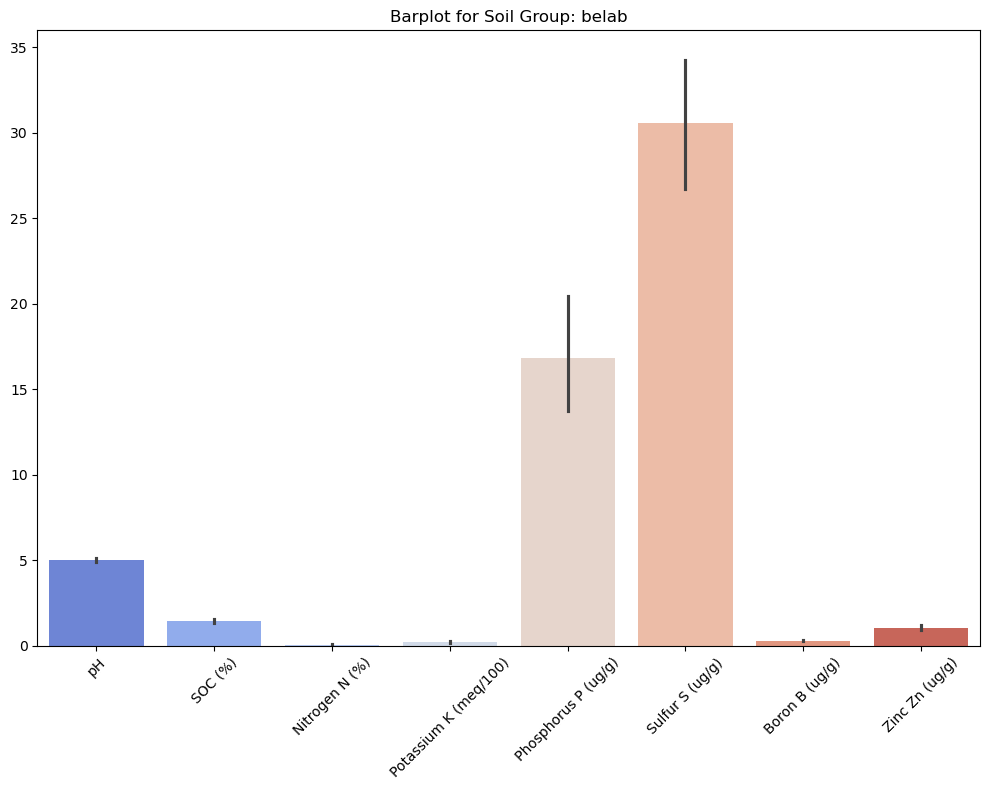

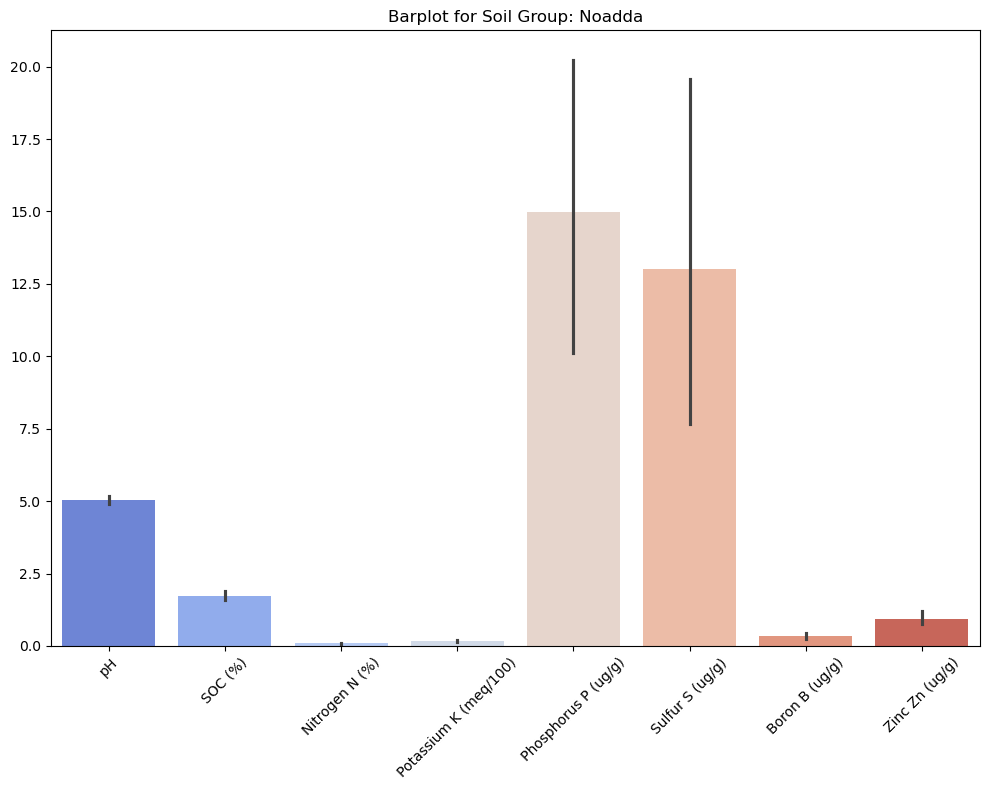

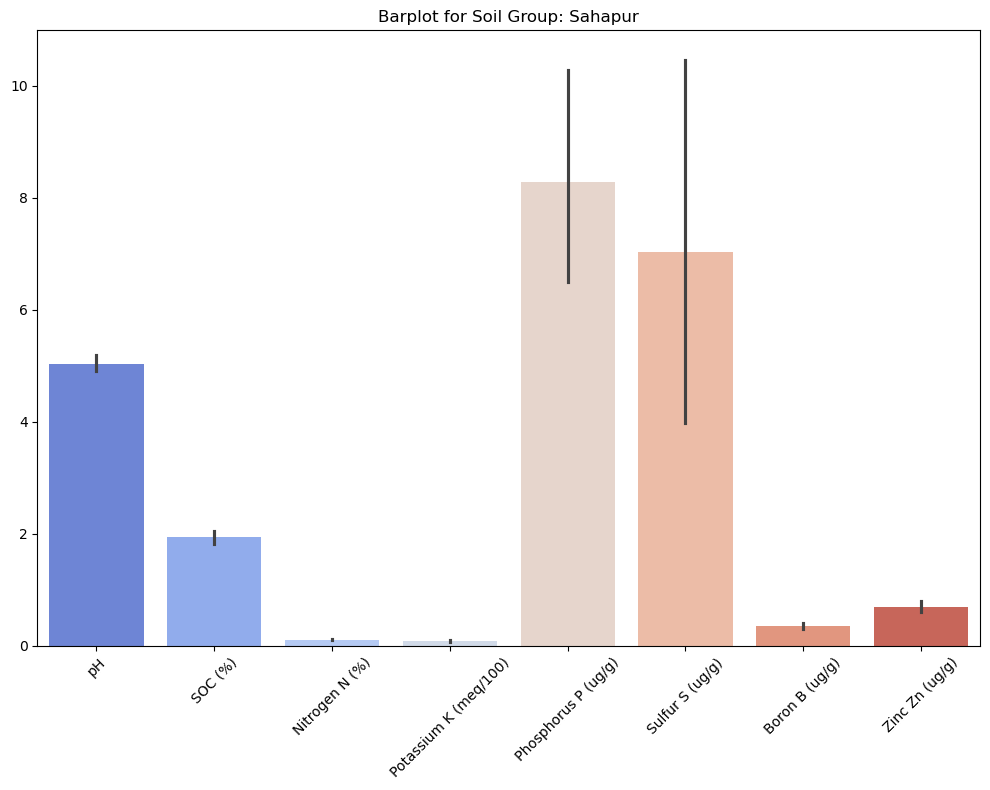

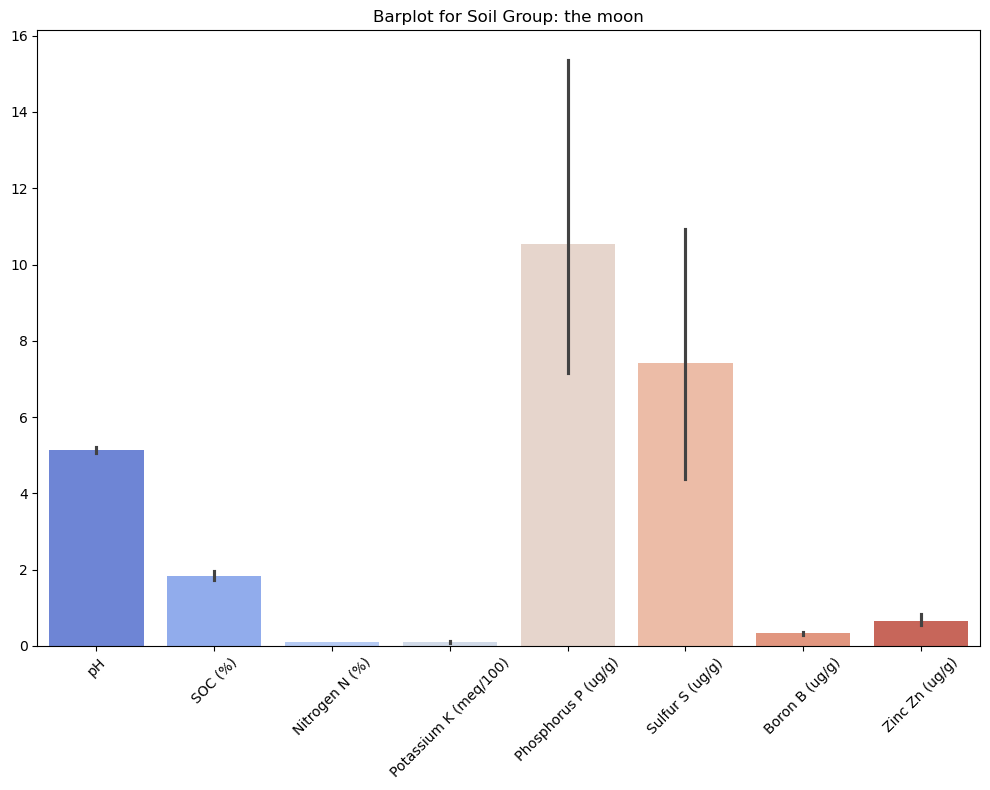

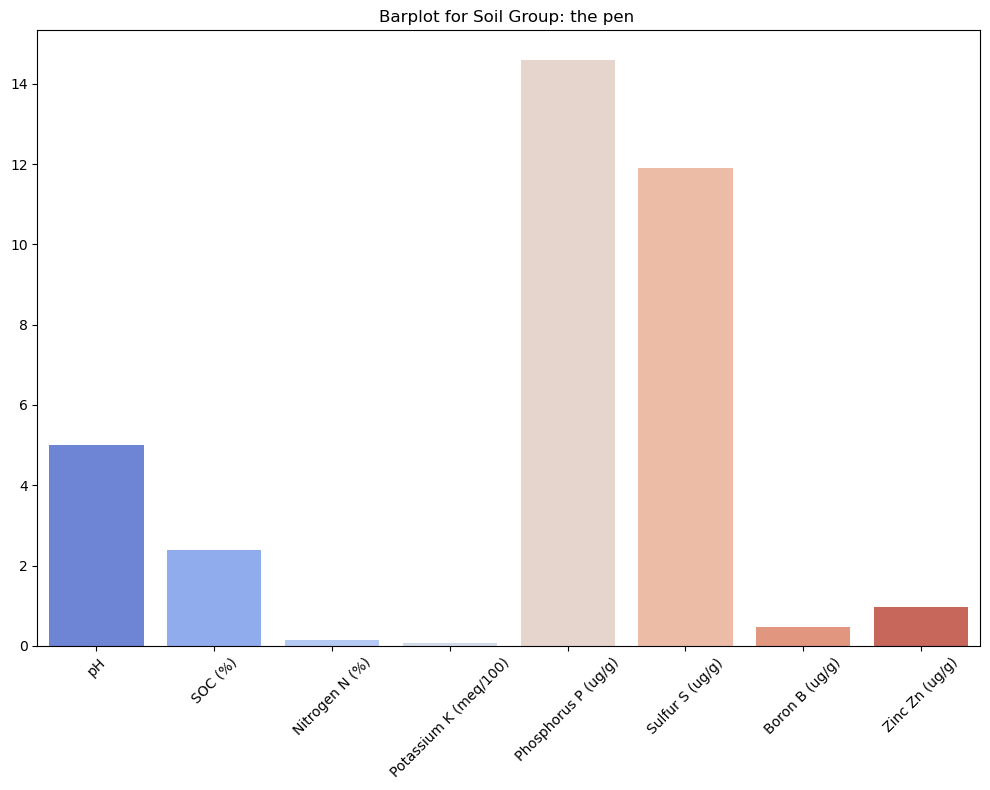

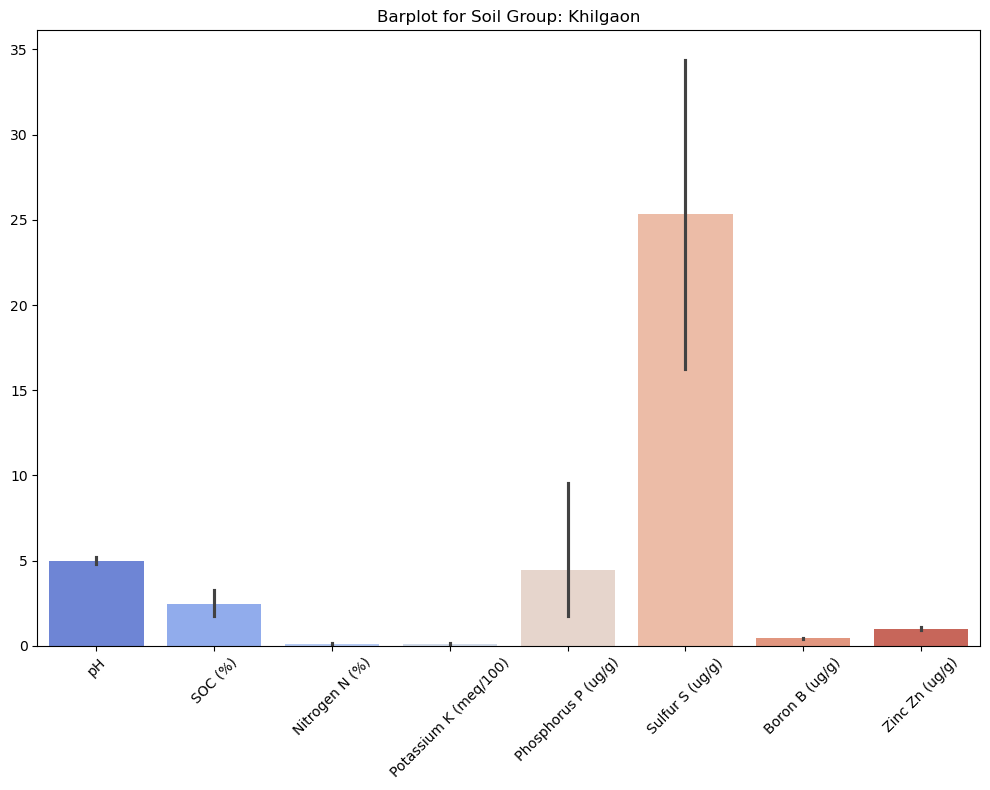

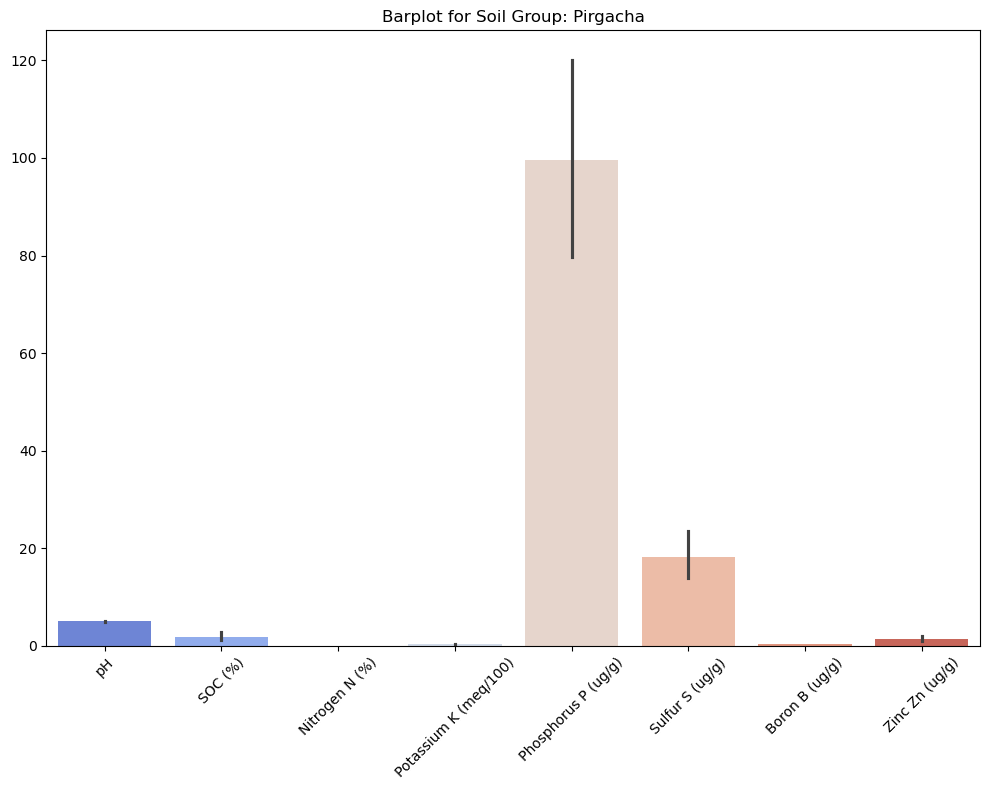

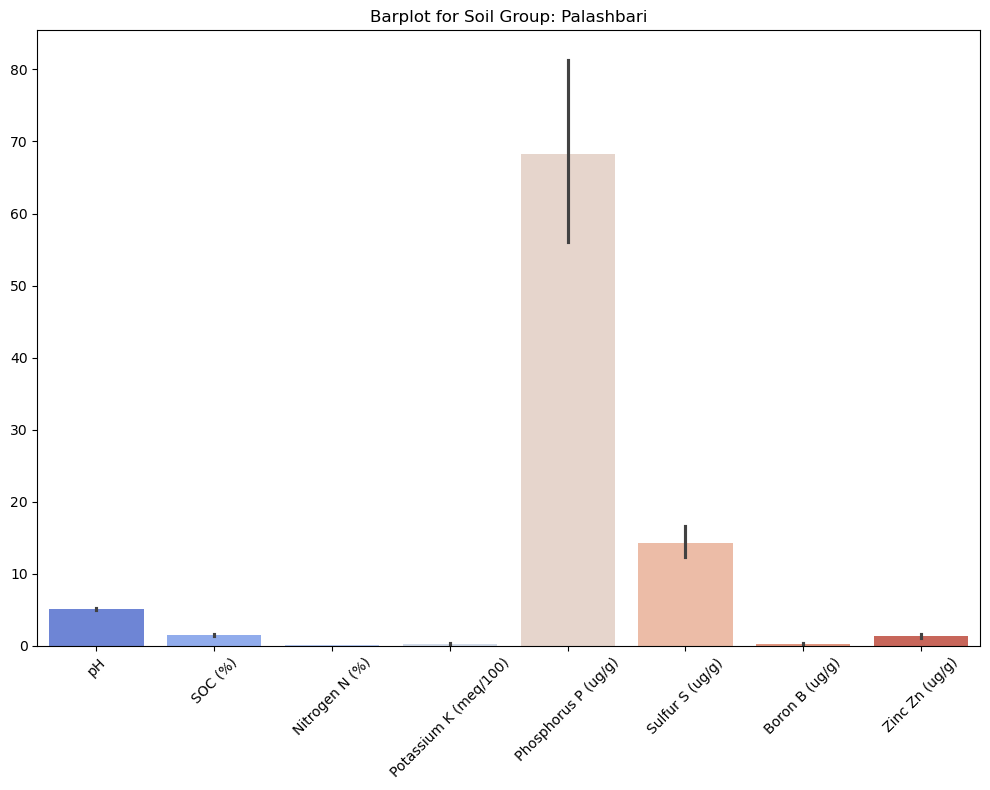

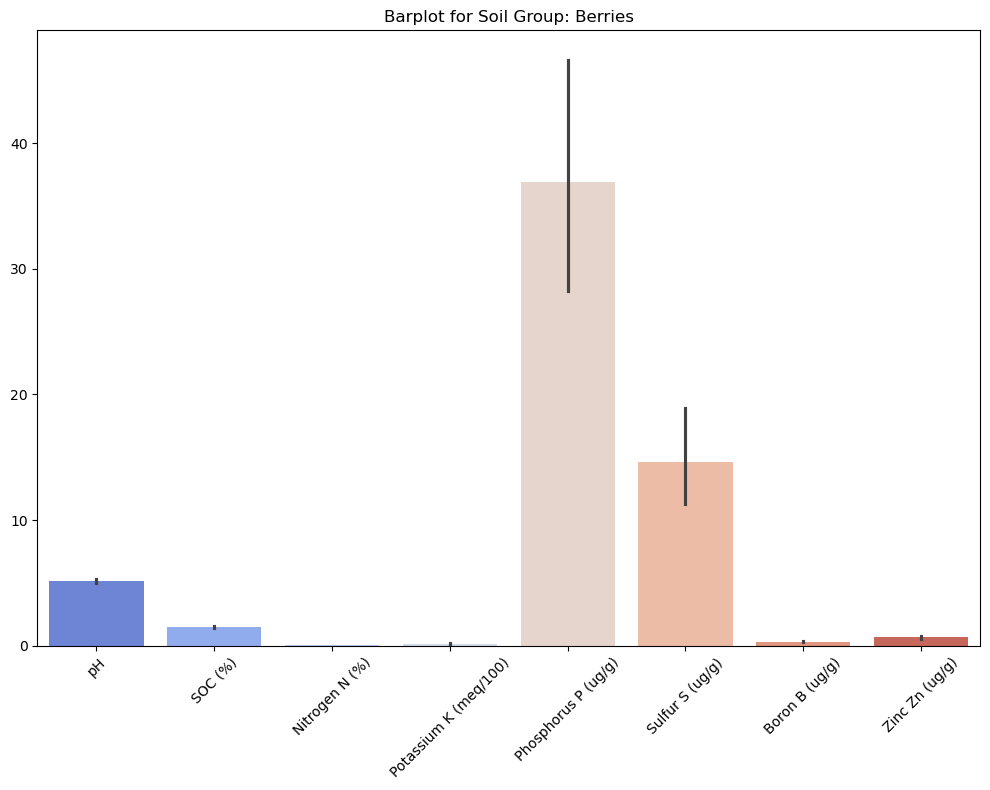

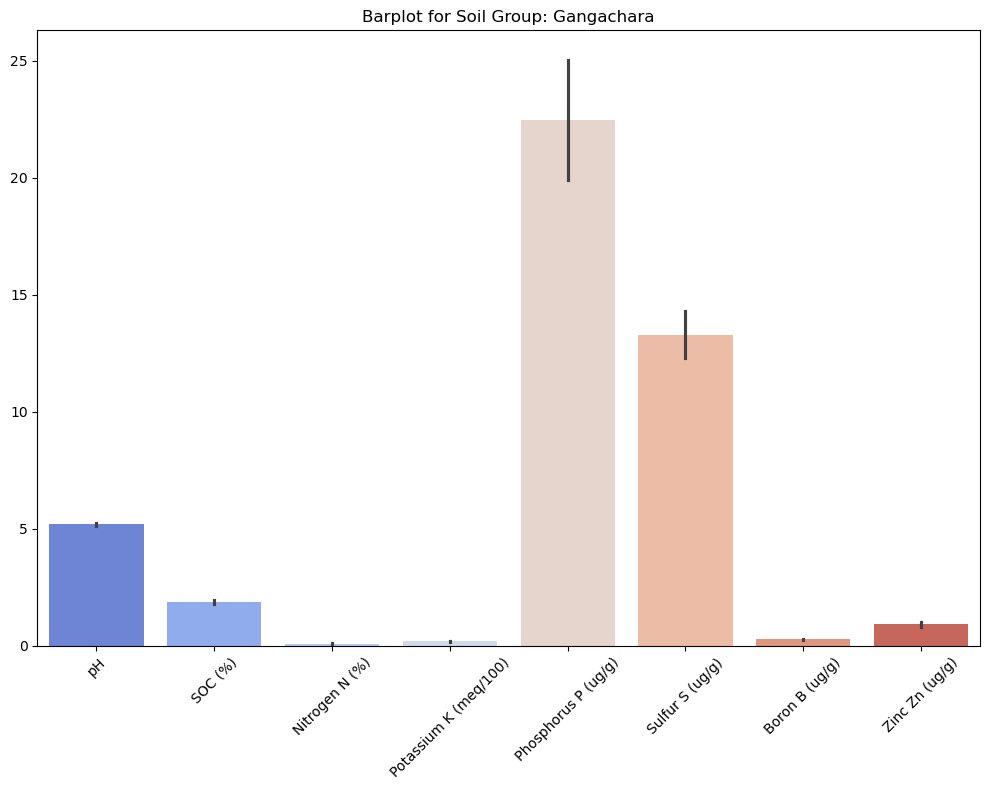

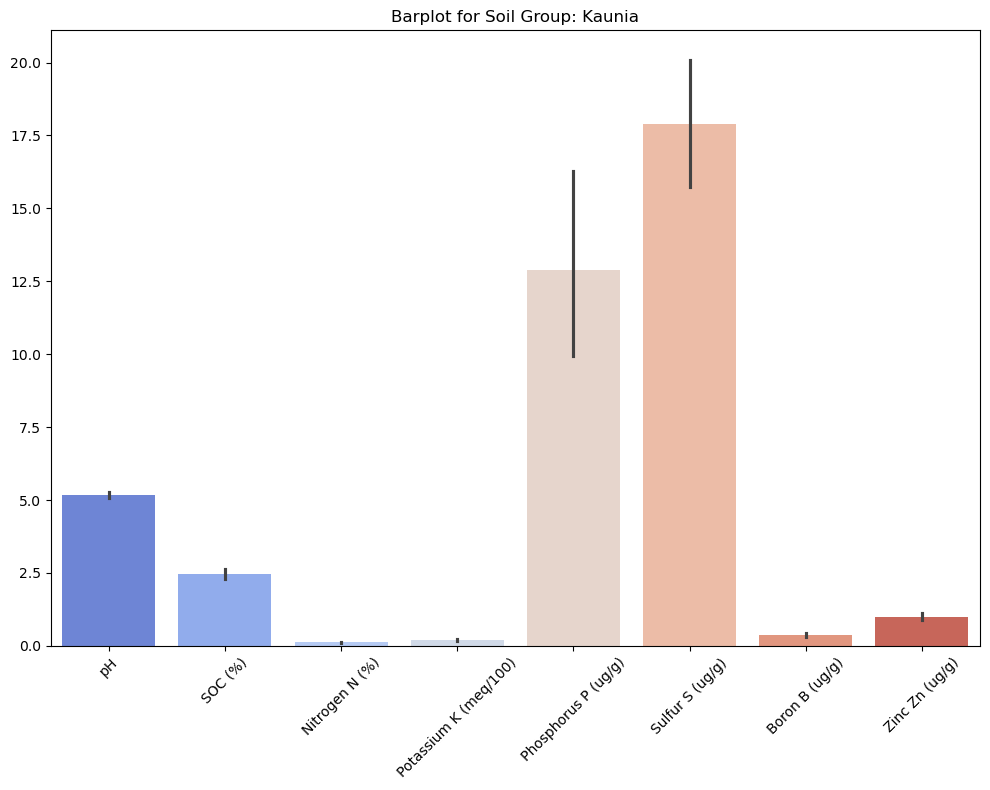

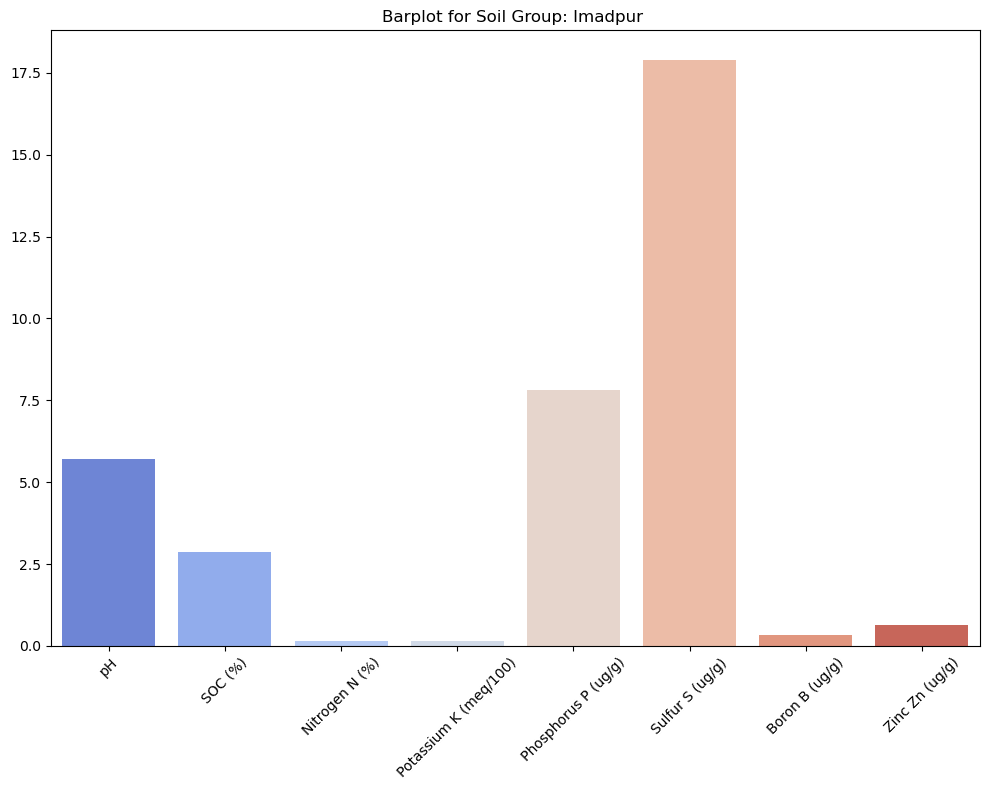

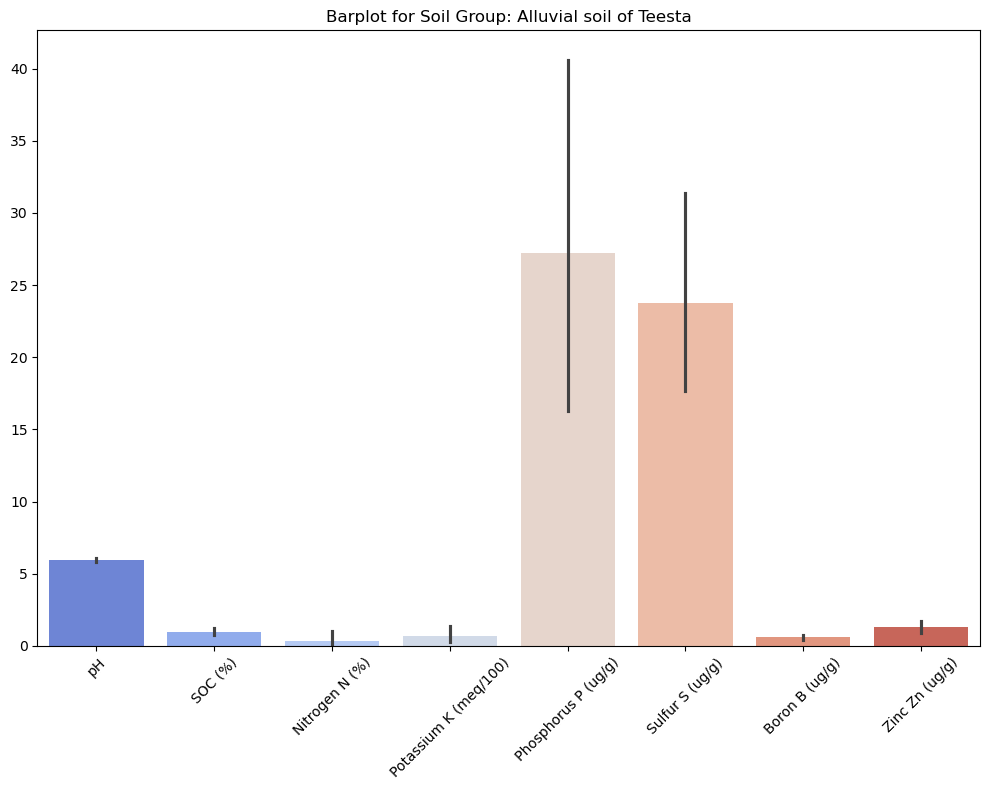

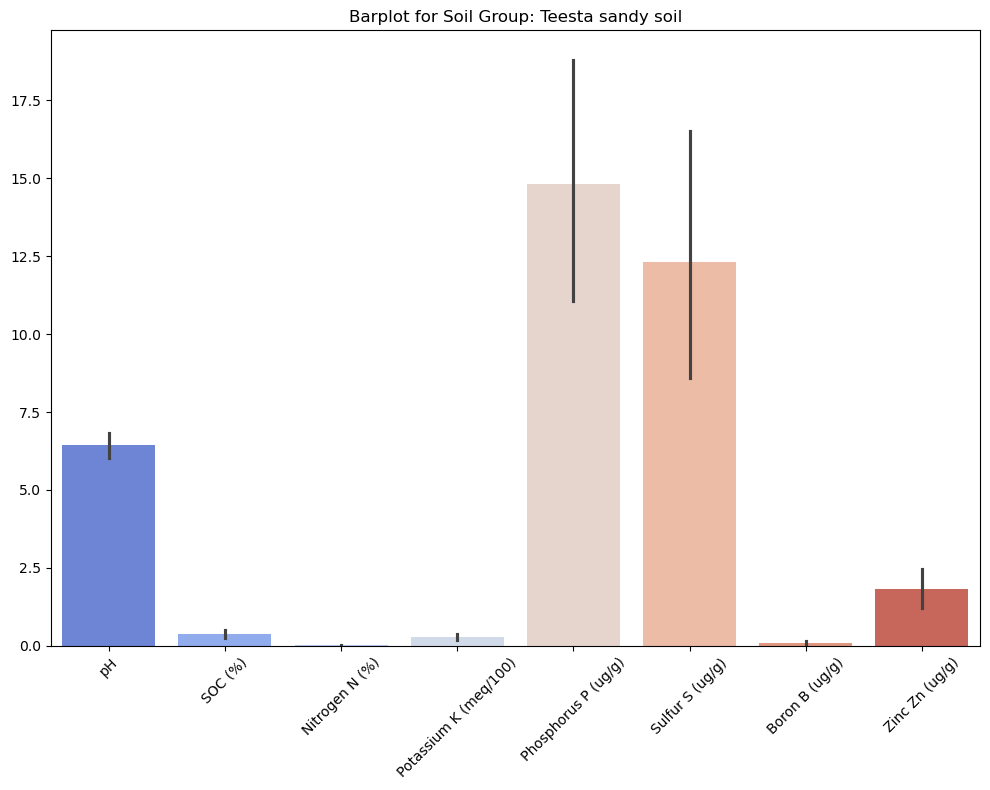

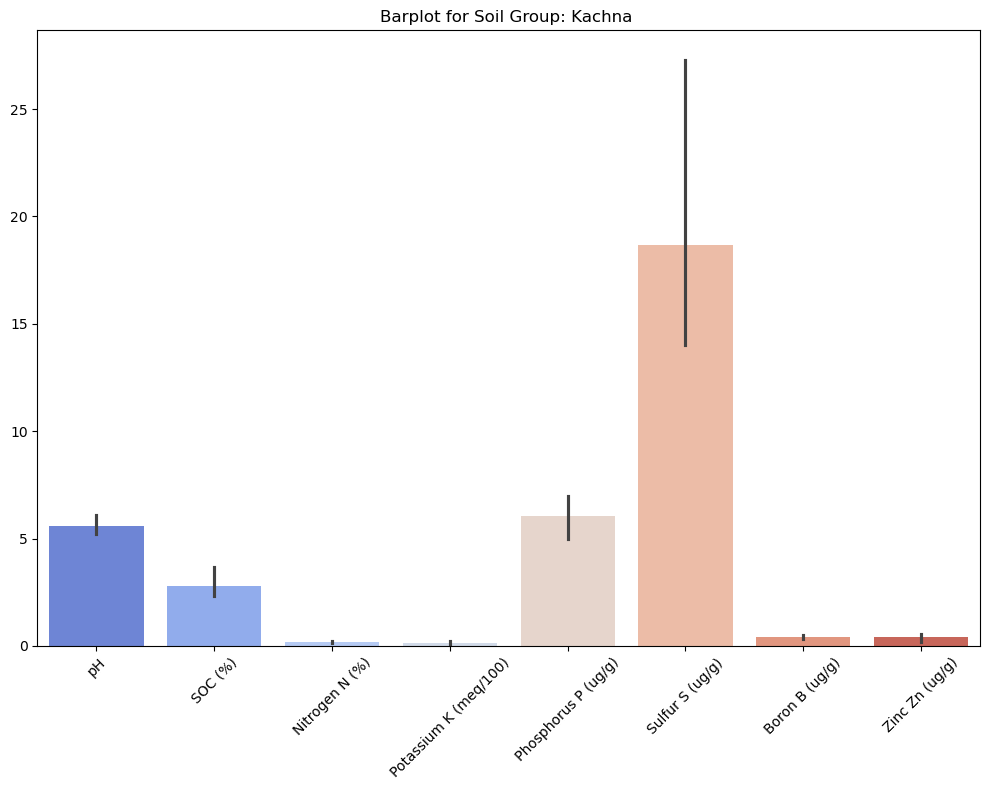

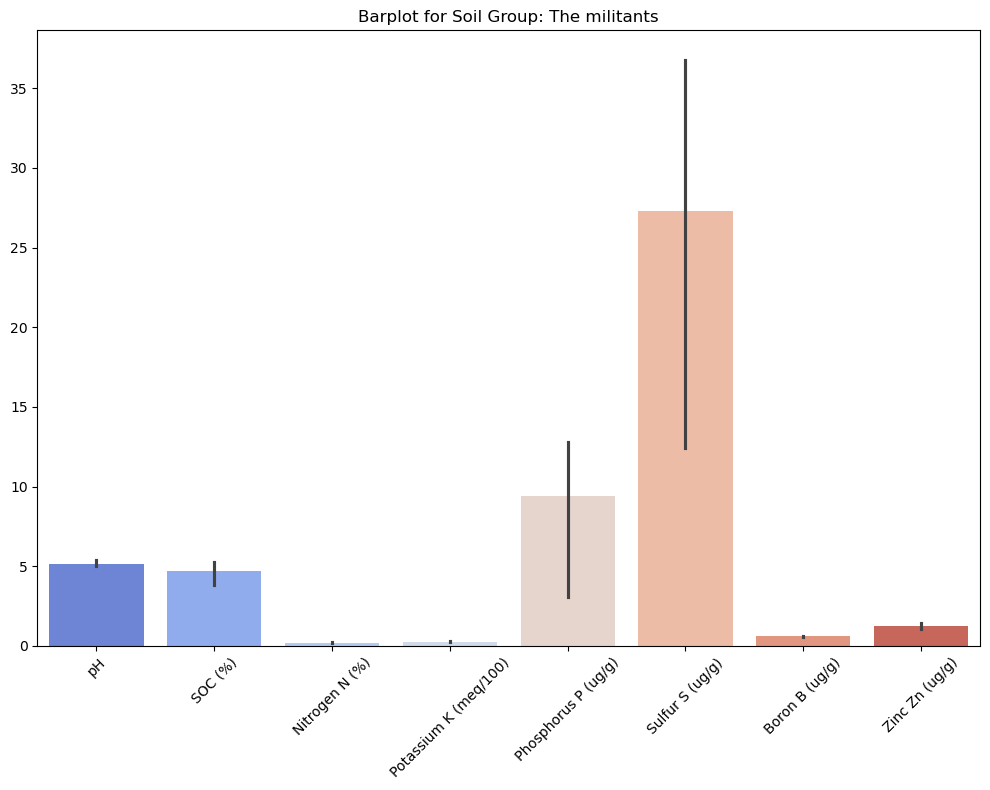

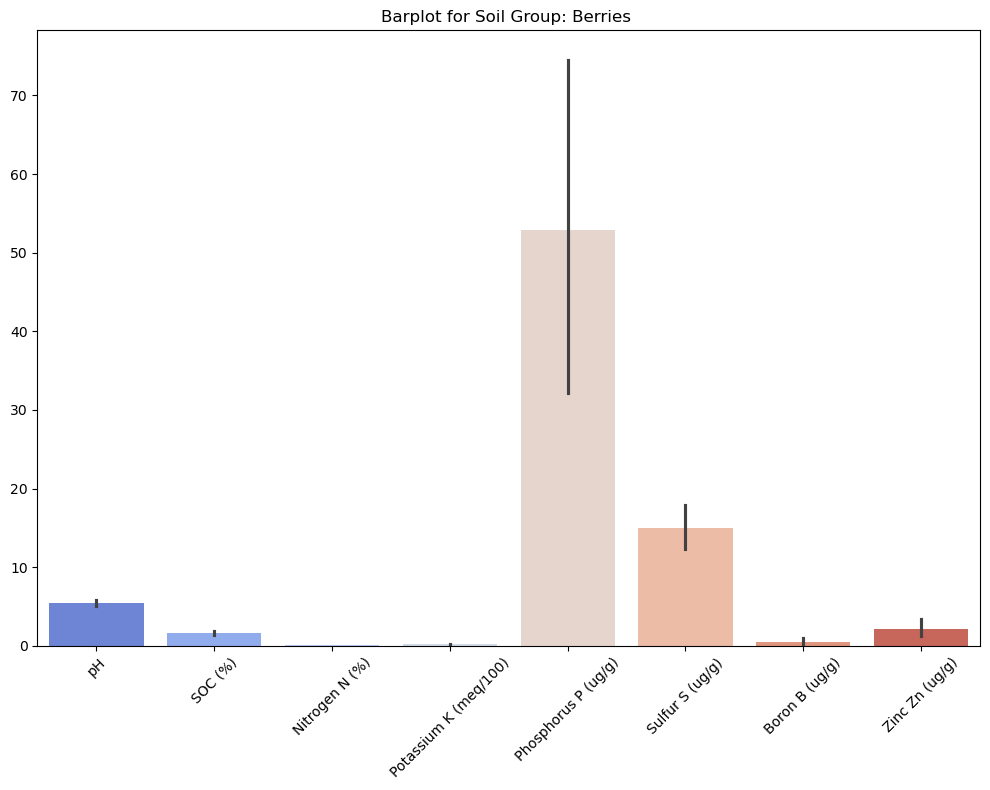

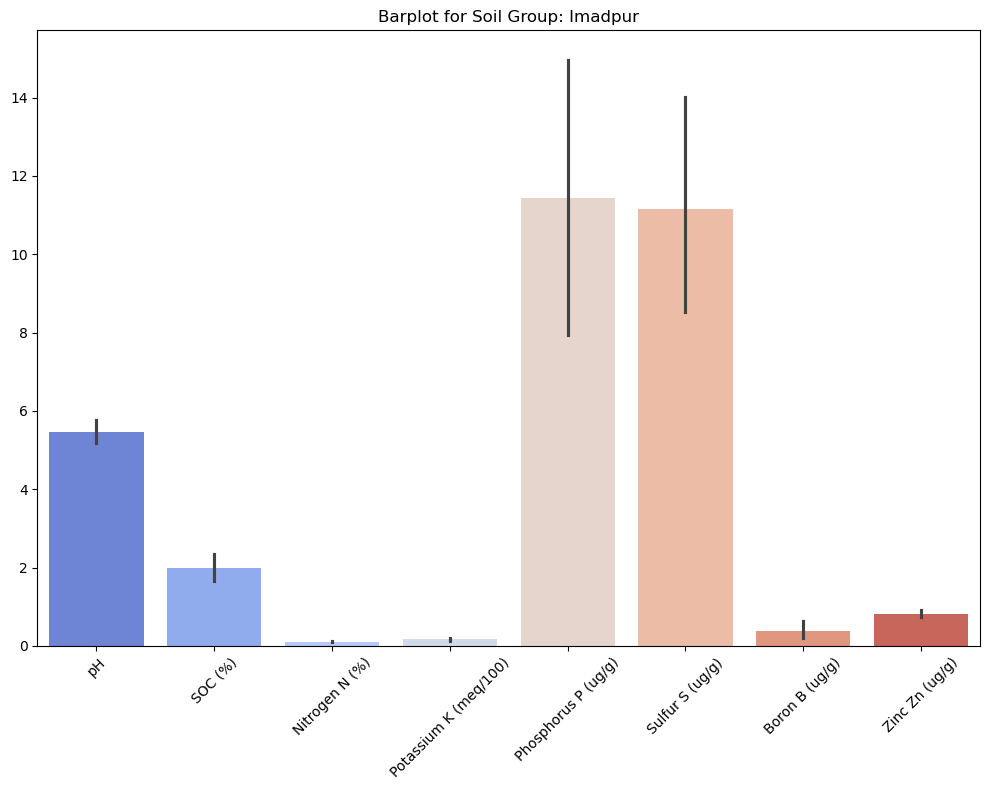

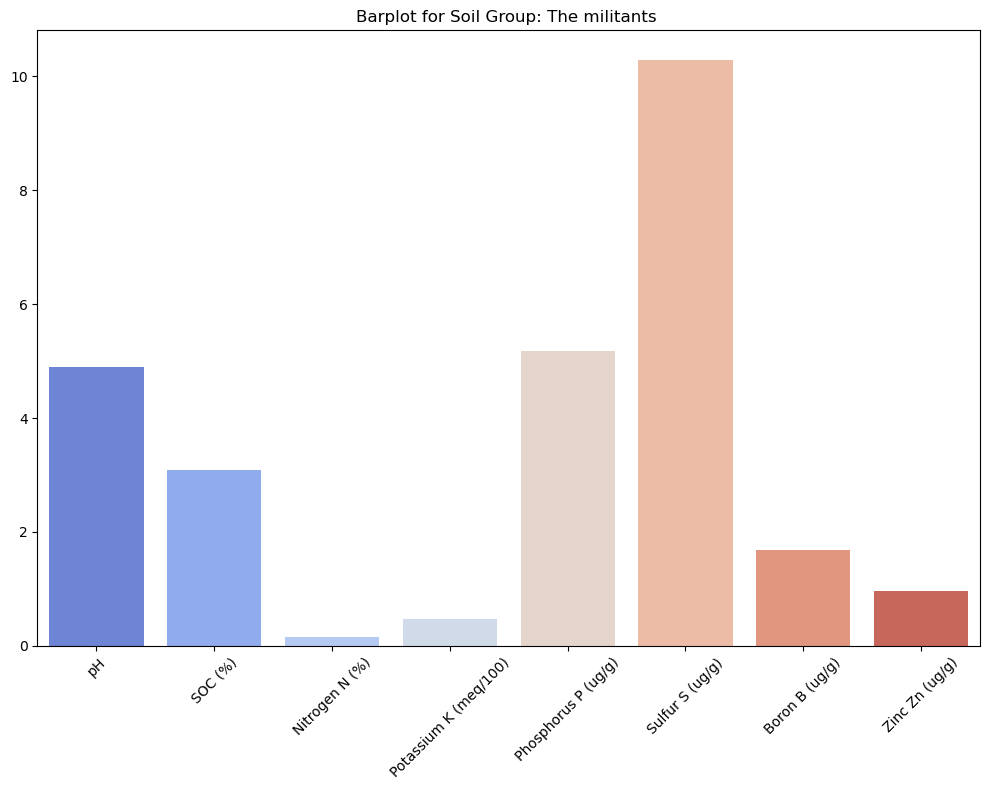

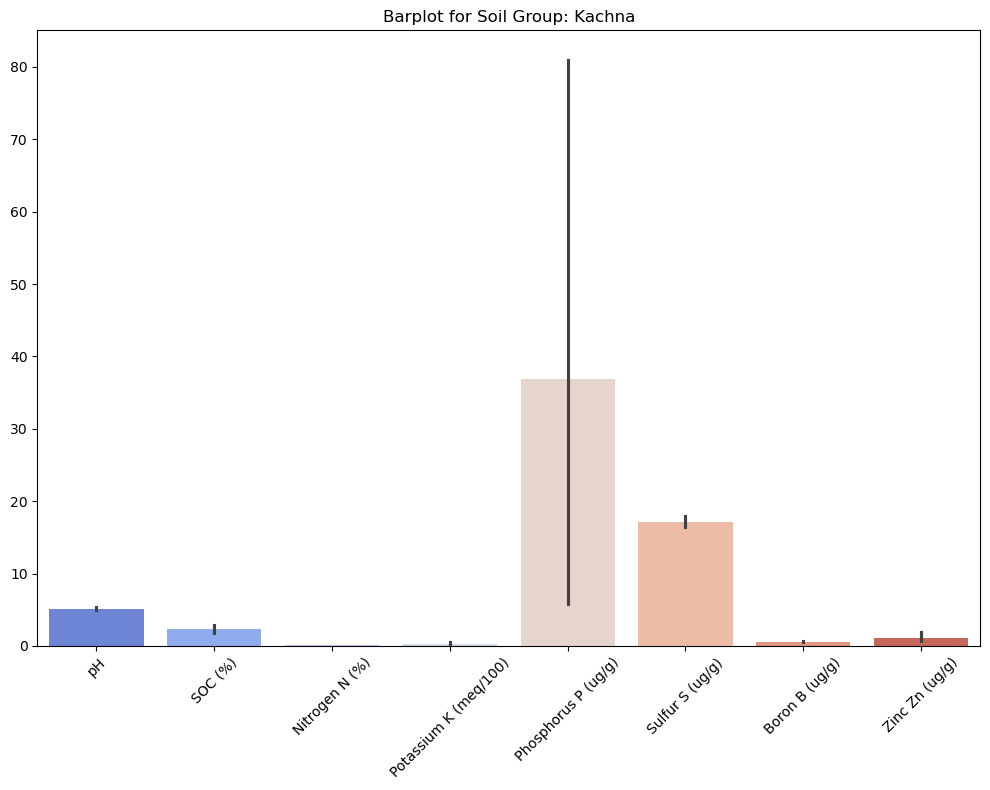

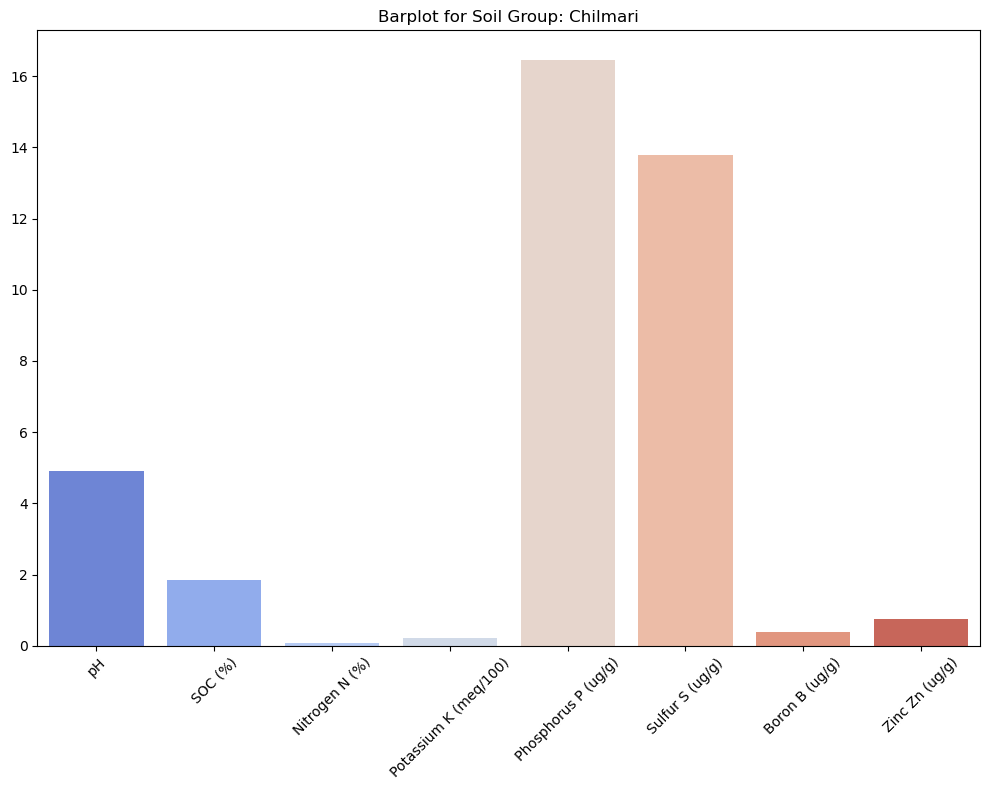

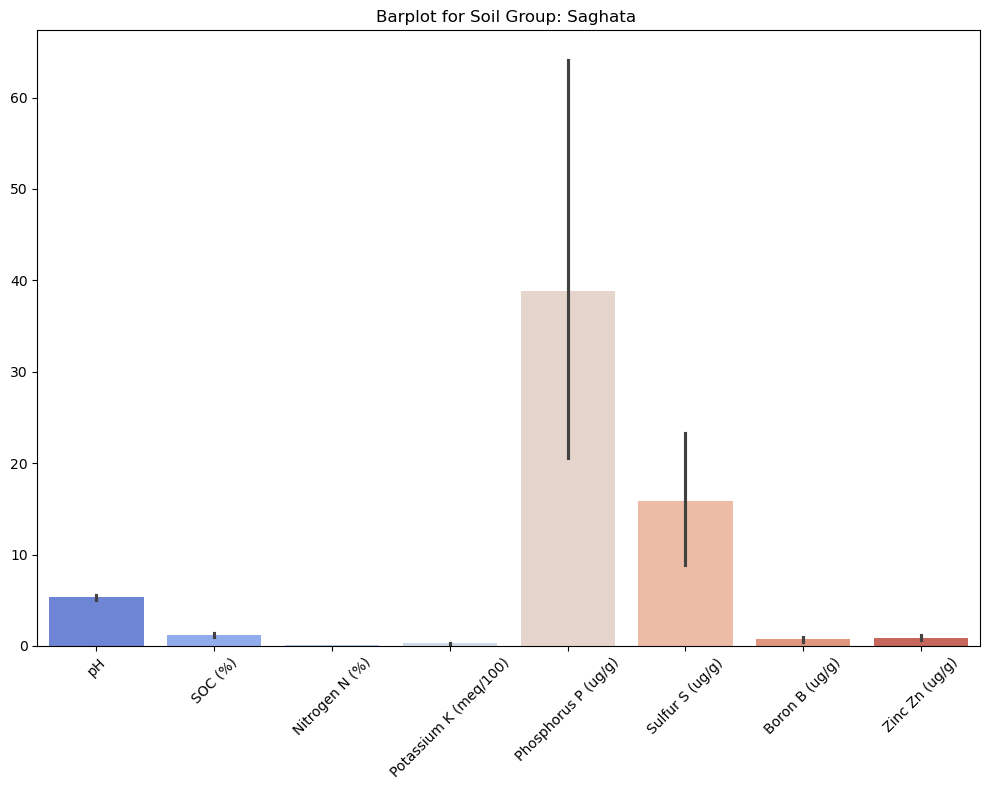

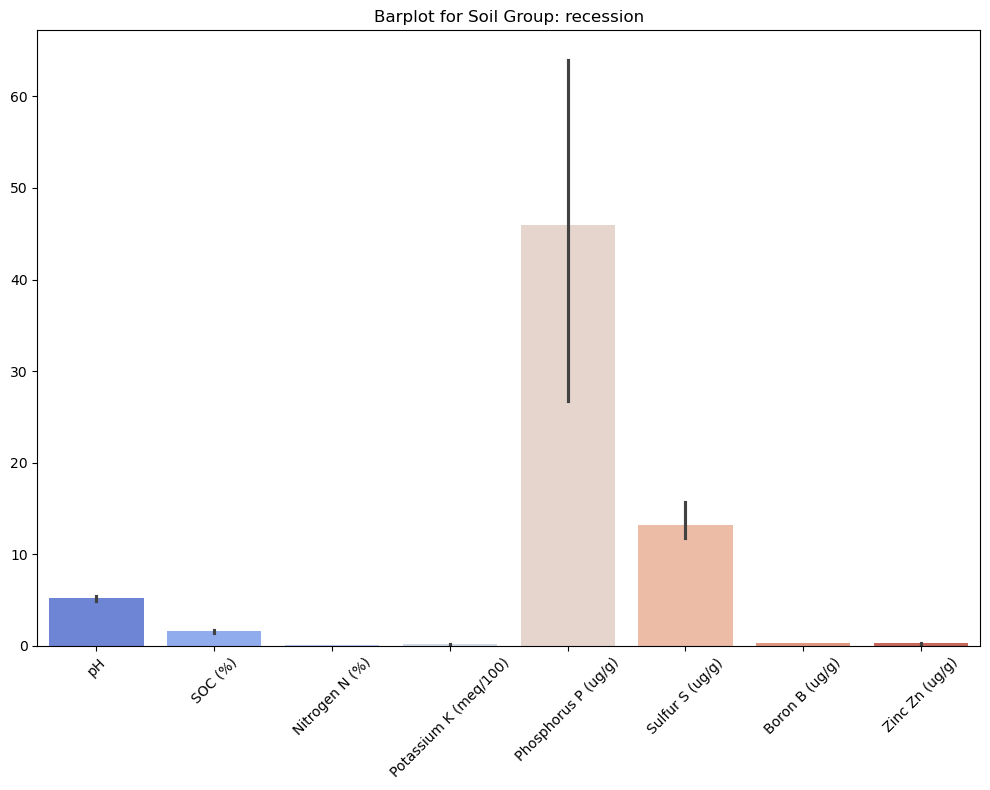

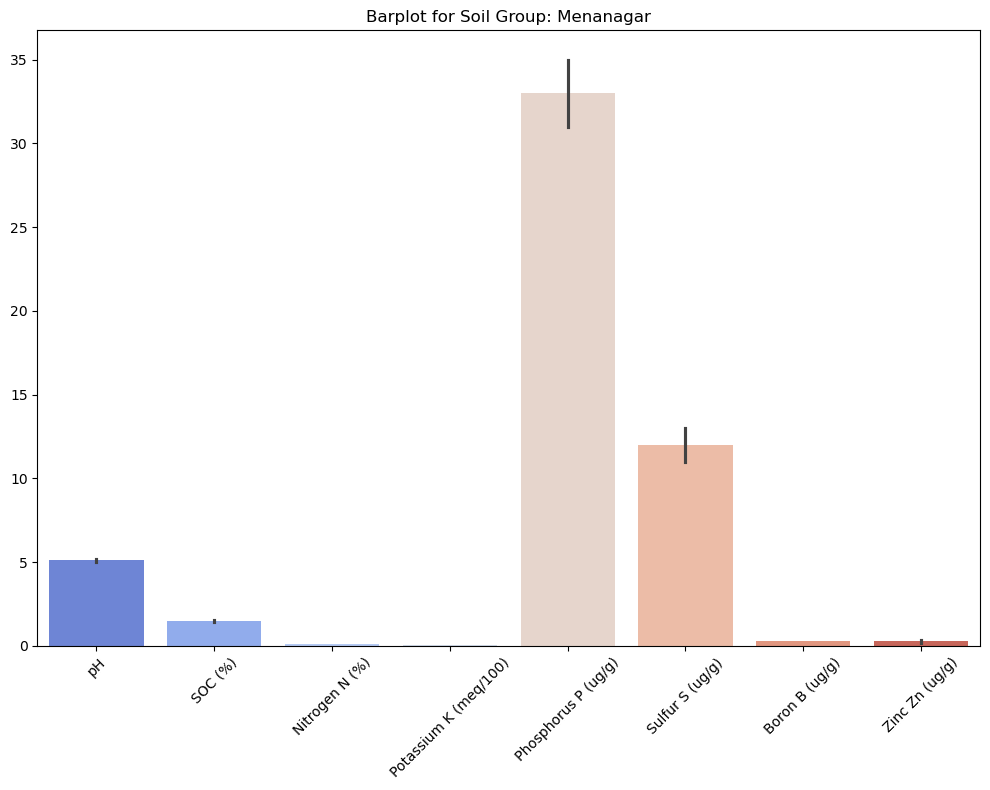

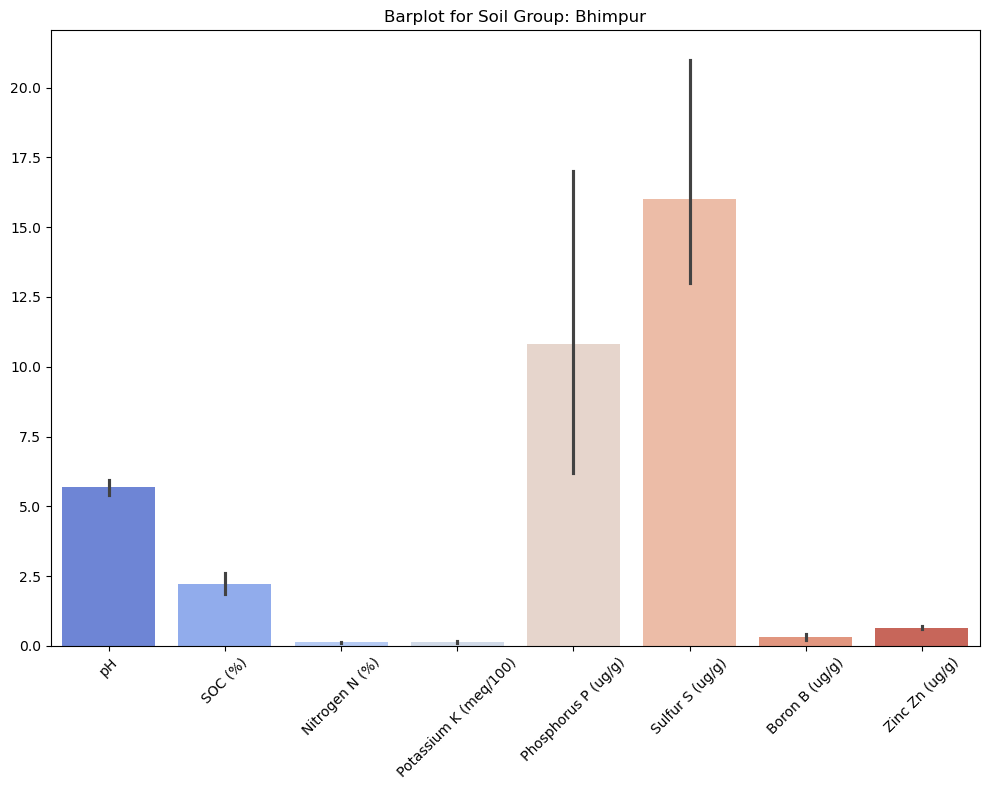

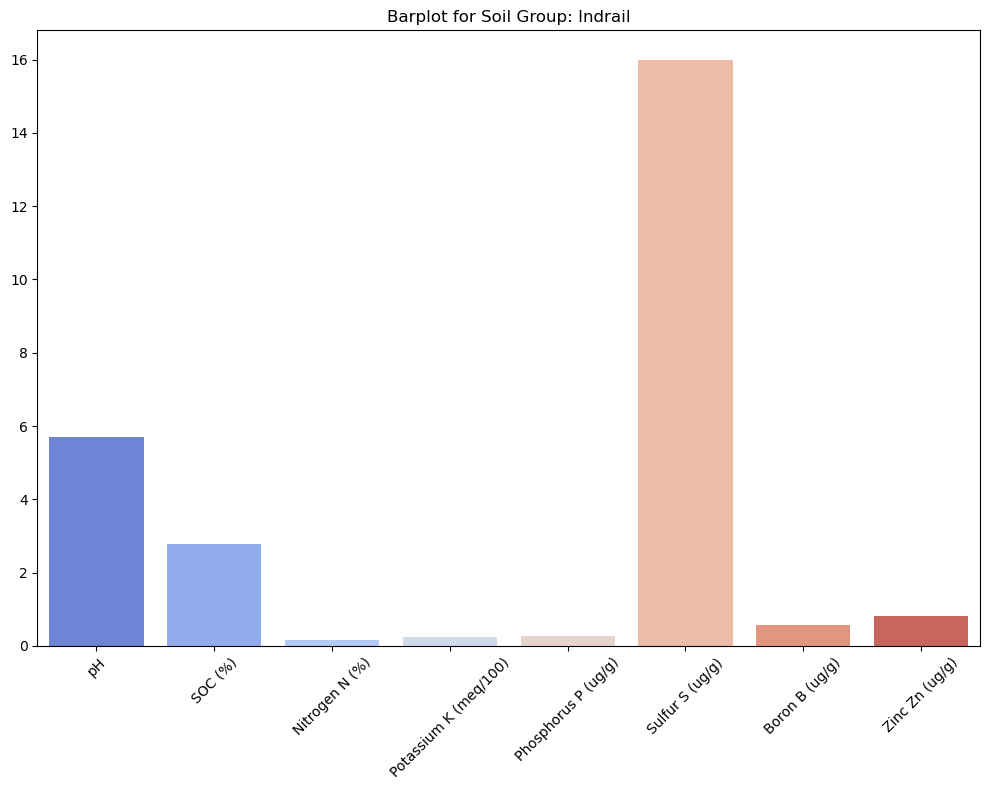

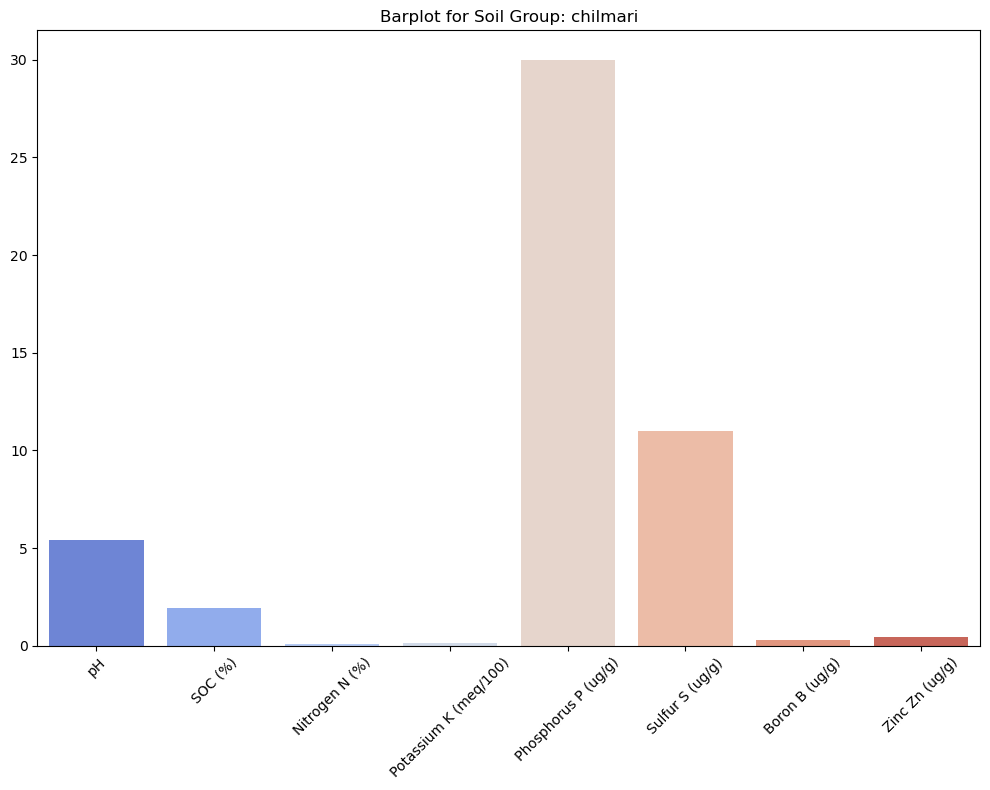

In [84]:
for soil in soil_groups:
    soil_data = df[df['soil group'] == soil]
    plt.figure(figsize=(10, 8))
    sns.barplot(data=soil_data[numerical_features], palette='coolwarm')
    plt.title(f'Barplot for Soil Group: {soil}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()